# **Implementation of Machine Learning in Credit Risk Analysis: Predicting Potential Customer Defaults**

**by: Novan Rizki Wicaksono**

# **Business Understanding**

### **🎯 Background of the Problem**
1. **Credit risk** is a **crucial element** that needs to be understood by financial institutions and loan service providers. To optimize the management of this risk, finance companies continue to strive to **improve creditworthiness assessment methods**. Approving loans to borrowers with a high risk of default can have a negative impact on the company's financial performance, and errors in transmitting credit risk have the potential to have serious consequences.

2. In the world of finance, a suboptimal credit granting process and inappropriate credit risk management can result in major losses. By applying **machine learning algorithms** to analyze large amounts of historical data, financial institutions can **uncover patterns and trends** that are difficult for human analysts to detect. This allows for **more accurate** credit decision making and **more efficient risk management**, thereby **minimizing potential losses** due to inappropriate credit granting.

3. Therefore, the development of a machine learning model that is able to predict potential defaults based on factors such as the customer's economic and financial conditions is very important to **avoid losses due to bad debts**.
<br>


### **🧠 Business Problem**
1. How to **identify the risk of customer** default through historical data analysis to **improve the accuracy of credit** assessment by companies, so that companies can make more informed lending decisions?

2. **11% of 460k** customers still in default

<br>

### **🎯 Project Objective**
Design a **predictive model using machine learning** that can categorize borrowers into two main categories, namely:

    ✅ GOOD → Low risk

    ❌ BAD → High risk

<br>

### **📌 Business Benefits**

1.   📉 Mitigate bad credit risk
2.   ⏱️ Streamlining credit approval process
3.   🧮 Data analysis-based credit policy formulation
4.   ✨ Minimize potential losses due to bad debts
5.   🔍 Optimize creditworthiness screening process
6.   📈 Support the preparation of more precise credit granting regulations

<br>

### **🏦 Data Context**
This project was developed to **build a predictive system to assess credit risk **by utilizing **Lending Club's historical database**. The main objective of this project is to **create a predictive solution** to **improve the accuracy of credit assessment**, especially in detecting potential default risk customers from the early stages of the process.

The **dataset** used covers the **period 2007-2014** and contains information such as:
*   📊 Loan Amount
*   📈 Interest Rate
*   💵 Annual Income
*   ✅❌ Payment Status

<br>

### **❓ Problem Statement**
How to **build a prediction model** that can **classify loan risk based on historical data**, so that companies can **reduce the potential for non-performing loans**?

# **Data Understanding**


## **Data Collection**

### **Import Library**

In [ ]:
# Data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
import numpy as np
import datetime
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica']

# Normality test
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import normaltest
import scipy.stats as st

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Machine Learning
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import scipy
from scipy import stats
from scipy.stats import skew
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Feature Encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#CrossValidate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

#Hypertuning Parameter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Evaluation Metrics
from sklearn.metrics import accuracy_score, auc, roc_auc_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

### **Load Dataset**

In [ ]:
from matplotlib import rcParams

# Configure default font settings
rcParams['font.family'] = 'sans-serif'  # Set default font family

# Set default figure dimensions (width, height in inches)
rcParams['figure.figsize'] = (12, 8)

# Customize plot line appearance
rcParams['lines.linewidth'] = 3  # Default line thickness

# Configure title and label sizes
rcParams['axes.titlesize'] = 'x-large'  # Axis title size
rcParams['xtick.labelsize'] = 'medium'  # X-axis tick label size
rcParams['ytick.labelsize'] = 'medium'  # Y-axis tick label size

# Set axes background color (white)
rcParams['axes.facecolor'] = '1'  # Using numeric code for white

In [ ]:
df_idx = pd.read_csv("loan_data_2007_2014.csv")
df_idx

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
0                4975.0   36 months     10.65       162.87     B        B2   
1                2500.0   60 months     15.27        59.83     C        C4   
2                2400.0   36 months     15.96        84.33     C        C5   
3               10000.0   36 months     13.49       339.31     C        C1   
4                3000.0   60 months     12.69        67.79     B        B5   
...                 ...         ...       ...          ...   ...       ...   
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
0                                         NaN  10+ years           RENT   
1                                       Ryder   < 1 year           RENT   
2                                         NaN  10+ years           RENT   
3                         AIR RESOURCES BOARD  10+ years           RENT   
4                    University Medical Group     1 year           RENT   
...                                       ...        ...            ...   
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
0          24000.0            Verified  Dec-11   Fully Paid          n   
1          30000.0     Source Verified  Dec-11  Charged Off          n   
2          12252.0        Not Verified  Dec-11   Fully Paid          n   
3          49200.0     Source Verified  Dec-11   Fully Paid          n   
4          80000.0     Source Verified  Dec-11      Current          n   
...            ...                 ...     ...          ...        ...   
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
0       https://www.lendingclub.com/browse/loanDetail....   
1       https://www.lendingclub.com/browse/loanDetail....   
2       https://www.lendingclub.com/browse/loanDetail....   
3       https://www.lendingclub.com/browse/loanDetail....   
4       https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
466280  https://www.lendingclub.com/browse/loanDetail....   


In [ ]:
df_idx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
# Descriptive Statistic

df_idx.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti    delinq_2yrs  inq_last_6mths  \
count  4.662810e+05  466285.000000  466256.000000   466256.000000   
mean   7.327738e+04      17.218758       0.284678        0.804745   
std    5.496357e+04       7.851121       0.797365        1.091598   
min    1.896000e+03       0.000000       0.000000        0.000000   
25%    4.500000e+04      11.360000       0.000000        0.000000   
50%    6.300000e+04      16.870000       0.000000        0.000000   
75%    8.896000e+04      22.780000       0.000000        1.000000   
max    7.500000e+06      39.990000      29.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record       open_acc  \
count           215934.000000            62638.000000  466256.000000   
mean                34.104430               74.306012      11.187069   
std                 21.778487               30.357653       4.987526   
min                  0.000000                0.000000       0.000000   
25%                 16.000000               53.000000       8.000000   
50%                 31.000000               76.000000      10.000000   
75%                 49.000000              102.000000      14.000000   
max                188.000000              129.000000      84.000000   

             pub_rec     revol_bal     revol_util      total_acc  \
count  466256.000000  4.662850e+05  465945.000000  466256.000000   
mean        0.160564  1.623020e+04      56.176947      25.064430   
std         0.510863  2.067625e+04      23.732628      11.600141   
min         0.000000  0.000000e+00       0.000000       1.000000   
25%         0.000000  6.413000e+03      39.200000      17.000000   
50%         0.000000  1.176400e+04      57.600000      23.000000   
75%         0.000000  2.033300e+04      74.700000      32.000000   
max        63.000000  2.568995e+06     892.300000     156.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count  466285.000000  466285.000000  466285.000000    466285.000000   
mean     4410.062342    4408.452258   11540.686220     11469.892747   
std      6355.078769    6353.198001    8265.627112      8254.157579   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000    5552.125349      5499.250000   
50%       441.470000     441.380000    9419.250943      9355.430000   
75%      7341.650000    7338.390000   15308.158460     15231.310000   
max     32160.380000   32160.380000   57777.579870     57777.580000   

       total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  \
count    466285.000000  466285.000000       466285.000000  466285.000000   
mean       8866.014657    2588.677225            0.650129      85.344211   
std        703

In [ ]:
# Drop Unnamed: 0 column

if 'Unnamed: 0' in df_idx.columns:
    df_idx.drop('Unnamed: 0', axis=1, inplace=True)

### **Duplicate Data Check**

In [ ]:
print("Data dimension: {} rows and {} column".format(*df_idx.shape))
print("Unique value of id column: {}".format(df_idx.id.nunique()))
print("Unique value of member_id column: {}".format(df_idx.member_id.nunique()))

Data dimension: 466285 rows and 74 column
Unique value of id column: 466285
Unique value of member_id column: 466285


In [ ]:
print('There are', df_idx.duplicated().sum(), 'duplicated value')

There are 0 duplicated value


After checking, it turns out that there is no duplicate data. This means that each row in the dataset represents one individual entity.

### **Drop Null Column**

In [ ]:
# Identify and sort columns based on the number of empty data
df_idx.isnull().sum().sort_values(ascending=False)

open_rv_24m                    466285
inq_fi                         466285
open_rv_12m                    466285
il_util                        466285
mths_since_rcnt_il             466285
total_bal_il                   466285
open_il_24m                    466285
open_il_12m                    466285
open_il_6m                     466285
open_acc_6m                    466285
dti_joint                      466285
annual_inc_joint               466285
max_bal_bc                     466285
all_util                       466285
inq_last_12m                   466285
total_cu_tl                    466285
verification_status_joint      466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340304
mths_since_last_delinq         250351
next_pymnt_d                   227214
total_rev_hi_lim                70276
tot_cur_bal                     70276
tot_coll_amt                    70276
emp_title                       27588
emp_length                      21008
last_pymnt_d                      376
revol_util                        340
collections_12_mths_ex_med        145
last_credit_pull_d                 42
acc_now_delinq                     29
delinq_2yrs                        29
inq_last_6mths                     29
earliest_cr_line                   29
open_acc                           29
pub_rec                            29
total_acc                          29
title                              21
annual_inc                          4
member_id                           0
id                                  0
sub_grade                           0
grade                               0
installment                         0
int_rate                            0
term                                0
funded_amnt_inv                     0
funded_amnt                         0
loan_amnt                           0
total_rec_int                       0
total_rec_prncp                     0
issue_d                             0
url                                 0
purpose                             0
zip_code                            0
addr_state                          0
dti                                 0
home_ownership                      0
verification_status                 0
total_pymnt_inv                     0
total_pymnt                         0
out_prncp_inv                       0
out_prncp                           0
initial_list_status                 0
revol_bal                           0
pymnt_plan                          0
loan_status                         0
policy_code                         0
application_type                    0
collection_recovery_fee             0
recoveries                          0
total_rec_late_fee                  0
last_pymnt_amnt                     0
dtype: int64

In [ ]:
columns_to_drop = [
    # unique values
    'id','member_id',

    # all null values
    'inq_last_12m', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
    'mths_since_rcnt_il', 'dti_joint', 'total_bal_il', 'annual_inc_joint', 'il_util', 'open_rv_12m', 'open_rv_24m',
    'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',

    # free text
    'url', 'desc',

    # censored personal value (e.g. 330xxx)
    'zip_code',

    # detailed variables (already represented by the `grade` column)
    'sub_grade',

    # constant values
    'policy_code']

In [ ]:
# Find the column that has all null/NA values

fully_null = []
for column in df_idx.columns:
    if df_idx[column].isnull().all():
        fully_null.append(column)

print("Column without data:", fully_null)
print(f"Find {len(fully_null)} Column without data/values")

Column without data: ['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
Find 17 Column without data/values


In [ ]:
df = df_idx.drop(columns_to_drop, axis=1)
df_idx.shape

(466285, 74)

In [ ]:
df_idx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

# **Data Preparation**



### **Labeling**

Credit risk refers to the potential failure of a customer to fulfill loan repayment obligations as agreed with the lender. Credit risk modeling projects aim to predict the probability of a borrower repaying their loan obligations. Therefore, the target variables chosen must accurately represent the repayment capacity of the potential borrower. As a form of risk management, lenders conduct creditworthiness analysis, historical checks of previous payments, credit score evaluation, and assessment of the borrower's financial capability.
<br>

The `loan_status` feature in the dataset is considered ideal as a target variable because it reflects the borrower's actual payment history, shows historical payment performance, and provides an indication of the ability to fulfill credit obligations. In the context of this analysis, `loan_status` is an appropriate target parameter because this variable:
1.   Records the repayment status of each individual
2.   Reflects the consistency of loan repayments
3.   Is a direct indicator of the borrower's credit behavior






In [ ]:
# Analyze loan status distribution
print("Loan Status Distribution:")
print(df['loan_status'].value_counts())

Loan Status Distribution:
loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


*   Current: Customer consistently pays installments before/after due date
*   Fully Paid: Principal and interest have been fully repaid
*   Charged Off: Non-performing loans that have been written off after collection efforts
*   Late: Payment exceeds the grace period (usually >30 days late)
*   In Grace Period: A tolerance period of 1-15 days after maturity without penalty.
*   Default: Default after a certain period (usually >90-120 days)

<br>

Based on this definition, **good loan** and **bad loan** customers can be defined. A loan is categorized as a **good loan** if all payment obligations are fulfilled on time according to the agreement, while a **bad loan** refers to a loan that has significant payment delays or even defaults.


In [ ]:
#  List of loan statuses that are considered good (not in default)
good_loan_status = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'In Grace Period', 'Late (16-30 days)']

# Create a default probability column: 0 = no default, 1 = default
df['proba_of_default'] = np.where(df['loan_status'].isin(good_loan_status), 0, 1)

In [ ]:
# After creating the proba_of_default column, analyze its distribution
percentage_default = df['proba_of_default'].value_counts(normalize=True).mul(100).round(4)
print(f"\nPortfolio Composition:\n{percentage_default}%")


Portfolio Composition:
proba_of_default
0    89.0693
1    10.9307
Name: proportion, dtype: float64%


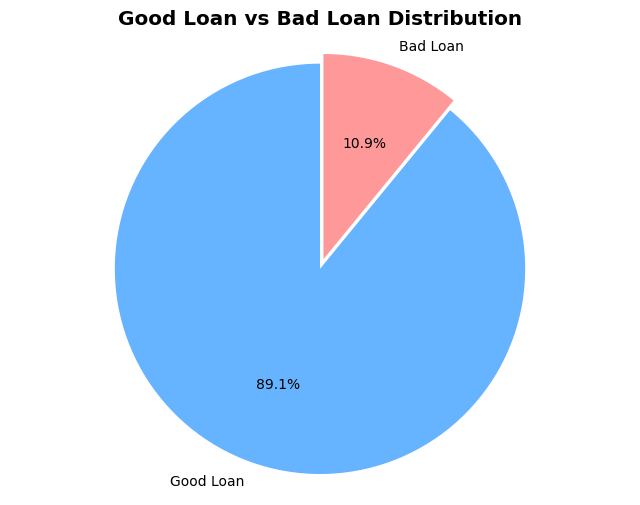

In [ ]:
loan_dist = df['proba_of_default'].value_counts(normalize=True) * 100
labels = ['Good Loan', 'Bad Loan']
colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(8,6))
plt.pie(loan_dist, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, explode=(0.05, 0))
plt.title('Good Loan vs Bad Loan Distribution', fontweight='bold')
plt.axis('equal')
plt.show()

**Good Loan (0):**
*   Has been repaid according to the provisions
*   Does not violate credit policy
*   Status: Paid off

**Bad Loan (1) :**
*   Charged-off
*   Does not meet credit requirements
*   Status: Collected, Defaulted, or Delinquent (31-120 days)

**Key distinction:**
<br>
Current loans indicate timely payments and fulfillment of obligations, while non-performing loans include defaults, collections, or significant delays.

In [ ]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

# **Data Preprocessing**

### **Feature Engineering**



`Term`
<br>
*   Term credit is commonly used in the context of long-term credit, such as mortgages or car loans, where the loan amount is relatively large and the repayment term is several years.
*   This feature represents the number of months that the debtor/borrower has to keep making payments.
*   The value of this feature will be converted to an integer, for example, 36 months -> 36.

In [ ]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
# Safely convert term to integer after cleaning string
df['term_int'] = (df['term'].str.extract('(\d+)')[0]  # Extract digits
                  .astype(int))  # Convert to integer

In [ ]:
df[['term', 'term_int']].sample(3, random_state=42)

term  term_int
362514   60 months        60
288564   60 months        60
213591   36 months        36

`emp_length`

The employment length feature **represents the duration of the borrower's work** experience in years. In credit analysis, longer tenure is generally correlated with better job stability and a reduced level of credit risk. The value in this feature will be converted to numeric form, for example “15+ years” will be transformed into 15.




In [ ]:
df['emp_length'].unique()


array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
df['emp_length_int'] = (df['emp_length']
                       .str.replace('\+ years', '')
                       .str.replace('< 1 year', '0')
                       .str.replace(' years', '')
                       .str.replace(' year', ''))

In [ ]:
# Convert to float after string cleaning
df['emp_length_int'] = pd.to_numeric(df['emp_length_int'], errors='coerce').astype(float)

In [ ]:
df[['emp_length','emp_length_int']].sample(3)

emp_length  emp_length_int
192148    8 years             8.0
319808    5 years             5.0
212698    7 years             7.0

**Snapshot Date**

Before making modifications to features that contain dates, it is important to set a *snapshot date* or reference date first. A *snapshot date* refers to a specific date when data was captured or “recorded”, which serves as a benchmark in analysis. All data recorded on or before this date is considered current.  

This dataset includes data from 2007 to 2014. If the current year is used as the *snapshot date*, the analysis results may be less relevant. In addition, the column `last_pymnt_d` indicates the last payment in early January 2016.  

In order for all data to be treated consistently, the *snapshot date* is set at the end of 2016, i.e. **2016-12-01**. Thus, all calculations and analysis will refer to that date.

In [ ]:
snapshot_date = pd.to_datetime('2016-12-01')
snapshot_date

Timestamp('2016-12-01 00:00:00')

`issue_d`

This feature provides loan-related temporal data that is useful for analyzing lending patterns chronologically. This variable serves as the basis for calculating loan tenor and categorizing financing products. For analytical purposes, the feature will be converted to monthly duration relative to the reference date (snapshot date).


In [ ]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [ ]:
df['date_issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['date_issue_d'].unique()

<DatetimeArray>
['2011-12-01 00:00:00', '2011-11-01 00:00:00', '2011-10-01 00:00:00',
 '2011-09-01 00:00:00', '2011-08-01 00:00:00', '2011-07-01 00:00:00',
 '2011-06-01 00:00:00', '2011-05-01 00:00:00', '2011-04-01 00:00:00',
 '2011-03-01 00:00:00', '2011-02-01 00:00:00', '2011-01-01 00:00:00',
 '2010-12-01 00:00:00', '2010-11-01 00:00:00', '2010-10-01 00:00:00',
 '2010-09-01 00:00:00', '2010-08-01 00:00:00', '2010-07-01 00:00:00',
 '2010-06-01 00:00:00', '2010-05-01 00:00:00', '2010-04-01 00:00:00',
 '2010-03-01 00:00:00', '2010-02-01 00:00:00', '2010-01-01 00:00:00',
 '2009-12-01 00:00:00', '2009-11-01 00:00:00', '2009-10-01 00:00:00',
 '2009-09-01 00:00:00', '2009-08-01 00:00:00', '2009-07-01 00:00:00',
 '2009-06-01 00:00:00', '2009-05-01 00:00:00', '2009-04-01 00:00:00',
 '2009-03-01 00:00:00', '2009-02-01 00:00:00', '2009-01-01 00:00:00',
 '2008-12-01 00:00:00', '2008-11-01 00:00:00', '2008-10-01 00:00:00',
 '2008-09-01 00:00:00', '2008-08-01 00:00:00', '2008-07-01 00:00:00',
 '20

In [ ]:
df['months_since_issue_d'] = (
    (snapshot_date - df['date_issue_d']).dt.days // 30  # Pembagian integer
).astype(int)

In [ ]:
(
    df[['issue_d', 'date_issue_d', 'months_since_issue_d']]
    .pipe(lambda x: print(f"Snapshot Date: {snapshot_date}") or x)
    .sample(3)
    .pipe(display)
)

Snapshot Date: 2016-12-01 00:00:00


issue_d date_issue_d  months_since_issue_d
244352  Nov-14   2014-11-01                    25
439304  Feb-14   2014-02-01                    34
455203  Jan-14   2014-01-01                    35

In [ ]:
df['months_since_issue_d'].describe()

count    466285.000000
mean         39.323637
std          14.526779
min          24.000000
25%          29.000000
50%          35.000000
75%          45.000000
max         115.000000
Name: months_since_issue_d, dtype: float64

In [ ]:
df.drop('emp_length', axis=1, inplace=True)

`earliest_cr_line`

This feature quantifies the duration of a borrower's experience in managing financial obligations. Specifically, this variable is used to measure the **credit history length** at the time of loan application. Therefore, we will transform it into months relative to the reference date (**snapshot date**).


In [ ]:
df['earliest_cr_line'].head(3)


0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

Based on the output above, it can be assumed that the last two numbers are years. Where “-99” means 1999 and “-01” means 2001.

In [ ]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [ ]:
df['months_since_earliest_cr_line'] = round(
    (pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']).dt.days / 30
)

**or**

In [ ]:
#If the previous code is in error, then you can use this code

#df_idx['months_since_earliest_cr_line'] = round((snapshot_date - df_idx['date_earliest_cr_line']).dt.days / 30.44)  # Avg day per month

In [ ]:
# Create a subset dataframe containing columns related to earliest credit line
credit_line_data = df[['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']]

# Print the snapshot date and display the first 3 rows of the subset
print('Current snapshot date:', snapshot_date)
display(credit_line_data.head(3))

Current snapshot date: 2016-12-01 00:00:00


earliest_cr_line earliest_cr_line_date  months_since_earliest_cr_line
0           Jan-85            1985-01-01                          401.0
1           Apr-99            1999-04-01                          227.0
2           Nov-01            2001-11-01                          196.0

In [ ]:
df['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.979220
std          95.344015
min        -621.000000
25%         186.000000
50%         228.000000
75%         289.000000
max         596.000000
Name: months_since_earliest_cr_line, dtype: float64

There is a negative value in min **(-621)**

In [ ]:
# Display records with negative months since earliest credit line (anomalies)
negative_months_data = credit_line_data[credit_line_data['months_since_earliest_cr_line'] < 0]

# Show the first 3 problematic records along with their total count
display(negative_months_data.head(3), negative_months_data.count())

earliest_cr_line earliest_cr_line_date  months_since_earliest_cr_line
1580           Sep-62            2062-09-01                         -545.0
1770           Sep-68            2068-09-01                         -618.0
2799           Sep-64            2064-09-01                         -569.0

earliest_cr_line                 1169
earliest_cr_line_date            1169
months_since_earliest_cr_line    1169
dtype: int64

**Root Cause of Negative Values**
<br>

The negative values in the dataset stem from a date parsing issue:
*  Python incorrectly interpreted the two-digit year '62' as 2062 instead of 1962, leading to invalid month calculations.

<br>

**Resolution Approach**

**1.   Potential Solution:**
  *   A deeper preprocessing step could correct the year (2062 → 1962), but this was not implemented here.
<br>

**2.   Applied Fix:**
*   Negative values were replaced with the average value of the feature, as they represent historically old records (1900s).
*   This approach is justified because:
    *   The affected records are extremely old (likely from inactive customers).
    *   Market dynamics have shifted significantly since the 20th–21st century transition, reducing their relevance.

In [ ]:
# Display original dataset dimensions before removing invalid records
print('Dataset shape before removal:', df.shape)

# Remove rows with negative values in 'months_since_earliest_cr_line'
# (These represent date parsing errors where years were misinterpreted)
df.drop(df[df['months_since_earliest_cr_line'] < 0].index, inplace=True)

# Display updated dataset dimensions after cleaning
print('Dataset shape after removal:', df.shape)

# Alternative approach using query() (commented out for reference)
# df = df.query('months_since_earliest_cr_line >= 0')

Dataset shape before removal: (466285, 56)
Dataset shape after removal: (465116, 56)


In [ ]:
df['months_since_earliest_cr_line'].describe()

count    465087.000000
mean        245.045819
std          86.057006
min          74.000000
25%         186.000000
50%         228.000000
75%         289.000000
max         596.000000
Name: months_since_earliest_cr_line, dtype: float64

Based on the previous output, the `months_since_earliest_cr_line` column is now free of invalid values (negative values). Thus, the entire data modification process has been successfully completed, and the dataset is now in a consistent and safe condition to be used in further analysis.


In [ ]:
df.drop(['earliest_cr_line'], axis=1, inplace=True)

`last_pymnt_d`

This feature records the most recent period (month and year) when the borrower made credit payments. This data has important analytical value as it can reflect the borrower's payment behavior, including the propensity to meet obligations in a timely manner.

For more effective analysis, we will change the format of this feature to:
1.   Time difference in months
2.   Measured relative to the snapshot date
3.  With a clear numerical representation

This transformation will result in a “number of months since last payment” metric that is easier to interpret and provides a more accurate picture of:
1.   Recency of payment activity
2.   Regularity of payment pattern
3.   Risk of late payment

This change in format allows for more precise analysis in evaluating borrowers' repayment habits.

In [ ]:
df['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'Jan-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12',
       'Feb-13', 'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13',
       'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15', 'Dec-15', 'Jan-12',
       'Oct-15', 'Nov-14', 'Mar-12', 'May-12', 'Jun-15', 'May-15',
       'Jul-15', 'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10',
       'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09',
       'Jul-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09',
       'Jan-09', 'Dec-08', 'Oct-08', 'Aug-08', 'Jul-08', 

In [ ]:
df['date_last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['date_last_pymnt_d'].unique()

<DatetimeArray>
['2015-01-01 00:00:00', '2013-04-01 00:00:00', '2014-06-01 00:00:00',
 '2016-01-01 00:00:00', '2012-04-01 00:00:00', '2012-11-01 00:00:00',
 '2013-06-01 00:00:00', '2013-09-01 00:00:00', '2012-07-01 00:00:00',
 '2013-10-01 00:00:00', '2013-05-01 00:00:00', '2015-02-01 00:00:00',
 '2015-08-01 00:00:00', '2012-10-01 00:00:00', '2012-09-01 00:00:00',
                 'NaT', '2012-12-01 00:00:00', '2014-12-01 00:00:00',
 '2013-08-01 00:00:00', '2013-11-01 00:00:00', '2014-01-01 00:00:00',
 '2014-04-01 00:00:00', '2014-08-01 00:00:00', '2014-10-01 00:00:00',
 '2012-08-01 00:00:00', '2014-07-01 00:00:00', '2013-07-01 00:00:00',
 '2015-04-01 00:00:00', '2014-02-01 00:00:00', '2014-09-01 00:00:00',
 '2012-06-01 00:00:00', '2013-02-01 00:00:00', '2013-03-01 00:00:00',
 '2014-05-01 00:00:00', '2015-03-01 00:00:00', '2013-01-01 00:00:00',
 '2013-12-01 00:00:00', '2012-02-01 00:00:00', '2014-03-01 00:00:00',
 '2015-09-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00',
 '20

In [ ]:
from dateutil.relativedelta import relativedelta

df['months_since_last_pymnt_d'] = df['date_last_pymnt_d'].apply(
    lambda x: (snapshot_date.year - x.year) * 12 + (snapshot_date.month - x.month)
)

In [ ]:
# Create a new DataFrame containing only three specific columns related to payment dates
payment_date_info = df[['last_pymnt_d', 'date_last_pymnt_d', 'months_since_last_pymnt_d']]

# Print the reference snapshot date used for calculations
print('Reference Date Used for Calculations:', snapshot_date)

# Display the first 3 rows of the payment date information
display(payment_date_info.head(3))

Reference Date Used for Calculations: 2016-12-01 00:00:00


last_pymnt_d date_last_pymnt_d  months_since_last_pymnt_d
0       Jan-15        2015-01-01                       23.0
1       Apr-13        2013-04-01                       44.0
2       Jun-14        2014-06-01                       30.0

In [ ]:
df['last_pymnt_d'].describe()

count     464741
unique        98
top       Jan-16
freq      179104
Name: last_pymnt_d, dtype: object

Based on the output results displayed, the values in the `months_since_last_pymnt_d` column look valid and do not contain suspicious data. Thus, the data modification stage has been successfully carried out and the entire dataset is declared safe for further processing.

In [ ]:
df.drop(['last_pymnt_d'], axis=1, inplace=True)

`next_pymnt_d`

This feature represents the due date of the next payment that has been scheduled for the borrower. Although it cannot ensure whether the payment will actually be made, this feature still has significant predictive value. Analyze the time difference between:
* Due date
* Last payment date

may indicate potential payment delays or defaults. For analysis purposes, this feature will be converted into a duration format (in months) relative to a reference date (*snapshot date*).

In [ ]:
df['next_pymnt_d'].unique()

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

In [ ]:
df['date_next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['date_next_pymnt_d'].unique()

<DatetimeArray>
[                'NaT', '2016-02-01 00:00:00', '2016-01-01 00:00:00',
 '2013-09-01 00:00:00', '2014-02-01 00:00:00', '2014-05-01 00:00:00',
 '2013-06-01 00:00:00', '2012-03-01 00:00:00', '2012-04-01 00:00:00',
 '2013-05-01 00:00:00',
 ...
 '2008-08-01 00:00:00', '2008-06-01 00:00:00', '2008-07-01 00:00:00',
 '2008-04-01 00:00:00', '2008-05-01 00:00:00', '2008-02-01 00:00:00',
 '2008-01-01 00:00:00', '2008-03-01 00:00:00', '2007-12-01 00:00:00',
 '2016-03-01 00:00:00']
Length: 101, dtype: datetime64[ns]

In [ ]:
from dateutil.relativedelta import relativedelta

df['months_since_next_pymnt_d'] = df['date_next_pymnt_d'].apply(
    lambda x: (snapshot_date.year - x.year) * 12 + (snapshot_date.month - x.month)
)

In [ ]:
# Create a new dataframe that only contains columns related to the next payment due date
payment_due_info = df[['next_pymnt_d', 'date_next_pymnt_d', 'months_since_next_pymnt_d']]

# Display the reference date used in the calculation
print('Reference Date (Snapshot Date):', snapshot_date)

# Display the last 3 entries of the payment_due_info dataframe
# to check the most recent data in the dataset
display(payment_due_info.tail(4))

Reference Date (Snapshot Date): 2016-12-01 00:00:00


next_pymnt_d date_next_pymnt_d  months_since_next_pymnt_d
466281          NaN               NaT                        NaN
466282       Feb-16        2016-02-01                       10.0
466283          NaN               NaT                        NaN
466284       Feb-16        2016-02-01                       10.0

In [ ]:
df.drop(['next_pymnt_d'], axis=1, inplace=True)

`last_credit_pull_d`

This feature records the date when the borrower's credit data was last updated by the credit bureau. This information has two main functions:

1. Becomes the main reference in credit assessment when applying for a new loan
2. Indicates how up-to-date the borrower's credit profile is

For analysis purposes, this feature will be converted into a time difference (in months) and measured relative to a reference date (`snapshot date`).

In [ ]:
df['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [ ]:
df['date_last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['date_last_credit_pull_d'].unique()

<DatetimeArray>
['2016-01-01 00:00:00', '2013-09-01 00:00:00', '2015-01-01 00:00:00',
 '2015-09-01 00:00:00', '2014-12-01 00:00:00', '2012-08-01 00:00:00',
 '2013-03-01 00:00:00', '2015-12-01 00:00:00', '2013-08-01 00:00:00',
 '2012-11-01 00:00:00',
 ...
 '2008-02-01 00:00:00', '2008-01-01 00:00:00', '2007-12-01 00:00:00',
 '2008-07-01 00:00:00', '2007-10-01 00:00:00', '2007-09-01 00:00:00',
 '2007-06-01 00:00:00', '2007-05-01 00:00:00', '2007-07-01 00:00:00',
 '2007-11-01 00:00:00']
Length: 104, dtype: datetime64[ns]

In [ ]:
from dateutil.relativedelta import relativedelta

df['months_since_last_credit_pull_d'] = df['date_last_credit_pull_d'].apply(
    lambda x: (snapshot_date.year - x.year) * 12 + (snapshot_date.month - x.month)
)

In [ ]:
# Create a new dataframe that only contains columns related to the next payment due date
payment_due_info = df[['last_credit_pull_d', 'date_last_credit_pull_d', 'months_since_last_credit_pull_d']]

# Display the reference date used in the calculation
print('Reference Date (Snapshot Date):', snapshot_date)

# Display the last 3 entries of the payment_due_info dataframe
# to check the most recent data in the dataset
display(payment_due_info.tail(4))

Reference Date (Snapshot Date): 2016-12-01 00:00:00


last_credit_pull_d date_last_credit_pull_d  \
466281             Jan-16              2016-01-01   
466282             Dec-15              2015-12-01   
466283             Apr-15              2015-04-01   
466284             Jan-16              2016-01-01   

        months_since_last_credit_pull_d  
466281                             11.0  
466282                             12.0  
466283                             20.0  
466284                             11.0

In [ ]:
df['months_since_last_credit_pull_d'].describe()

count    465075.000000
mean         15.045969
std           9.636585
min          11.000000
25%          11.000000
50%          11.000000
75%          13.000000
max         115.000000
Name: months_since_last_credit_pull_d, dtype: float64

**Data Verification Results**
<br>

Based on the output check, all values in the `months_since_last_credit_pull_d` column have met the following criteria:
1. Data Validity: Does not contain negative values, missing values, or suspicious outliers
2. Format Consistency: The time difference in months is accurately calculated against the snapshot date

**Implications**
<br>
The data transformation process is declared:
* Complete (no further modifications required)
* Secure (ready to be used for credit modeling or risk analysis)


In [ ]:
df.drop(['last_credit_pull_d'], axis=1, inplace=True)

In [ ]:
df.sample(5)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
378153       7800         7800           7800.0   36 months     13.35   
380180       6500         6500           6500.0   36 months     10.99   
407429       9750         9750           9750.0   36 months      8.90   
89637       29000        29000          28950.0   60 months     10.99   
2127        15000        15000          15000.0   36 months     14.27   

        installment grade         emp_title home_ownership  annual_inc  \
378153       264.13     C              Cook           RENT     20000.0   
380180       212.78     B   Product manager           RENT     74200.0   
407429       309.60     A  Biller/Collector       MORTGAGE     52000.0   
89637        630.39     B               NaN       MORTGAGE    160000.0   
2127         514.64     C             SYSVA           RENT     40000.0   

       verification_status issue_d loan_status pymnt_plan             purpose  \
378153     Source Verified  Jun-14     Current          n  debt_consolidation   
380180        Not Verified  Jun-14     Current          n  debt_consolidation   
407429     Source Verified  Apr-14     Current          n         credit_card   
89637      Source Verified  Sep-13     Current          n  debt_consolidation   
2127       Source Verified  Nov-11  Fully Paid          n  debt_consolidation   

                          title addr_state    dti  delinq_2yrs  \
378153       Debt consolidation         MI  31.69          0.0   
380180       Debt consolidation         NJ   9.22          0.0   
407429  Credit card refinancing         LA  18.23          0.0   
89637                   My Loan         KY   5.63          0.0   
2127         Debt Consolidation         VA  17.46          0.0   

        inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
378153             3.0                     NaN                     NaN   
380180             0.0                     NaN                   103.0   
407429             0.0                     NaN                     NaN   
89637              0.0                     NaN                     NaN   
2127               1.0                     NaN                     NaN   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  \
378153      12.0      0.0       7966        41.3       16.0   
380180      11.0      1.0       8612        70.0       14.0   
407429       7.0      0.0       7324        45.8       17.0   
89637       10.0      0.0      40377        51.2       21.0   
2127         9.0      0.0       8175        77.1       30.0   

       initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
378153                   w    4070.61        4070.61      5018.47   
380180                   w    1859.09        1859.09      5492.82   
407429                   w    4379.43        4379.43      6501.60   
89637                    f   17421.45       17391.41     17642.57   
2127                     f       0.00           0.00     15353.00   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
378153          5018.47          3729.39        1289.08                 0.0   
380180          5492.82          4640.91         851.91                 0.0   
407429          6501.60          5370.57        1131.03                 0.0   
89637          17612.17         11578.55        6064.02                 0.0   
2127           15353.00         15000.00         353.00                 0.0   

        recoveries  collection_recovery_fee  last_pymnt_amnt  \
378153         0.0                      0.0           264.13   
380180         0.0                      0.0           912.78   
407429         0.0                      0.0           309.60   
89637          0.0                      0.0           630.39   
2127           0.0                      0.0         14840.13   

        collections_12_mths_ex_med  mths_since_last_major_derog  \
378153                         0.0                          NaN   
380180 

# **Exploratory Data Analysis**

### **Outlier Handling**

In [ ]:
# Select all numerical columns from the dataframe
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the list of numerical features
print("Numerical Features in Dataset:")
print(numerical_columns)

# Print the count of numerical columns
print("\nTotal Number of Numerical Columns:", len(numerical_columns))

Numerical Features in Dataset:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'proba_of_default', 'term_int', 'emp_length_int', 'months_since_issue_d', 'months_since_earliest_cr_line', 'months_since_last_pymnt_d', 'months_since_next_pymnt_d', 'months_since_last_credit_pull_d']

Total Number of Numerical Columns: 40


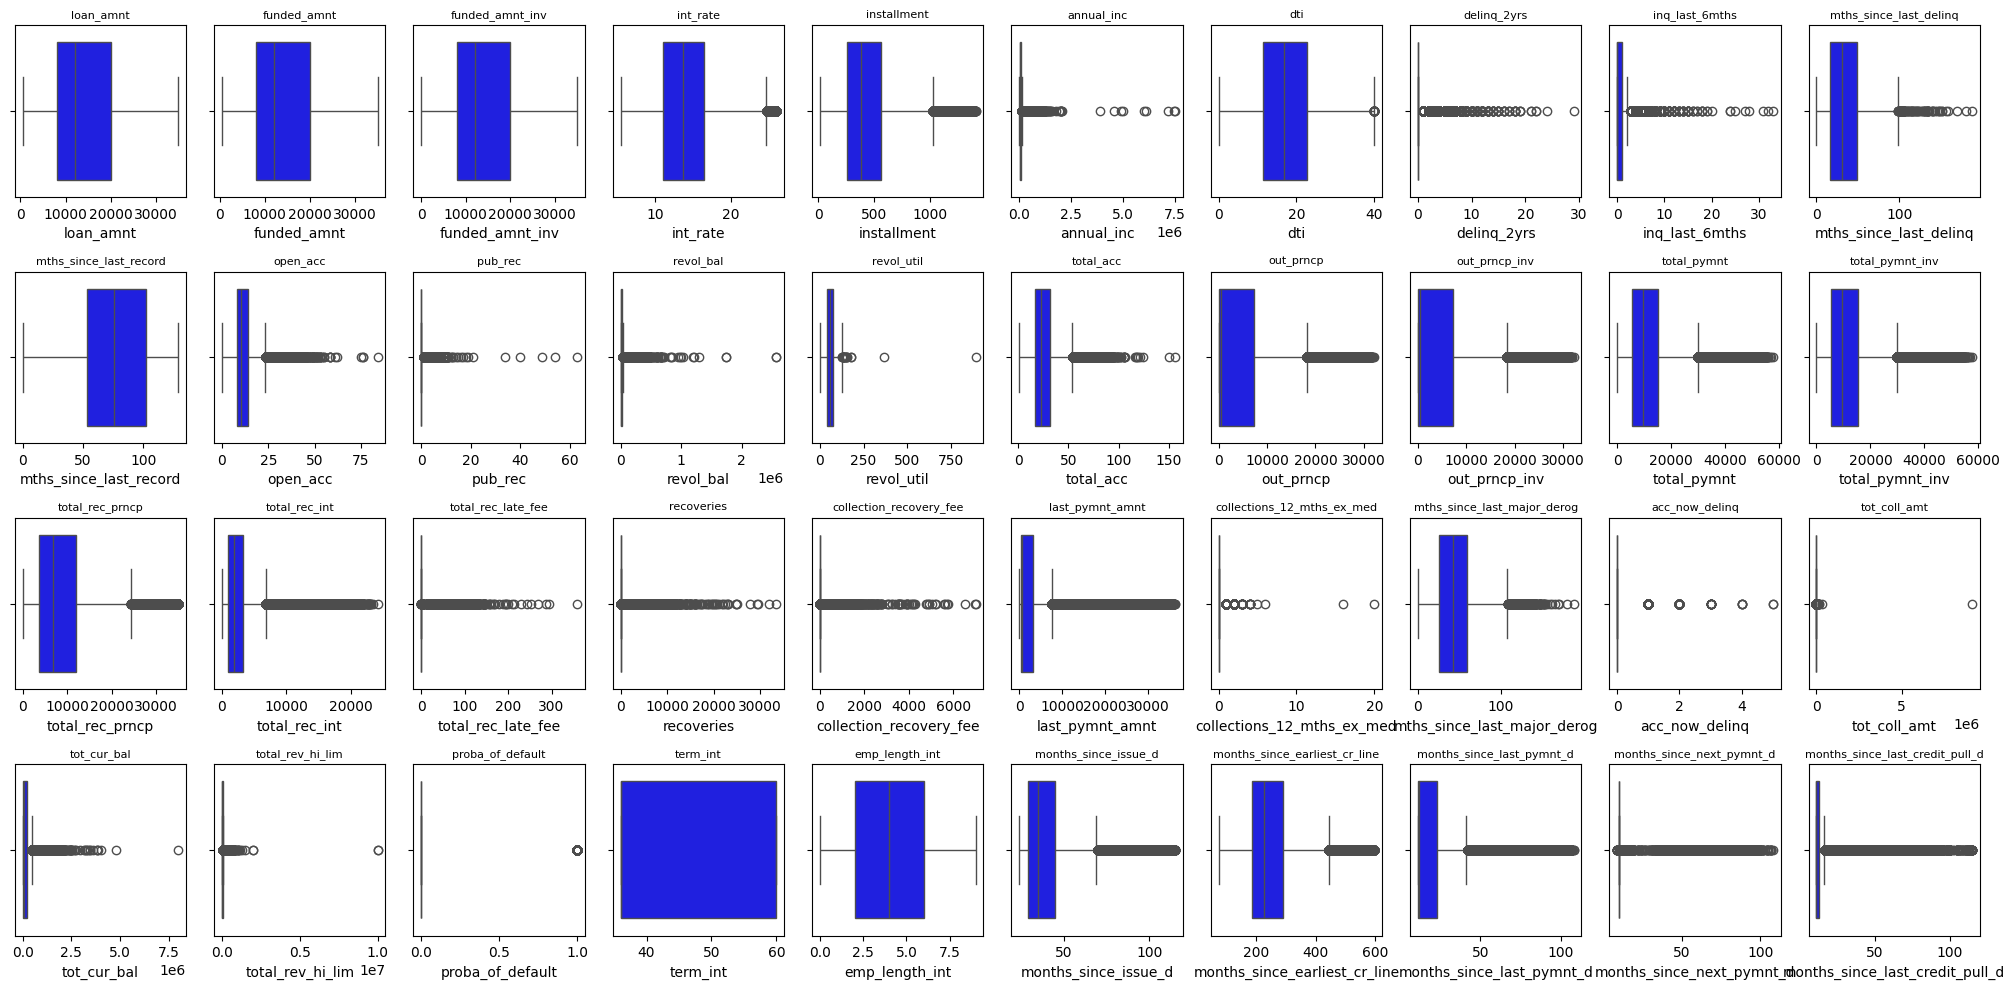

In [ ]:
valid_features = [col for col in numerical_columns
                 if df[col].notna().any() and df[col].nunique() > 1]

figure, axes = plt.subplots(nrows=4, ncols=10, figsize=(20, 10))

for index, feature in enumerate(valid_features):  # Use filtered list
    row_position = index // 10
    col_position = index % 10

    sns.boxplot(x=df[feature], color='blue', ax=axes[row_position, col_position])
    axes[row_position, col_position].set_title(feature, fontsize=8)

# Hide unused subplots
for j in range(len(valid_features), 40):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

There are **3 columns** that have extreme outliers that deviate significantly from the normal distribution. These columns are `tot_coll_amt, tot_cur_bal, total_rev_hi_lim`. These columns will be reduced by manual outliers because many features are indeed outliers (very high variance).

In [ ]:
from scipy import stats

In [ ]:
# Display the dataframe dimension before outlier removal
print('Data Count Before Outlier Removal:', df.shape)

# Removing rows with extreme values in certain columns
# For column tot_coll_amt (total collections)
df.drop(df[df['tot_coll_amt'] > 9_000_000].index,
 inplace=True,
 errors='ignore')

# For tot_cur_bal column (current balance)
df.drop(df[df['tot_cur_bal'] > 7_000_000].index,
 inplace=True,
 errors='ignore')

# For column total_rev_hi_lim (highest credit limit)
df.drop(df[df['total_rev_hi_lim'] > 9_000_000].index,
 inplace=True,
 errors='ignore')

# Display the dimensions of the dataframe after removal
print('Total Data After Outlier Removal:', df.shape)

Data Count Before Outlier Removal: (465116, 58)
Total Data After Outlier Removal: (465112, 58)


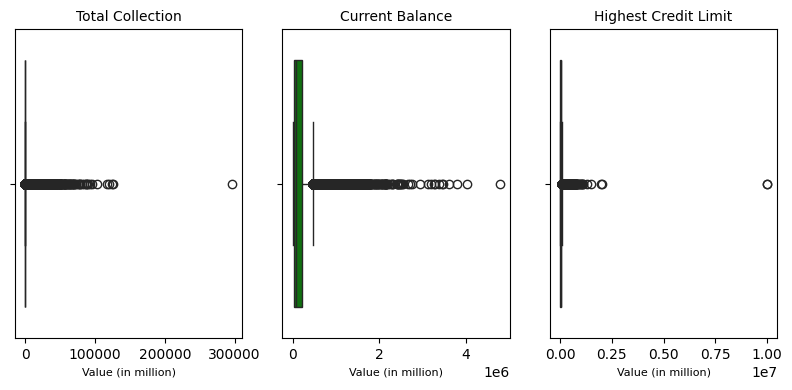

In [ ]:
# Create a figure with 3 horizontal subplots (1 row x 3 columns)
plt.figure(figsize=(8, 4)) # Canvas size 8x4 inches

# Boxplot for total number of collections
plt.subplot(1, 3, 1) # First subplot position
sns.boxplot(data=df, x='tot_coll_amt', color='green')
plt.title('Total Collection', fontsize=10)
plt.xlabel('Value (in million)', fontsize=8)

# Boxplot for current balance
plt.subplot(1, 3, 2) # Second subplot position
sns.boxplot(data=df, x='tot_cur_bal', color='green')
plt.title('Current Balance', fontsize=10)
plt.xlabel('Value (in million)', fontsize=8)

# Boxplot for the highest credit limit
plt.subplot(1, 3, 3) # Third subplot position
sns.boxplot(data=df_idx, x='total_rev_hi_lim', color='green')
plt.title('Highest Credit Limit', fontsize=10)
plt.xlabel('Value (in million)', fontsize=8)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### **Check Invalid Value**

In [ ]:
# Extract categorical features from the dataframe
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Display the list of categorical columns
print("Identified Categorical Features:")
print(categorical_features)

Identified Categorical Features:
['term', 'grade', 'emp_title', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'initial_list_status', 'application_type']


In [ ]:
# Display header for unique values output
print("\n=== Unique Values per Categorical Feature ===")

# Iterate through each categorical column and display its unique values
for column_name in categorical_features:
    # Extract unique values from the column
    unique_vals = df[column_name].unique()

# Display results in a clean format
    print(f"\nColumn: {column_name}")
    print(f"Unique values ({len(unique_vals)}):")
    print(unique_vals)


=== Unique Values per Categorical Feature ===

Column: term
Unique values (2):
[' 36 months' ' 60 months']

Column: grade
Unique values (7):
['B' 'C' 'A' 'E' 'F' 'D' 'G']

Column: emp_title
Unique values (205223):
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

Column: home_ownership
Unique values (6):
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

Column: verification_status
Unique values (3):
['Verified' 'Source Verified' 'Not Verified']

Column: issue_d
Unique values (91):
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 

In [ ]:
df.drop(['application_type'], axis=1, inplace=True)
df.shape

(465112, 57)

# **EDA - Insight**

In [ ]:
df_eda = df.copy()
df_eda.sample(3)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
129149      12000        12000          12000.0   36 months     15.31   
193825      16000        16000          16000.0   60 months     16.29   
18317       10000        10000          10000.0   36 months      5.42   

        installment grade emp_title home_ownership  annual_inc  \
129149       417.81     C      wgbh           RENT     50000.0   
193825       391.56     C      USPS           RENT     54000.0   
18317        301.60     A       NaN           RENT     54000.0   

       verification_status issue_d loan_status pymnt_plan             purpose  \
129149        Not Verified  Jun-13  Fully Paid          n  debt_consolidation   
193825            Verified  Oct-12     Current          n  debt_consolidation   
18317             Verified  Mar-11  Fully Paid          n  debt_consolidation   

                title addr_state    dti  delinq_2yrs  inq_last_6mths  \
129149     payoffdebt         CA  18.83          0.0             0.0   
193825  consolidation         FL  24.44          0.0             3.0   
18317             IRS         CT   9.13          0.0             0.0   

        mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
129149                     NaN                     NaN       7.0      0.0   
193825                     NaN                     NaN      13.0      0.0   
18317                      NaN                     NaN       8.0      0.0   

        revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
129149      16366        91.9       23.0                   f       0.00   
193825       6825        16.3       15.0                   f    7114.51   
18317        5698         8.7       15.0                   f       0.00   

        out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
129149           0.00  14762.08105         14762.08         12000.00   
193825        7114.51  15267.48000         15267.48          8885.49   
18317            0.00  10854.82106         10854.82         10000.00   

        total_rec_int  total_rec_late_fee  recoveries  \
129149        2762.08                 0.0         0.0   
193825        6381.99                 0.0         0.0   
18317          854.82                 0.0         0.0   

        collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
129149                      0.0          4735.20                         0.0   
193825                      0.0           391.56                         0.0   
18317                       0.0           328.57                         0.0   

        mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  \
129149                          NaN             0.0           0.0   
193825                          NaN             0.0           0.0   
18317                           NaN             0.0           NaN   

        tot_cur_bal  total_rev_hi_lim  proba_of_default  term_int  \
129149      25331.0           17800.0                 0        36   
193825      52838.0           41800.0                 0        60   
18317           NaN               NaN                 0        36   

        emp_length_int date_issue_d  months_since_issue_d  \
129149             NaN   2013-06-01                    42   
193825             7.0   2012-10-01                    50   
18317              NaN   2011-03-01                    70   

       earliest_cr_line_date  months_since_earliest_cr_line date_last_pymnt_d  \
129149            1995-12-01                          268.0        2015-07-01   
193825            2005-04-01                          154.0        2016-01-01   
18317             1977-08-01                          491.0        2014-04-01   

        months_since_last_pymnt_d date_next_pymnt_d  \
129149                       17.0               NaT   
193825                       11.0        2016-02-01   
18317                        32.0               NaT   

        months_since_next_pymnt_d date_las

Considering the number of variables is too large to analyze comprehensively, this research will focus on the `loan_amnt` feature as the main variable. This approach was chosen for:
1.   See the development of loan value from year to year
2.   Examine the correlation between loan amount and other predictive variables
3.   Simplify the complexity of the dataset without sacrificing key insights

# **Time Series Chart**

In [ ]:
df_datetime = df_eda.select_dtypes('datetime').columns.tolist()
print(df_datetime)

['date_issue_d', 'earliest_cr_line_date', 'date_last_pymnt_d', 'date_next_pymnt_d', 'date_last_credit_pull_d']


### **Date of Issue Loan Amount**

In [ ]:
# Extract year and month components from the issue date
df_eda['year_issue_d'] = df_eda['date_issue_d'].dt.year  # Create year column
df_eda['month_issue_d'] = df_eda['date_issue_d'].dt.month  # Create month column

# Calculate monthly average loan amounts by year and month
df_viz1 = (df_eda
           .groupby(['year_issue_d', 'month_issue_d'])  # Group by year and month
           .agg({'loan_amnt': 'mean'})  # Calculate mean loan amount
           .reset_index()  # Convert groupby object to DataFrame
          )

# Rename columns for clearer interpretation
df_viz1.columns = ['Year', 'Month', 'Average_Loan_Amount']

# Display the resulting dataframe
df_viz1

Year  Month  Average_Loan_Amount
0   2007      6          3827.083333
1   2007      7          5528.968254
2   2007      8          6963.513514
3   2007      9          7036.792453
4   2007     10          7222.355769
5   2007     11          9005.803571
6   2007     12         11002.485380
7   2008      1          9593.442623
8   2008      2          9670.669935
9   2008      3         10332.000000
10  2008      4          9397.200772
11  2008      5          5468.695652
12  2008      6          5323.991935
13  2008      7          6074.290780
14  2008      8          5924.500000
15  2008      9          5573.245614
16  2008     10          7889.754098
17  2008     11          9879.904306
18  2008     12         10138.789683
19  2009      1          9182.620818
20  2009      2          8999.750831
21  2009      3          9435.714286
22  2009      4          9247.672673
23  2009      5          9576.256983
24  2009      6          8848.029557
25  2009      7          9450.980392
26  2009      8          9677.865169
27  2009      9         10073.422091
28  2009     10         10421.144279
29  2009     11         10346.547800
30  2009     12         10817.313546
31  2010      1         11194.461305
32  2010      2         10938.235294
33  2010      3         10464.673913
34  2010      4         10429.203297
35  2010      5         10726.137513
36  2010      6         10116.681777
37  2010      7          9914.036545
38  2010      8         10293.003413
39  2010      9         10296.208930
40  2010     10         10660.475997
41  2010     11         11027.393617
42  2010     12         10700.149925
43  2011      1         10737.336483
44  2011      2         11232.824575
45  2011      3         11437.595156
46  2011      4         11224.311780
47  2011      5         11334.205882
48  2011      6         11421.426616
49  2011      7         11384.229535
50  2011      8         12010.629208
51  2011      9         12484.191355
52  2011     10         12971.946023
53  2011     11         12690.827338
54  2011     12         13958.498896
55  2012      1         13140.460146
56  2012      2         14082.554730
57  2012      3         13565.499485
58  2012      4         13016.385187
59  2012      5         13260.360825
60  2012      6         13157.072498
61  2012      7         13031.019019
62  2012      8         12930.390163
63  2012      9         12652.775037
64  2012     10         13105.434261
65  2012     11         13738.155416
66  2012     12         15505.886977
67  2013      1         15288.618479
68  2013      2         15898.410961
69  2013      3         15420.141749
70  2013      4         14875.348293
71  2013      5         14297.008423
72  2013      6         14506.950704
73  2013      7         14332.782781
74  2013      8         14213.383319
75  2013      9         14472.283279
76  2013     10         14496.261632
77  2013     11         14668.657354
78  2013     12         14919.892132
79  2014      1         14887.599525
80  2014      2         15069.670785
81  2014      3         14877.537377
82  2014      4         14739.809847
83  2014      5         14692.366472
84  2014      6         14897.266628
85  2014      7         14779.980846
86  2014      8         14948.800831
87  2014      9         15034.130846
88  2014     10         14740.610699
89  2014     11         14904.905589
90  2014     12         15375.801032

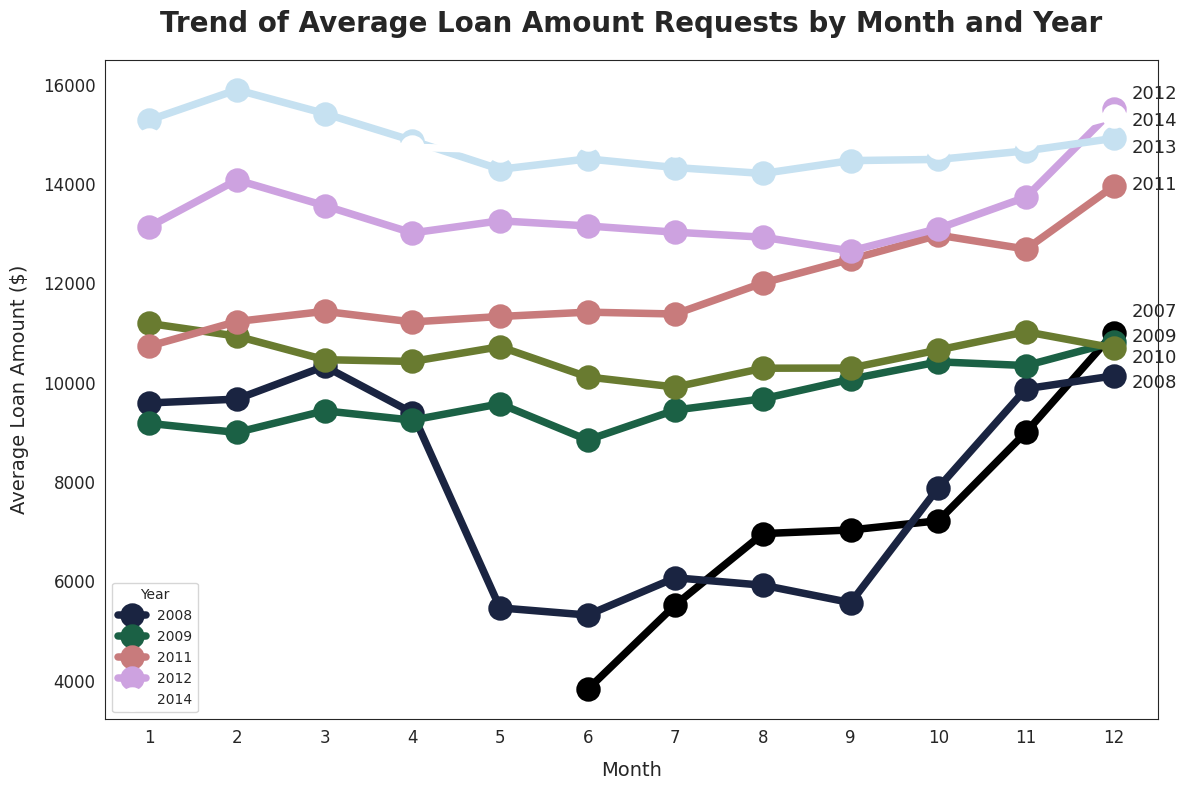

In [ ]:
# Set up the plot style and dimensions
plt.figure(figsize=(12, 8))
sns.set_style("white")

# Create point plot visualization
ax = sns.pointplot(
    x='Month',
    y="Average_Loan_Amount",
    data=df_viz1,
    hue="Year",
    palette="cubehelix",
    markers="o",
    linestyles="-"
)

# Format plot appearance
ax.set_facecolor('white')
plt.title(
    "Trend of Average Loan Amount Requests by Month and Year",
    fontsize=20,
    fontweight="bold",
    fontfamily='sans-serif',
    pad=20
)

# Axis labels formatting
plt.xlabel(
    'Month',
    fontfamily='sans-serif',
    fontsize=14,
    labelpad=10
)
plt.ylabel(
    'Average Loan Amount ($)',
    fontfamily='sans-serif',
    fontsize=14,
    labelpad=10
)

# Custom legend positioning (commented out as per original)
# ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Manual year labels (adjusted for better positioning)
year_labels = {
    2007: (11.2, 11419),
    2008: (11.2, 10000),
    2009: (11.2, 10917),
    2010: (11.2, 10500),
    2011: (11.2, 13985),
    2012: (11.2, 15805),
    2013: (11.2, 14719),
    2014: (11.2, 15275)
}

for year, (x_pos, y_pos) in year_labels.items():
    plt.text(
        x_pos, y_pos, str(year),
        fontsize=13,
        fontfamily='sans-serif',
        va='center'
    )

# Axis ticks formatting
plt.xticks(
    rotation=0,
    fontfamily='sans-serif',
    fontsize=12
)
plt.yticks(
    fontfamily='sans-serif',
    fontsize=12
)

# Final layout adjustments
plt.tight_layout()
plt.show()

# **Scatter Plot**

### **Loan Amount vs Funded Amount**

<Axes: title={'center': 'Relationship Between Requested and Approved Loan Amounts'}, xlabel='Requested Loan Amount ($)', ylabel='Approved Funding Amount ($)'>

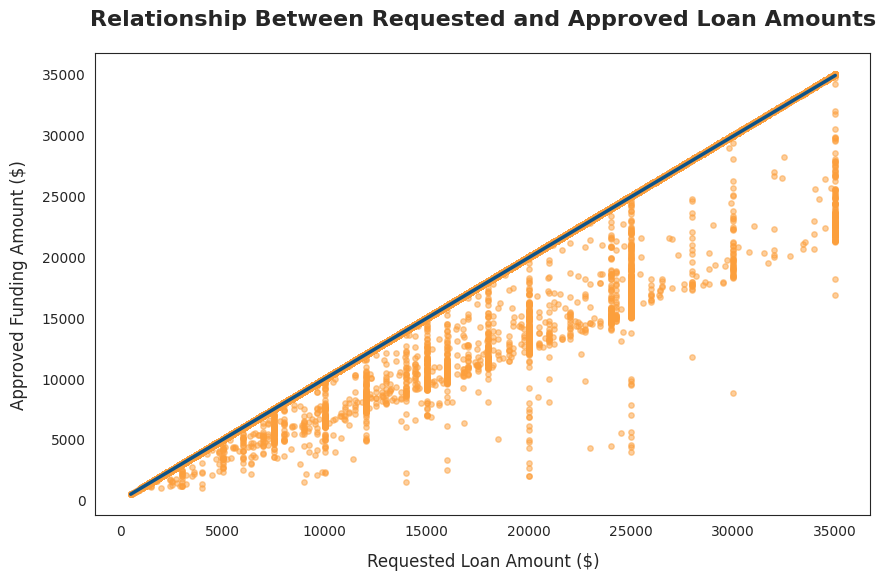

In [ ]:
# Create regression plot with custom styling
plt.figure(figsize=(10, 6))
ax = sns.regplot(
    x='loan_amnt',
    y='funded_amnt',
    data=df_eda,
    marker=".",  # Use small dot markers
    scatter_kws={
        'color': '#fc9f3c',  # Orange color for scatter points
        'alpha': 0.5,        # Semi-transparent points
        's': 60              # Marker size
    },
    line_kws={
        'color': "#0d5388",  # Dark blue for regression line
        'linewidth': 2.5     # Thicker regression line
    }
)

# Set white background
ax.set_facecolor('white')

# Customize axis labels and title
ax.set_xlabel(
    'Requested Loan Amount ($)',
    fontfamily='sans-serif',
    fontsize=12,
    labelpad=10
)
ax.set_ylabel(
    'Approved Funding Amount ($)',
    fontfamily='sans-serif',
    fontsize=12,
    labelpad=10
)
ax.set_title(
    'Relationship Between Requested and Approved Loan Amounts',
    fontsize=16,
    fontweight='bold',
    fontfamily='sans-serif',
    pad=20
)

# Format ticks
ax.tick_params(
    axis='both',
    which='major',
    labelsize=10,
    rotation=0
)

# Add grid for better readability
ax

# **Column Chart**

### **Count Bad Loan vs Good Loan**

In [ ]:
df_pp1 = df_eda.groupby(['proba_of_default']).agg({'loan_amnt':'count'}).reset_index()
df_pp1.columns = ['proba_of_default','total_user']
df_pp1['Ratio'] = round(df_pp1['total_user']/df_pp1['total_user'].sum()*100,0)
df_pp1

proba_of_default  total_user  Ratio
0                 0      414292   89.0
1                 1       50820   11.0

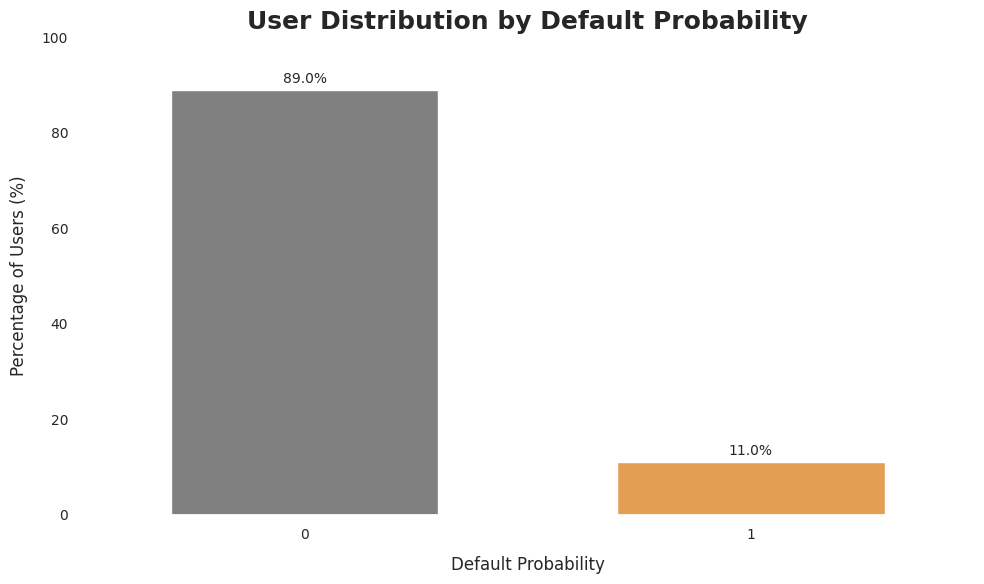

In [ ]:
# Create custom color mapping - highlight bars with Ratio = 11% in orange
bar_colors = ['#fc9f3c' if ratio == 11 else 'grey' for ratio in df_pp1['Ratio']]

# Initialize plot with dark grid style
plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')

# Generate bar plot
ax = sns.barplot(
    data=df_pp1,
    x='proba_of_default',
    y='Ratio',
    palette=bar_colors,
    width=0.6  # Adjusted bar width
)

# Customize plot appearance
ax.set_facecolor('white')
plt.title(
    'User Distribution by Default Probability',
    size=18,
    weight='bold',
    fontfamily='sans-serif'
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.1f%%',  # Format as percentage with 1 decimal
        padding=3,
        fontsize=10
    )

# Axis labels customization
ax.set_xlabel(
    'Default Probability',
    fontfamily='sans-serif',
    fontsize=12,
    labelpad=10
)
ax.set_ylabel(
    'Percentage of Users (%)',
    fontfamily='sans-serif',
    fontsize=12,
    labelpad=10
)

# Axis ticks formatting
ax.tick_params(
    axis='both',
    which='major',
    labelsize=10,
    rotation=0
)

# Set y-axis limit and display
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### **Count Objective Ratio**

In [ ]:
# Calculate loan count by purpose category
purpose_distribution = (
    df_eda.groupby('purpose')['loan_amnt']  # Group by loan purpose
    .count()                                # Count loans per purpose
    .reset_index(name='total_users')        # Convert to DataFrame
)

# Calculate percentage distribution
purpose_distribution['percentage'] = round(
    purpose_distribution['total_users'] /
    purpose_distribution['total_users'].sum() * 100,
    1  # Round to 1 decimal place
)

# Sort by percentage (descending) and clean index
purpose_distribution = (
    purpose_distribution
    .sort_values('percentage', ascending=False)
    .reset_index(drop=True)  # Clean reset without keeping old index
)

# Display results
purpose_distribution

purpose  total_users  percentage
0   debt_consolidation       273587        58.8
1          credit_card       103824        22.3
2     home_improvement        26460         5.7
3                other        23625         5.1
4       major_purchase         9807         2.1
5       small_business         6994         1.5
6                  car         5380         1.2
7              medical         4586         1.0
8               moving         2987         0.6
9                house         2269         0.5
10             wedding         2343         0.5
11            vacation         2478         0.5
12         educational          422         0.1
13    renewable_energy          350         0.1

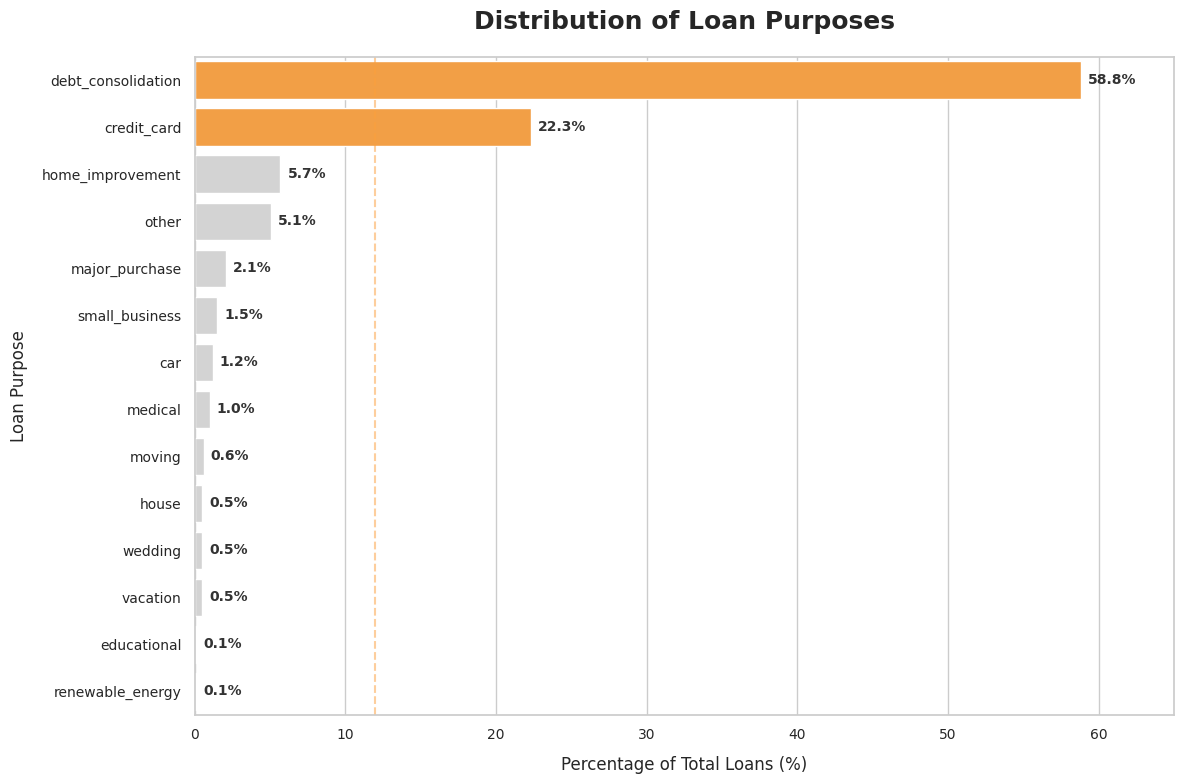

In [ ]:
# Create color mapping - highlight bars with Ratio >= 12% in orange
bar_colors = ['#fc9f3c' if ratio >= 12 else 'lightgrey' for ratio in purpose_distribution['percentage']]

# Set up the visualization
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')  # Cleaner white background with grid

# Create horizontal bar plot
ax = sns.barplot(
    data=purpose_distribution,
    x='percentage',
    y='purpose',
    palette=bar_colors,
    saturation=0.9,  # More vibrant colors
    width=0.8       # Better bar thickness
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.1f%%',  # Format as percentage with 1 decimal
        padding=5,
        fontsize=10,
        fontweight='bold',
        color='#333333'
    )

# Customize plot appearance
ax.set_facecolor('white')
plt.title(
    'Distribution of Loan Purposes',
    fontsize=18,
    fontweight='bold',
    fontfamily='sans-serif',
    pad=20
)

# Axis labels
ax.set_xlabel(
    'Percentage of Total Loans (%)',
    fontfamily='sans-serif',
    fontsize=12,
    labelpad=10
)
ax.set_ylabel(
    'Loan Purpose',
    fontfamily='sans-serif',
    fontsize=12,
    labelpad=10
)

# Adjust ticks and limits
plt.xticks(fontfamily='sans-serif', fontsize=10)
plt.yticks(fontfamily='sans-serif', fontsize=10)
plt.xlim(0, 65)

# Add reference line at 12%
ax.axvline(x=12, color='#fc9f3c', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Personal loan vs Business loan**

*   Personal loan: debt_consolidation, credit_card, home_improvement, major_purchase, car, medical, moving, house, vacation, wedding, other
*   Business loan: small_business, educational, renewable_energy


In [ ]:
# Categorize loan purposes into business or personal loans
business_purposes = ['small_business', 'educational', 'renewable_energy']
df_eda['loan_category'] = np.where(
    df_eda['purpose'].isin(business_purposes),
    'business loan',
    'personal loan'
)

# Display the first 3 rows to verify
df_eda.head(3)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   

  grade emp_title home_ownership  annual_inc verification_status issue_d  \
0     B       NaN           RENT     24000.0            Verified  Dec-11   
1     C     Ryder           RENT     30000.0     Source Verified  Dec-11   
2     C       NaN           RENT     12252.0        Not Verified  Dec-11   

   loan_status pymnt_plan         purpose                 title addr_state  \
0   Fully Paid          n     credit_card              Computer         AZ   
1  Charged Off          n             car                  bike         GA   
2   Fully Paid          n  small_business  real estate business         IL   

     dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
0  27.65          0.0             1.0                     NaN   
1   1.00          0.0             5.0                     NaN   
2   8.72          0.0             2.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0  5861.071414   
1        4.0                   f        0.0            0.0  1008.710000   
2       10.0                   f        0.0            0.0  3003.653644   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                 0.0   
1          1008.71           456.46         435.17                 0.0   
2          3003.65          2400.00         603.65                 0.0   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0        0.00                     0.00           171.62   
1      117.08                     1.11           119.66   
2        0.00                     0.00           649.91   

   collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  \
0                         0.0                          NaN             0.0   
1                         0.0                          NaN             0.0   
2                         0.0                          NaN             0.0   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim  proba_of_default  term_int  \
0           NaN          NaN               NaN                 0        36   
1           NaN          NaN               NaN                 1        60   
2           NaN          NaN               NaN                 0        36   

   emp_length_int date_issue_d  months_since_issue_d earliest_cr_line_date  \
0             NaN   2011-12-01                    60            1985-01-01   
1             0.0   2011-12-01                    60            1999-04-01   
2             NaN   2011-12-01                    60            2001-11-01   

   months_since_earliest_cr_line date_last_pymnt_d  months_since_last_pymnt_d  \
0                          401.0        2015-01-01                       23.0   
1                          227.0        2013-04-01                       44.0   
2                          196.0        2014-06-01                       30.0   

  date_next_pymnt_d  months_since_next_pymnt_d date_last_credit_pull_d  \
0               NaT                        NaN              2016-01-01   
1               NaT                        NaN              2013-09-01   
2               NaT                        NaN              2016-01-01   

   months_since_last_credit_pull_d  year_issue_d  month_issue_d  loan_category  
0                             11.0   

<Figure size 1200x700 with 0 Axes>

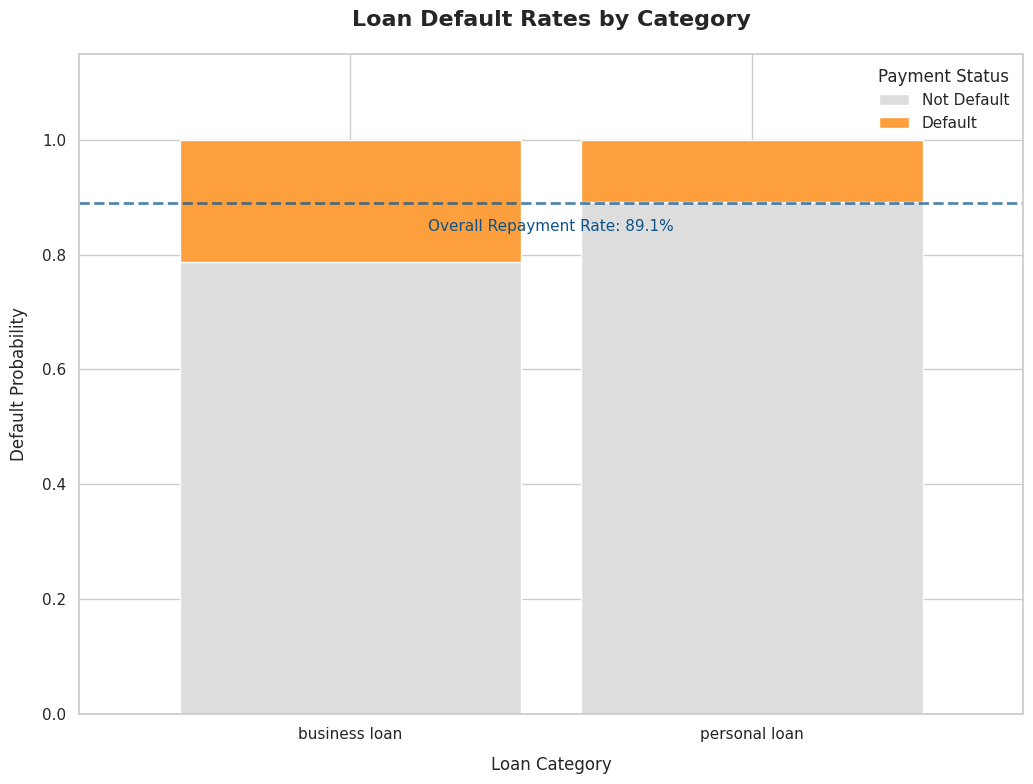

In [ ]:
# Set font style (using default sans-serif for better compatibility)
font = {'family': 'sans-serif', 'size': 13, 'weight': 'normal'}

# Prepare data: select relevant columns and categorize default status
# Use loan_category from df_eda and proba_of_default from df_idx
loan_analysis = df_eda[['loan_category']].copy()
loan_analysis['proba_of_default'] = df['proba_of_default']

loan_analysis['default_status'] = np.where(
    loan_analysis['proba_of_default'] == 1,
    'Default',
    'Not Default'
)

# Create normalized crosstab
default_distribution = pd.crosstab(
    index=loan_analysis['loan_category'],  # Use loan_category
    columns=loan_analysis['default_status'],
    normalize='index'
).reindex(columns=['Not Default', 'Default'])  # Ensure consistent order

# Create visualization
plt.figure(figsize=(12, 7))
ax = default_distribution.plot(
    kind='bar',
    stacked=True,
    color=['#dddddd', '#fc9f3c'],  # Light grey and orange
    width=0.85,
    edgecolor='white'
)

# Reference line for average repayment rate
avg_repayment = loan_analysis['proba_of_default'].value_counts(normalize=True)[0]
plt.axhline(
    y=avg_repayment,
    color='#0d5388',
    linestyle='--',
    linewidth=2,
    alpha=0.7
)

# Customize plot appearance
ax.set_facecolor('white')
plt.title(
    'Loan Default Rates by Category',  # Updated title
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Loan Category', fontsize=12, labelpad=10) # Updated xlabel
plt.ylabel('Default Probability', fontsize=12, labelpad=10)

# Add annotation for reference line
plt.text(
    x=0.5,
    y=avg_repayment - 0.05,
    s=f'Overall Repayment Rate: {avg_repayment:.1%}',
    fontsize=11,
    color='#0d5388',
    ha='center'
)

# Format axes and legend
plt.ylim(0, 1.15)
plt.xticks(rotation=0, ha='center') # Adjusted rotation
plt.legend(
    title='Payment Status',
    bbox_to_anchor=(1, 1),
    frameon=False
)

plt.tight_layout()
plt.show()

###**Initial List Status Count Ratio**

<Figure size 1000x600 with 0 Axes>

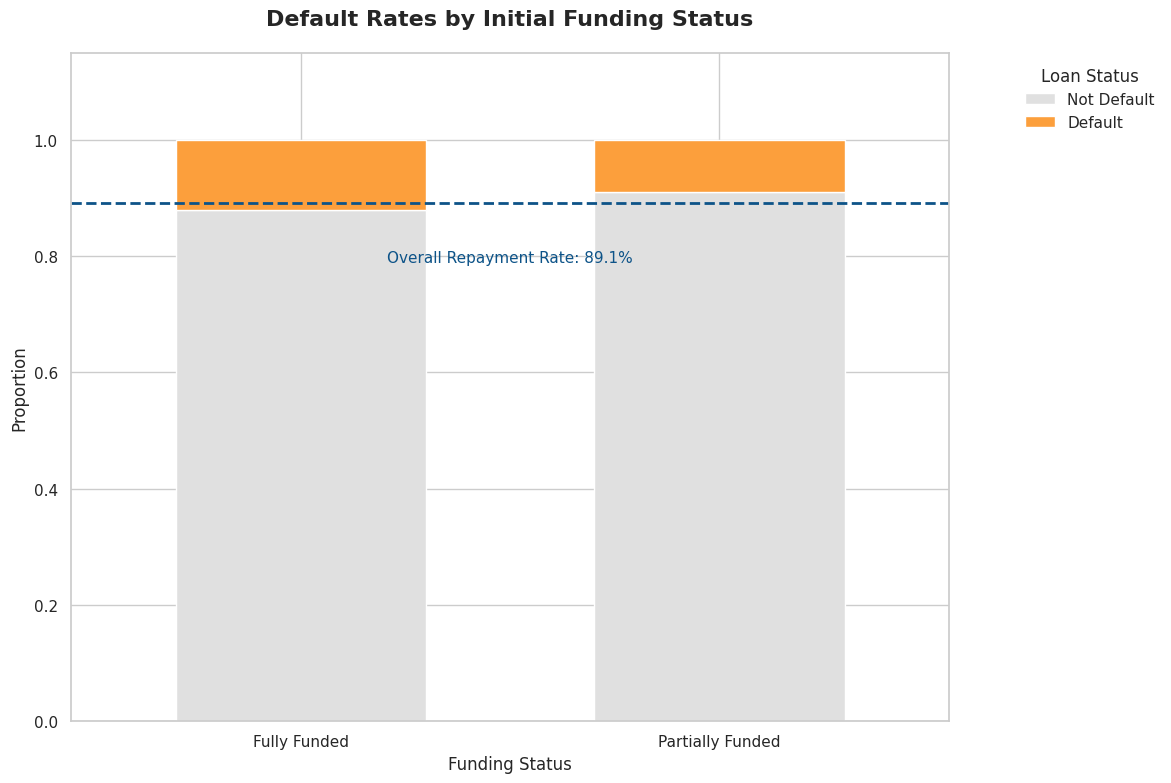

In [ ]:
# Prepare data: Select and transform relevant columns
loan_status_analysis = df_eda[['initial_list_status']].copy()
loan_status_analysis['proba_of_default'] = df['proba_of_default']
loan_status_analysis['default_status'] = np.where(
    loan_status_analysis['proba_of_default'] == 1,
    'Default',
    'Not Default'
)
loan_status_analysis['funding_status'] = np.where(
    loan_status_analysis['initial_list_status'] == 'f',
    'Fully Funded',
    'Partially Funded'
)

# Calculate proportional distribution
status_default_dist = pd.crosstab(
    index=loan_status_analysis['funding_status'],
    columns=loan_status_analysis['default_status'],
    normalize='index'
)[['Not Default', 'Default']]  # Ensure consistent column order

# Create visualization
plt.figure(figsize=(10, 6))
ax = status_default_dist.plot(
    kind='bar',
    stacked=True,
    color=['#e0e0e0', '#fc9f3c'],  # Light gray and orange
    width=0.6,
    edgecolor='white'
)

# Add reference line for overall repayment rate
overall_repayment_rate = df['proba_of_default'].value_counts(normalize=True)[0]
plt.axhline(
    y=overall_repayment_rate,
    color='#0d5388',
    linestyle='--',
    linewidth=2
)

# Customize plot appearance
ax.set_facecolor('white')
plt.title(
    'Default Rates by Initial Funding Status',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Funding Status', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

# Add annotation
plt.text(
    x=0.5,
    y=overall_repayment_rate - 0.1,
    s=f'Overall Repayment Rate: {overall_repayment_rate:.1%}',
    fontsize=11,
    ha='center',
    color='#0d5388'
)

# Format axes
plt.ylim(0, 1.15)
plt.xticks(rotation=0)
plt.legend(
    title='Loan Status',
    bbox_to_anchor=(1.25, 1),
    frameon=False
)

plt.tight_layout()
plt.show()

### **Interest Rate Ratio**

In [ ]:
# Categorize interest rates into tiered groups
df_eda['int_rate_group'] = np.select(
    [
        df_eda['int_rate'] < 11,
        df_eda['int_rate'] < 15,
        df_eda['int_rate'] < 19,
        df_eda['int_rate'] < 23
    ],
    [
        '5%-10%',
        '10%-14%',
        '14%-18%',
        '18%-22%'
    ],
    default='22%-26%'  # For rates ≥ 23%
)

<Figure size 1200x700 with 0 Axes>

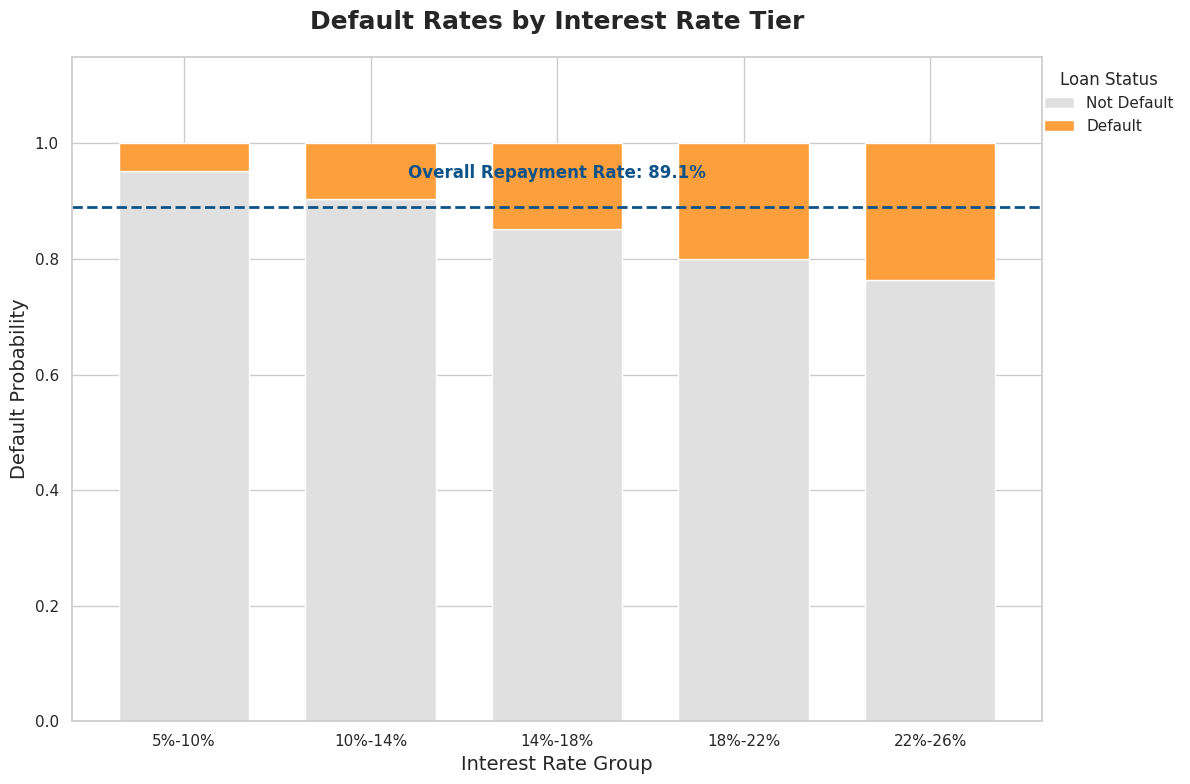

In [ ]:
# Prepare the data: select and transform relevant columns
interest_rate_analysis = df_eda[['int_rate_group']].copy()
interest_rate_analysis['proba_of_default'] = df['proba_of_default']
interest_rate_analysis['default_status'] = np.where(
    interest_rate_analysis['proba_of_default'] == 1,
    'Default',
    'Not Default'
)

# Calculate proportional distribution
rate_default_dist = pd.crosstab(
    index=interest_rate_analysis['int_rate_group'],
    columns=interest_rate_analysis['default_status'],
    normalize='index'
)[['Not Default', 'Default']]  # Ensure consistent column order

# Create proper ordering for interest rate groups
rate_order = ['5%-10%', '10%-14%', '14%-18%', '18%-22%', '22%-26%']
rate_default_dist = rate_default_dist.loc[rate_order]

# Create visualization
plt.figure(figsize=(12, 7))
ax = rate_default_dist.plot(
    kind='bar',
    stacked=True,
    color=['#e0e0e0', '#fc9f3c'],  # Light gray and orange
    width=0.7,
    edgecolor='white'
)

# Add reference line for overall repayment rate
overall_repayment = df['proba_of_default'].value_counts(normalize=True)[0]
plt.axhline(
    y=overall_repayment,
    color='#0d5388',
    linestyle='--',
    linewidth=2
)

# Customize plot appearance
ax.set_facecolor('white')
plt.title(
    'Default Rates by Interest Rate Tier',
    fontsize=18,
    fontweight='bold',
    pad=20
)
plt.xlabel('Interest Rate Group', fontsize=14)
plt.ylabel('Default Probability', fontsize=14)

# Add annotation
plt.text(
    x=2,  # Middle position
    y=overall_repayment + 0.05,
    s=f'Overall Repayment Rate: {overall_repayment:.1%}',
    fontsize=12,
    ha='center',
    color='#0d5388',
    fontweight='bold'
)

# Format axes
plt.ylim(0, 1.15)
plt.xticks(rotation=0)
plt.legend(
    title='Loan Status',
    bbox_to_anchor=(1.15, 1),
    frameon=False
)

plt.tight_layout()
plt.show()

# **EDA - Redundant Features**

#### **Drop EDA - Insight**

#### **Drop High Correlation**

In [ ]:

#TIdak usah di running

#columns_to_drop = [
    #'id','member_id','unnamed:0', 'policy_code','annual_inc_joint','dti_joint',
    #'verification_status_joint', 'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il',
    #'total_bal_il','il_util','open_rv_12m','open_rv_24m','open_rv_24m','max_bal_bc','all_util',
    #'inq_fi','total_cu_tl','inq_last_12m'
    #]

In [ ]:
#TIdak usah di running
 # def safe_drop_columns(df, cols_to_drop):
  #  """Fungsi aman untuk menghapus kolom"""
   # existing_cols = [col for col in cols_to_drop
             #       if col in df.columns]

  #  if len(existing_cols) < len(cols_to_drop):
     #   missing = set(cols_to_drop) - set(existing_cols)
    #    print(f"Warning: {len(missing)} kolom tidak ditemukan: {missing}")

   # return df.drop(columns=existing_cols)

# Gunakan fungsi
#df_clean = safe_drop_columns(df, columns_to_drop)
#print(f"Shape sebelum: {df.shape}, sesudah: {df_clean.shape}")

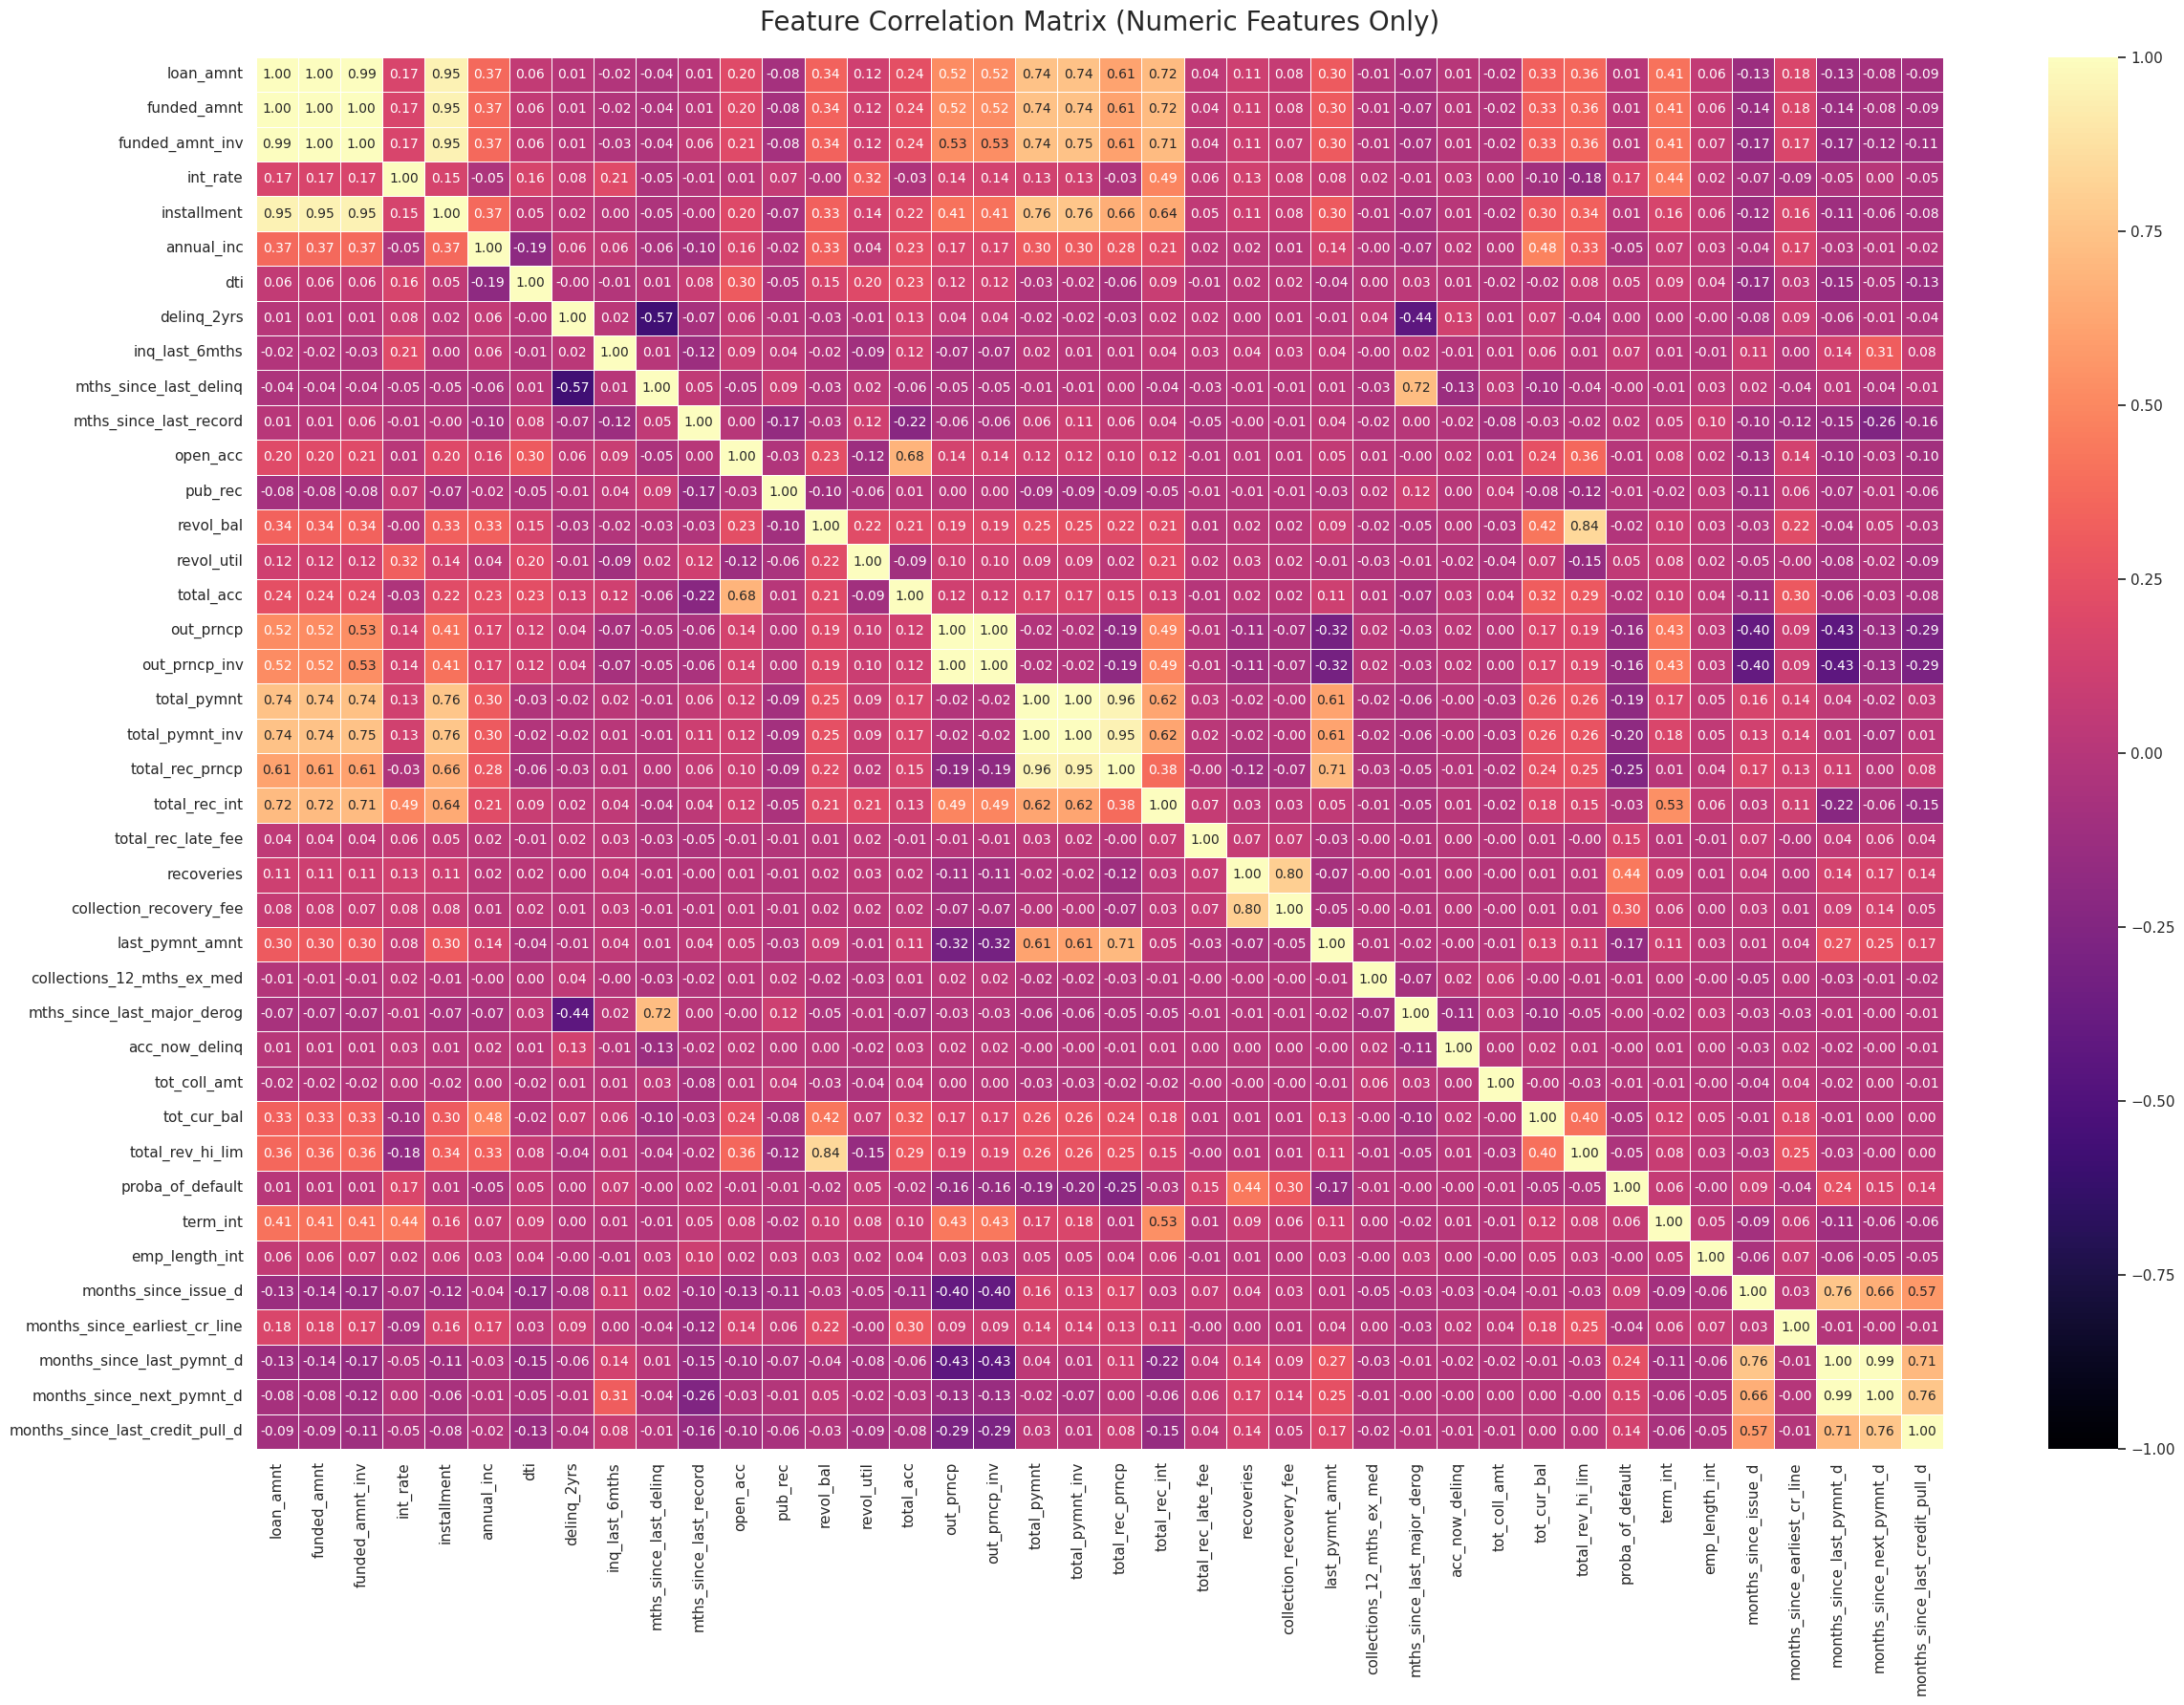


Dataset Dimensions (after dropping temporal and redundant features):


(465112, 57)

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Set up the figure dimensions for better readability
plt.figure(figsize=(25, 18))

# Create a comprehensive correlation heatmap
correlation_matrix = numeric_df.corr()
sns.heatmap(
    correlation_matrix,
    cmap='magma',        # Color scheme optimized for visibility
    annot=True,          # Show correlation values
    fmt='.2f',           # Format to 2 decimal places
    annot_kws={'size': 10},  # Adjust annotation font size
    linewidths=0.5,      # Add subtle grid lines
    vmin=-1, vmax=1      # Fix color scale from -1 to 1
)

# Add title and display
plt.title(
    'Feature Correlation Matrix (Numeric Features Only)', # Updated title
    fontsize=20,
    pad=20
)
plt.tight_layout()
plt.show()

# Show dataset dimensions after processing
print("\nDataset Dimensions (after dropping temporal and redundant features):") # Updated print statement
display(df.shape)

Based on the correlation heatmap results, many overlapping or redundant features were found. To avoid the problem of multicollinearity, one of the feature pairs that has a correlation of more than 0.7 will be removed. The threshold of 0.7 was chosen because it provides a good balance between removing features that are too similar and retaining features that are still related but carry different information. Correlations below this number are generally considered weak or insignificant, while correlations above 0.7 are considered quite strong and tend to retain similar information. Therefore, a correlation threshold of 0.7 is considered appropriate to consider both aspects.



In [ ]:
import pandas as pd
import numpy as np

# 1. Filter only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 2. Calculate absolute correlation matrix
abs_corr_matrix = numeric_df.corr().abs()

# 3. Create upper triangular mask (no diagonal)
mask = np.triu(np.ones_like(abs_corr_matrix, dtype=bool), k=1)
upper_triangle = abs_corr_matrix.where(mask)

# 4. Identify columns with correlation >0.7
high_corr_cols = [
    col for col in upper_triangle.columns
    if any(upper_triangle[col] > 0.7)
]

# 5. Show results
print("Fitur dengan korelasi tinggi (>0.7):")
high_corr_cols

Fitur dengan korelasi tinggi (>0.7):


['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'months_since_last_pymnt_d',
 'months_since_next_pymnt_d',
 'months_since_last_credit_pull_d']

In [ ]:
# 1. Only drop columns that actually exist in the dataframe
cols_to_drop = [col for col in high_corr_cols if col in df.columns]

# 2. Drop columns by checking
if cols_to_drop:  # Jika ada kolom yang perlu di-drop
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"Dropped {len(cols_to_drop)} highly correlated columns")
else:
    print("No columns to drop - all specified columns not found in dataframe")

# 3. Verify final dimensions
print("\nFinal dataset dimensions:", df.shape)

Dropped 15 highly correlated columns

Final dataset dimensions: (465112, 42)


In [ ]:
# Take only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Remove columns where all values are equal (zero variance)
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

# Remove columns where all values are NaN after correlation
corr_matrix = numeric_df.corr()
corr_matrix = corr_matrix.dropna(axis=1, how='all').dropna(axis=0, how='all')

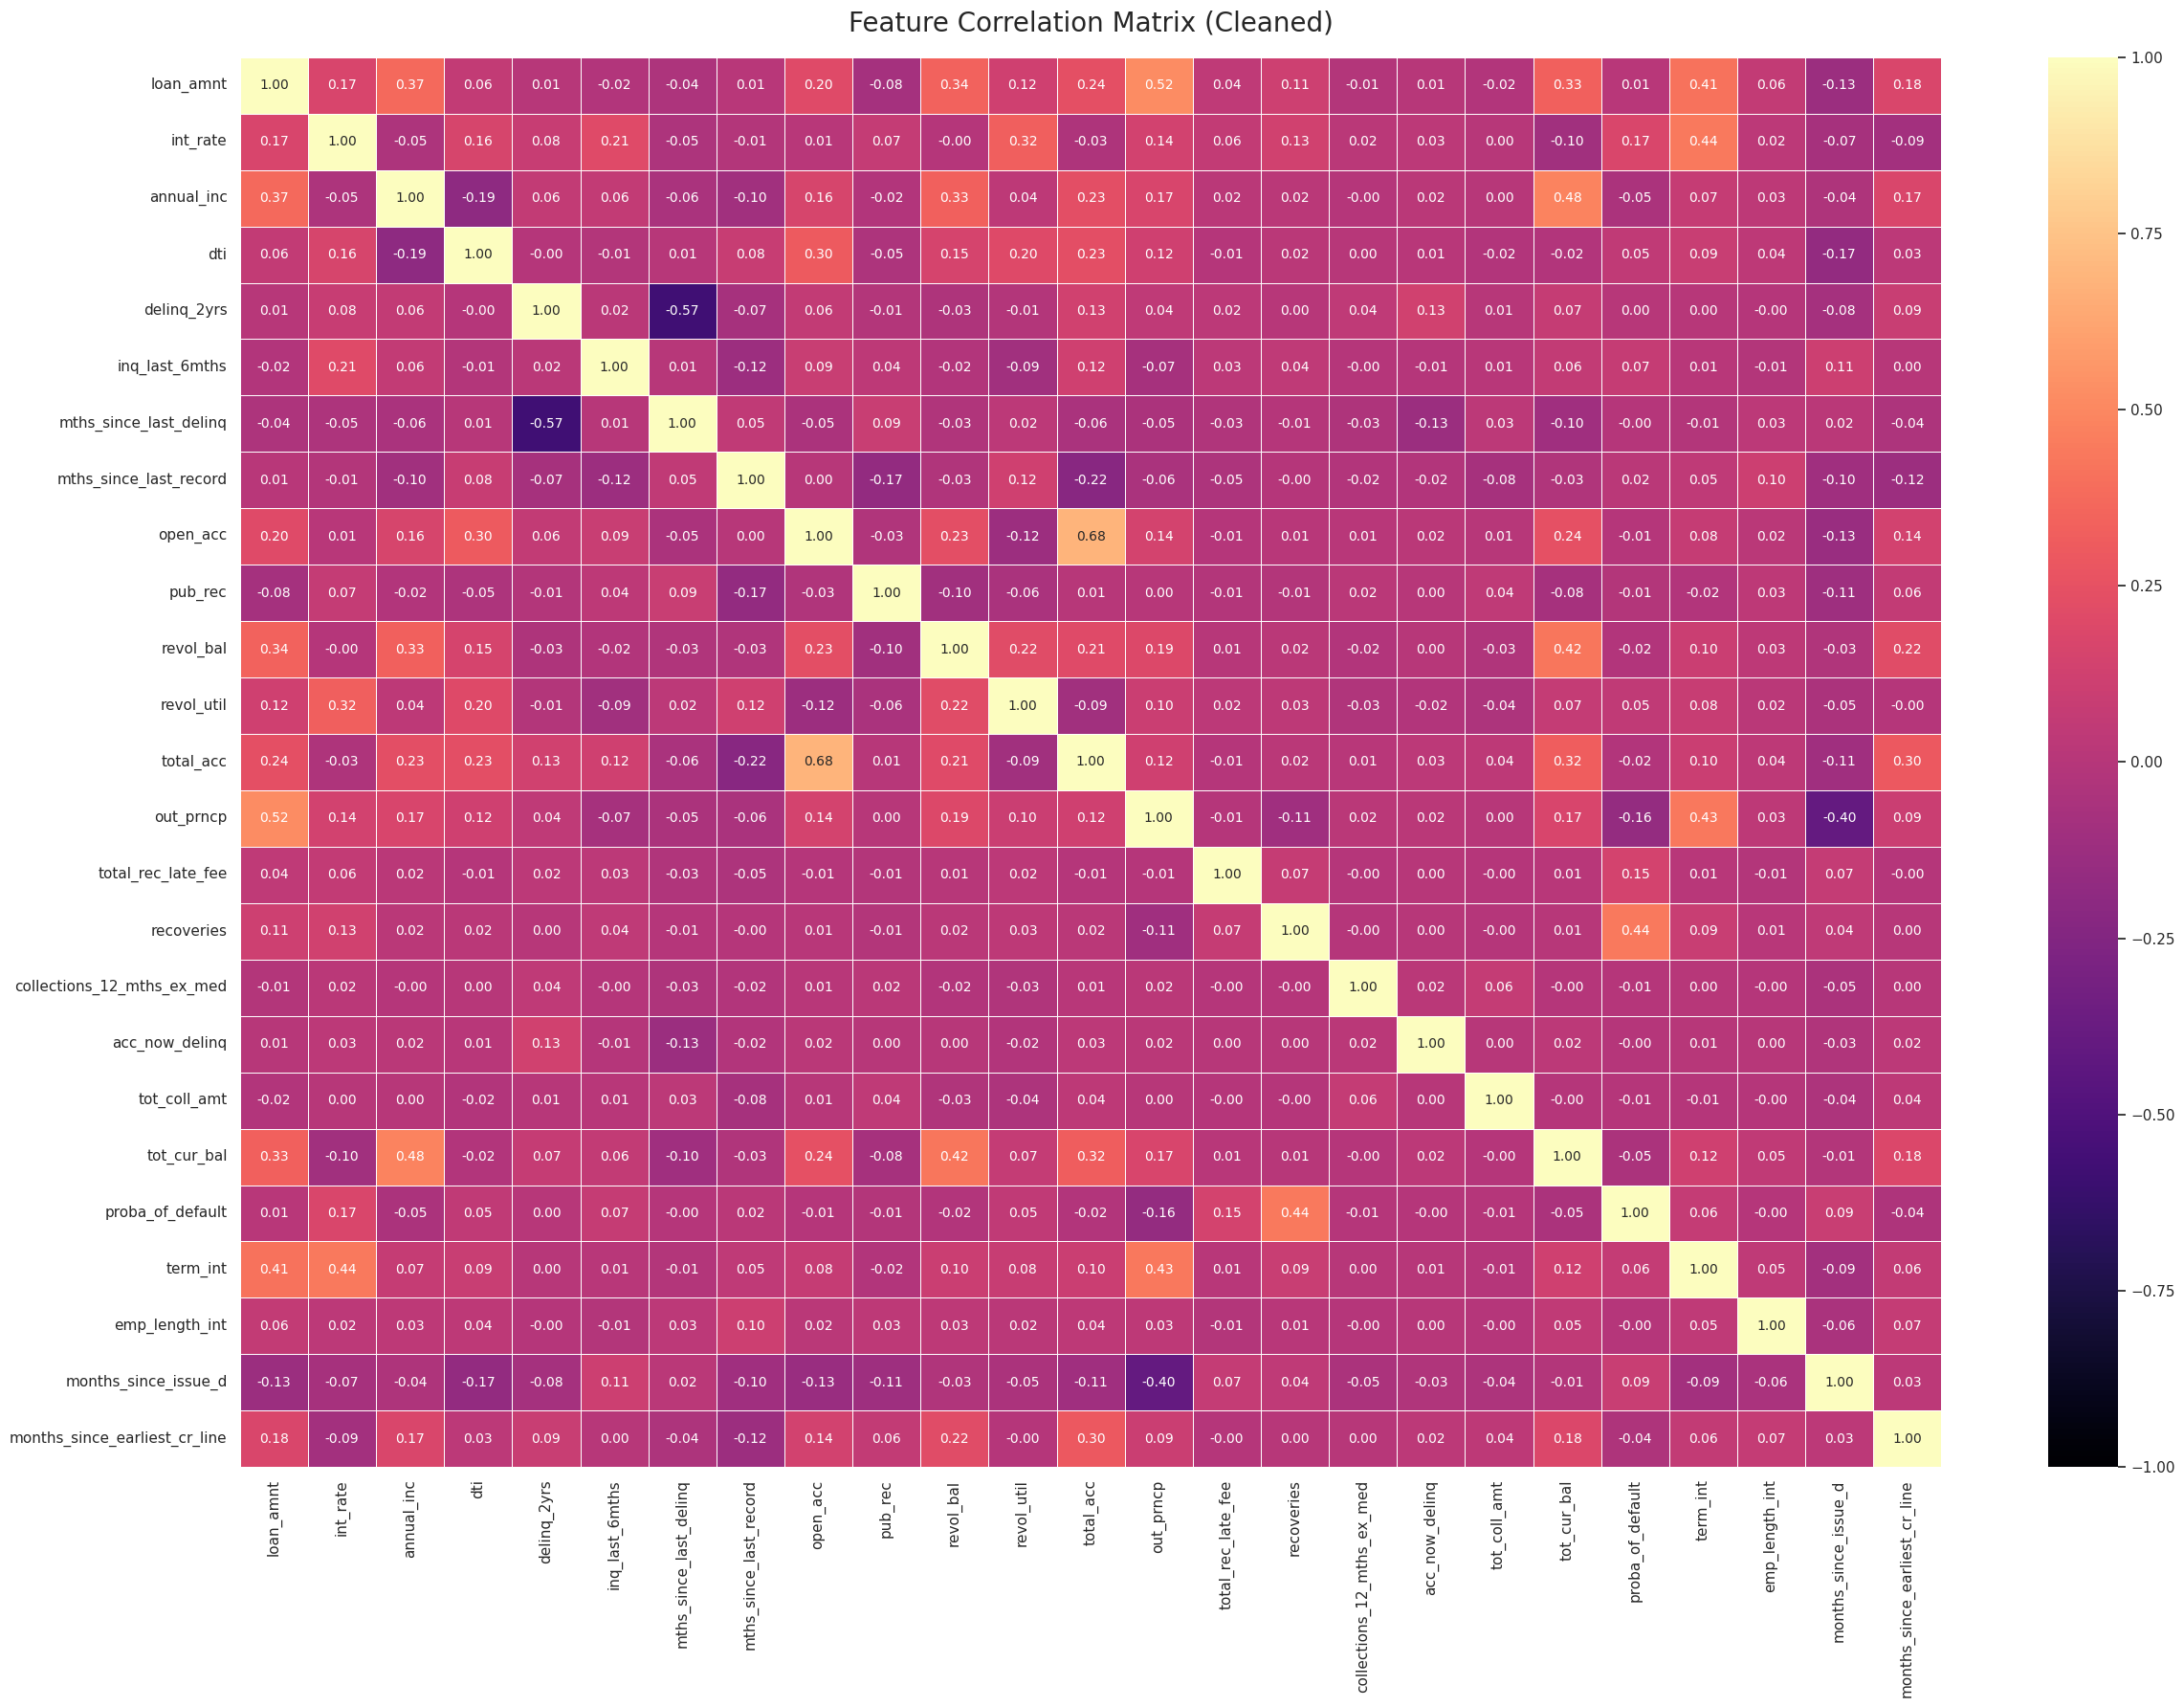

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Remove columns with zero variance
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

# 4. Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the heat map
plt.figure(figsize = (25, 18))
sns.heatmap(
 corr_matrix,
 cmap='magma',
 annot=True,
 fmt='.2f',
 annot_kws={'size': 10},
 linewidths=0.5,
 vmin=-1, vmax=1
)
plt.title('Feature Correlation Matrix (Cleaned)', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

## **Drop High Cardinality**

In [ ]:
# Get categorical columns and calculate uniqueness metrics
(
    df.select_dtypes(include=['object'])
    .nunique()
    .to_frame('Unique Values')
    .sort_values('Unique Values', ascending=False)
    .assign(Percentage=lambda x: x['Unique Values']/len(df)*100)
)

Unique Values  Percentage
emp_title                   205222   44.123136
title                        62979   13.540610
issue_d                         91    0.019565
addr_state                      50    0.010750
purpose                         14    0.003010
loan_status                      9    0.001935
grade                            7    0.001505
home_ownership                   6    0.001290
verification_status              3    0.000645
term                             2    0.000430
pymnt_plan                       2    0.000430
initial_list_status              2    0.000430

High cardinality refers to columns in the data that have a large number of unique values or different categories. Based on the features, the columns ` emp_title, title, issue_d, addr_state` will be removed. This is done to help improve the efficiency of the algorithm and hopefully reduce the possibility of overfitting.

In [ ]:
df = df.drop(columns=['emp_title', 'title', 'issue_d', 'addr_state'
], errors='ignore')
df.shape

(465112, 38)

### **Drop Imbalance Class**

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['term', 'grade', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'initial_list_status']


In [ ]:
print("Evaluating Class Imbalance Across Categorical Variables\n")

for categorical_feature in categorical_columns:
    # Calculate percentage distribution of each category
    percentage_dist = df[categorical_feature].value_counts(normalize=True) * 100
    print(f"Category: {categorical_feature}")
    print(f"Class Distribution (%):\n{percentage_dist}\n{'='*30}")

Evaluating Class Imbalance Across Categorical Variables

Category: term
Class Distribution (%):
term
36 months    72.473512
60 months    27.526488
Name: proportion, dtype: float64
Category: grade
Class Distribution (%):
grade
B    29.358520
C    26.872022
D    16.497102
A    16.045383
E     7.672776
F     2.840821
G     0.713377
Name: proportion, dtype: float64
Category: home_ownership
Class Distribution (%):
home_ownership
MORTGAGE    50.569970
RENT        40.453697
OWN          8.926452
OTHER        0.038915
NONE         0.010750
ANY          0.000215
Name: proportion, dtype: float64
Category: verification_status
Class Distribution (%):
verification_status
Verified           35.998856
Source Verified    32.174616
Not Verified       31.826528
Name: proportion, dtype: float64
Category: loan_status
Class Distribution (%):
loan_status
Current                                                48.069067
Fully Paid                                             39.641420
Charged Off              

In [ ]:
df.drop('pymnt_plan', axis=1, inplace=True)

# **Feature Extraction**

In [ ]:
purpose_map = {
    'small_business': 'business loan',
    'educational': 'business loan',
    'renewable_energy': 'business loan'
}

df['purpose'] = df['purpose'].map(lambda x: purpose_map.get(x, 'personal loan'))
df.head(3)

loan_amnt        term  int_rate grade home_ownership  annual_inc  \
0       5000   36 months     10.65     B           RENT     24000.0   
1       2500   60 months     15.27     C           RENT     30000.0   
2       2400   36 months     15.96     C           RENT     12252.0   

  verification_status  loan_status        purpose    dti  delinq_2yrs  \
0            Verified   Fully Paid  personal loan  27.65          0.0   
1     Source Verified  Charged Off  personal loan   1.00          0.0   
2        Not Verified   Fully Paid  business loan   8.72          0.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             1.0                     NaN                     NaN       3.0   
1             5.0                     NaN                     NaN       3.0   
2             2.0                     NaN                     NaN       2.0   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      0.0      13648        83.7        9.0                   f        0.0   
1      0.0       1687         9.4        4.0                   f        0.0   
2      0.0       2956        98.5       10.0                   f        0.0   

   total_rec_late_fee  recoveries  collections_12_mths_ex_med  acc_now_delinq  \
0                 0.0        0.00                         0.0             0.0   
1                 0.0      117.08                         0.0             0.0   
2                 0.0        0.00                         0.0             0.0   

   tot_coll_amt  tot_cur_bal  proba_of_default  term_int  emp_length_int  \
0           NaN          NaN                 0        36             NaN   
1           NaN          NaN                 1        60             0.0   
2           NaN          NaN                 0        36             NaN   

  date_issue_d  months_since_issue_d earliest_cr_line_date  \
0   2011-12-01                    60            1985-01-01   
1   2011-12-01                    60            1999-04-01   
2   2011-12-01                    60            2001-11-01   

   months_since_earliest_cr_line date_last_pymnt_d date_next_pymnt_d  \
0                          401.0        2015-01-01               NaT   
1                          227.0        2013-04-01               NaT   
2                          196.0        2014-06-01               NaT   

  date_last_credit_pull_d  
0              2016-01-01  
1              2013-09-01  
2              2016-01-01

In [ ]:
ownership_map = {'ANY': 'OTHER', 'OTHER': 'OTHER'}
df['home_ownership'] = df['home_ownership'].map(lambda x: ownership_map.get(x, x))
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    235207
RENT        188155
OWN          41518
OTHER          182
NONE            50
Name: count, dtype: int64

# **Handling Missing Values**

### **Drop Columns with more than 20% Missing Values**

Removing columns with over 20% missing values is standard practice in data preprocessing as these variables typically contain insufficient meaningful information for analysis or modeling. High percentages of missing data can introduce significant bias or noise into analytical processes."

In [ ]:
# Calculate and sort missing value percentages using method chaining
(
    df.isna()
    .mean()
    .mul(100)
    .sort_values(ascending=False)
)

mths_since_last_record           86.594842
mths_since_last_delinq           53.713299
date_next_pymnt_d                48.746108
emp_length_int                   36.611182
tot_coll_amt                     15.081099
tot_cur_bal                      15.081099
date_last_pymnt_d                 0.080626
revol_util                        0.073101
collections_12_mths_ex_med        0.031175
date_last_credit_pull_d           0.008815
open_acc                          0.006235
acc_now_delinq                    0.006235
delinq_2yrs                       0.006235
earliest_cr_line_date             0.006235
months_since_earliest_cr_line     0.006235
inq_last_6mths                    0.006235
total_acc                         0.006235
pub_rec                           0.006235
annual_inc                        0.000860
loan_amnt                         0.000000
term                              0.000000
home_ownership                    0.000000
grade                             0.000000
int_rate                          0.000000
revol_bal                         0.000000
purpose                           0.000000
loan_status                       0.000000
verification_status               0.000000
dti                               0.000000
out_prncp                         0.000000
initial_list_status               0.000000
recoveries                        0.000000
total_rec_late_fee                0.000000
term_int                          0.000000
proba_of_default                  0.000000
months_since_issue_d              0.000000
date_issue_d                      0.000000
dtype: float64

In [ ]:
df.drop(['mths_since_last_record','mths_since_last_delinq',
         'date_next_pymnt_d','emp_length_int'] , axis=1, inplace=True)

# **Fill Missing Values**

Features that contain missing values will be imputed using the median value. The selection of this method is based on the consideration that in the next pre-processing stage, random undersampling will be carried out to reach around 90 thousand observations. The use of extreme values such as **0 or -1** (which are outside the actual data distribution) has the potential to disrupt the optimal data distribution.

In [ ]:
print(df['tot_cur_bal'].describe())
print(f"Missing Values Count: {df['tot_cur_bal'].isna().sum()} " )

count    3.949680e+05
mean     1.387374e+05
std      1.512793e+05
min      0.000000e+00
25%      2.863500e+04
50%      8.155300e+04
75%      2.089240e+05
max      4.772549e+06
Name: tot_cur_bal, dtype: float64
Missing Values Count: 70144 


In [ ]:
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), inplace=True)

In [ ]:
print(df['tot_coll_amt'].describe())
print(f"Missing Values Count: {df['tot_coll_amt'].isna().sum()} " )

count    394968.000000
mean        168.288882
std        1583.410877
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      296368.000000
Name: tot_coll_amt, dtype: float64
Missing Values Count: 70144 


In [ ]:
df['tot_coll_amt'].fillna(df['tot_coll_amt'].median(), inplace=True)

In [ ]:
# Show summary statistics for revolving utilization
display(df['revol_util'].describe())

# Print count of missing values
print('Missing Values Count:', df['revol_util'].isna().sum())

count    464772.000000
mean         56.188080
std          23.730662
min           0.000000
25%          39.200000
50%          57.600000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64

Missing Values Count: 340


In [ ]:
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

In [ ]:
# Analyze credit history duration
credit_history_stats = df['months_since_earliest_cr_line'].describe()
display(credit_history_stats)

# Check data completeness
missing_values = df['months_since_earliest_cr_line'].isna().sum()
print(f'Total Missing Credit History Records: {missing_values}')

count    465083.000000
mean        245.045244
std          86.056816
min          74.000000
25%         186.000000
50%         228.000000
75%         289.000000
max         596.000000
Name: months_since_earliest_cr_line, dtype: float64

Total Missing Credit History Records: 29


In [ ]:
df['months_since_earliest_cr_line'].fillna(df['months_since_earliest_cr_line'].median(), inplace=True)

In [ ]:
# Analyze collection records (non-medical, past 12 months)
collection_stats = df['collections_12_mths_ex_med'].describe()
display(collection_stats)

# Check data completeness
null_count = df['collections_12_mths_ex_med'].isna().sum()
print(f'Total Missing Collection Records: {null_count}')

count    464967.000000
mean          0.009093
std           0.108716
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64

Total Missing Collection Records: 145


In [ ]:
default_value = 0
df['collections_12_mths_ex_med'].fillna(default_value, inplace=True)

In [ ]:
# Analyze collection records (non-medical, past 12 months)
collection_stats = df['total_acc'].describe()
display(collection_stats)

# Check data completeness
null_count = df['total_acc'].isna().sum()
print(f'Total Missing Collection Records: {null_count}')

count    465083.000000
mean         25.056635
std          11.599590
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64

Total Missing Collection Records: 29


In [ ]:
default_value = 0
df['total_acc'].fillna(default_value, inplace=True)

In [ ]:
# Analyze collection records (non-medical, past 12 months)
collection_stats = df['acc_now_delinq'].describe()
display(collection_stats)

# Check data completeness
null_count = df['acc_now_delinq'].isna().sum()
print(f'Total Missing Collection Records: {null_count}')

count    465083.000000
mean          0.003993
std           0.068583
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64

Total Missing Collection Records: 29


In [ ]:
default_value = 0
df['acc_now_delinq'].fillna(default_value, inplace=True)

In [ ]:
# Analyze collection records (non-medical, past 12 months)
collection_stats = df['pub_rec'].describe()
display(collection_stats)

# Check data completeness
null_count = df['pub_rec'].isna().sum()
print(f'Total Missing Collection Records: {null_count}')

count    465083.000000
mean          0.160113
std           0.509222
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64

Total Missing Collection Records: 29


In [ ]:
default_value = 0
df['pub_rec'].fillna(default_value, inplace=True)

In [ ]:
# Analyze collection records (non-medical, past 12 months)
collection_stats = df['open_acc'].describe()
display(collection_stats)

# Check data completeness
null_count = df['open_acc'].isna().sum()
print(f'Total Missing Collection Records: {null_count}')

count    465083.000000
mean         11.185963
std           4.987710
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64

Total Missing Collection Records: 29


In [ ]:
default_value = 0
df['open_acc'].fillna(default_value, inplace=True)

In [ ]:
# Analyze collection records (non-medical, past 12 months)
collection_stats = df['inq_last_6mths'].describe()
display(collection_stats)

# Check data completeness
null_count = df['inq_last_6mths'].isna().sum()
print(f'Total Missing Collection Records: {null_count}')

count    465083.000000
mean          0.804736
std           1.091566
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64

Total Missing Collection Records: 29


In [ ]:
default_value = 0
df['inq_last_6mths'].fillna(default_value, inplace=True)

In [ ]:
# Analyze collection records (non-medical, past 12 months)
collection_stats = df['delinq_2yrs'].describe()
display(collection_stats)

# Check data completeness
null_count = df['delinq_2yrs'].isna().sum()
print(f'Total Missing Collection Records: {null_count}')

count    465083.000000
mean          0.284375
std           0.796834
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

Total Missing Collection Records: 29


In [ ]:
default_value = 0
df['delinq_2yrs'].fillna(default_value, inplace=True)

In [ ]:
# Analyze collection records (non-medical, past 12 months)
collection_stats = df['annual_inc'].describe()
display(collection_stats)

# Check data completeness
null_count = df['annual_inc'].isna().sum()
print(f'Total Missing Collection Records: {null_count}')

count    4.651080e+05
mean     7.324893e+04
std      5.442542e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.882025e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

Total Missing Collection Records: 4


In [ ]:
default_value = 0
df['annual_inc'].fillna(default_value, inplace=True)

In [ ]:
display(df.head())
print(df.shape)

loan_amnt        term  int_rate grade home_ownership  annual_inc  \
0       5000   36 months     10.65     B           RENT     24000.0   
1       2500   60 months     15.27     C           RENT     30000.0   
2       2400   36 months     15.96     C           RENT     12252.0   
3      10000   36 months     13.49     C           RENT     49200.0   
4       3000   60 months     12.69     B           RENT     80000.0   

  verification_status  loan_status        purpose    dti  delinq_2yrs  \
0            Verified   Fully Paid  personal loan  27.65          0.0   
1     Source Verified  Charged Off  personal loan   1.00          0.0   
2        Not Verified   Fully Paid  business loan   8.72          0.0   
3     Source Verified   Fully Paid  personal loan  20.00          0.0   
4     Source Verified      Current  personal loan  17.94          0.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0             1.0       3.0      0.0      13648        83.7        9.0   
1             5.0       3.0      0.0       1687         9.4        4.0   
2             2.0       2.0      0.0       2956        98.5       10.0   
3             1.0      10.0      0.0       5598        21.0       37.0   
4             0.0      15.0      0.0      27783        53.9       38.0   

  initial_list_status  out_prncp  total_rec_late_fee  recoveries  \
0                   f        0.0                0.00        0.00   
1                   f        0.0                0.00      117.08   
2                   f        0.0                0.00        0.00   
3                   f        0.0               16.97        0.00   
4                   f      766.9                0.00        0.00   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                         0.0             0.0           0.0      81553.0   
1                         0.0             0.0           0.0      81553.0   
2                         0.0             0.0           0.0      81553.0   
3                         0.0             0.0           0.0      81553.0   
4                         0.0             0.0           0.0      81553.0   

   proba_of_default  term_int date_issue_d  months_since_issue_d  \
0                 0        36   2011-12-01                    60   
1                 1        60   2011-12-01                    60   
2                 0        36   2011-12-01                    60   
3                 0        36   2011-12-01                    60   
4                 0        60   2011-12-01                    60   

  earliest_cr_line_date  months_since_earliest_cr_line date_last_pymnt_d  \
0            1985-01-01                          401.0        2015-01-01   
1            1999-04-01                          227.0        2013-04-01   
2            2001-11-01                          196.0        2014-06-01   
3            1996-02-01                          266.0        2015-01-01   
4            1996-01-01                          267.0        2016-01-01   

  date_last_credit_pull_d  
0              2016-01-01  
1              2013-09-01  
2              2016-01-01  
3              2015-01-01  
4              2016-01-01

(465112, 33)


Since the term and term_int columns are the same, it is necessary to delete 1 column. Here the column to be deleted is the term column

In [ ]:
df = df.drop('term', axis=1)
display(df.head())
print(df.shape)

loan_amnt  int_rate grade home_ownership  annual_inc verification_status  \
0       5000     10.65     B           RENT     24000.0            Verified   
1       2500     15.27     C           RENT     30000.0     Source Verified   
2       2400     15.96     C           RENT     12252.0        Not Verified   
3      10000     13.49     C           RENT     49200.0     Source Verified   
4       3000     12.69     B           RENT     80000.0     Source Verified   

   loan_status        purpose    dti  delinq_2yrs  inq_last_6mths  open_acc  \
0   Fully Paid  personal loan  27.65          0.0             1.0       3.0   
1  Charged Off  personal loan   1.00          0.0             5.0       3.0   
2   Fully Paid  business loan   8.72          0.0             2.0       2.0   
3   Fully Paid  personal loan  20.00          0.0             1.0      10.0   
4      Current  personal loan  17.94          0.0             0.0      15.0   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      0.0      13648        83.7        9.0                   f        0.0   
1      0.0       1687         9.4        4.0                   f        0.0   
2      0.0       2956        98.5       10.0                   f        0.0   
3      0.0       5598        21.0       37.0                   f        0.0   
4      0.0      27783        53.9       38.0                   f      766.9   

   total_rec_late_fee  recoveries  collections_12_mths_ex_med  acc_now_delinq  \
0                0.00        0.00                         0.0             0.0   
1                0.00      117.08                         0.0             0.0   
2                0.00        0.00                         0.0             0.0   
3               16.97        0.00                         0.0             0.0   
4                0.00        0.00                         0.0             0.0   

   tot_coll_amt  tot_cur_bal  proba_of_default  term_int date_issue_d  \
0           0.0      81553.0                 0        36   2011-12-01   
1           0.0      81553.0                 1        60   2011-12-01   
2           0.0      81553.0                 0        36   2011-12-01   
3           0.0      81553.0                 0        36   2011-12-01   
4           0.0      81553.0                 0        60   2011-12-01   

   months_since_issue_d earliest_cr_line_date  months_since_earliest_cr_line  \
0                    60            1985-01-01                          401.0   
1                    60            1999-04-01                          227.0   
2                    60            2001-11-01                          196.0   
3                    60            1996-02-01                          266.0   
4                    60            1996-01-01                          267.0   

  date_last_pymnt_d date_last_credit_pull_d  
0        2015-01-01              2016-01-01  
1        2013-04-01              2013-09-01  
2        2014-06-01              2016-01-01  
3        2015-01-01              2015-01-01  
4        2016-01-01              2016-01-01

(465112, 32)


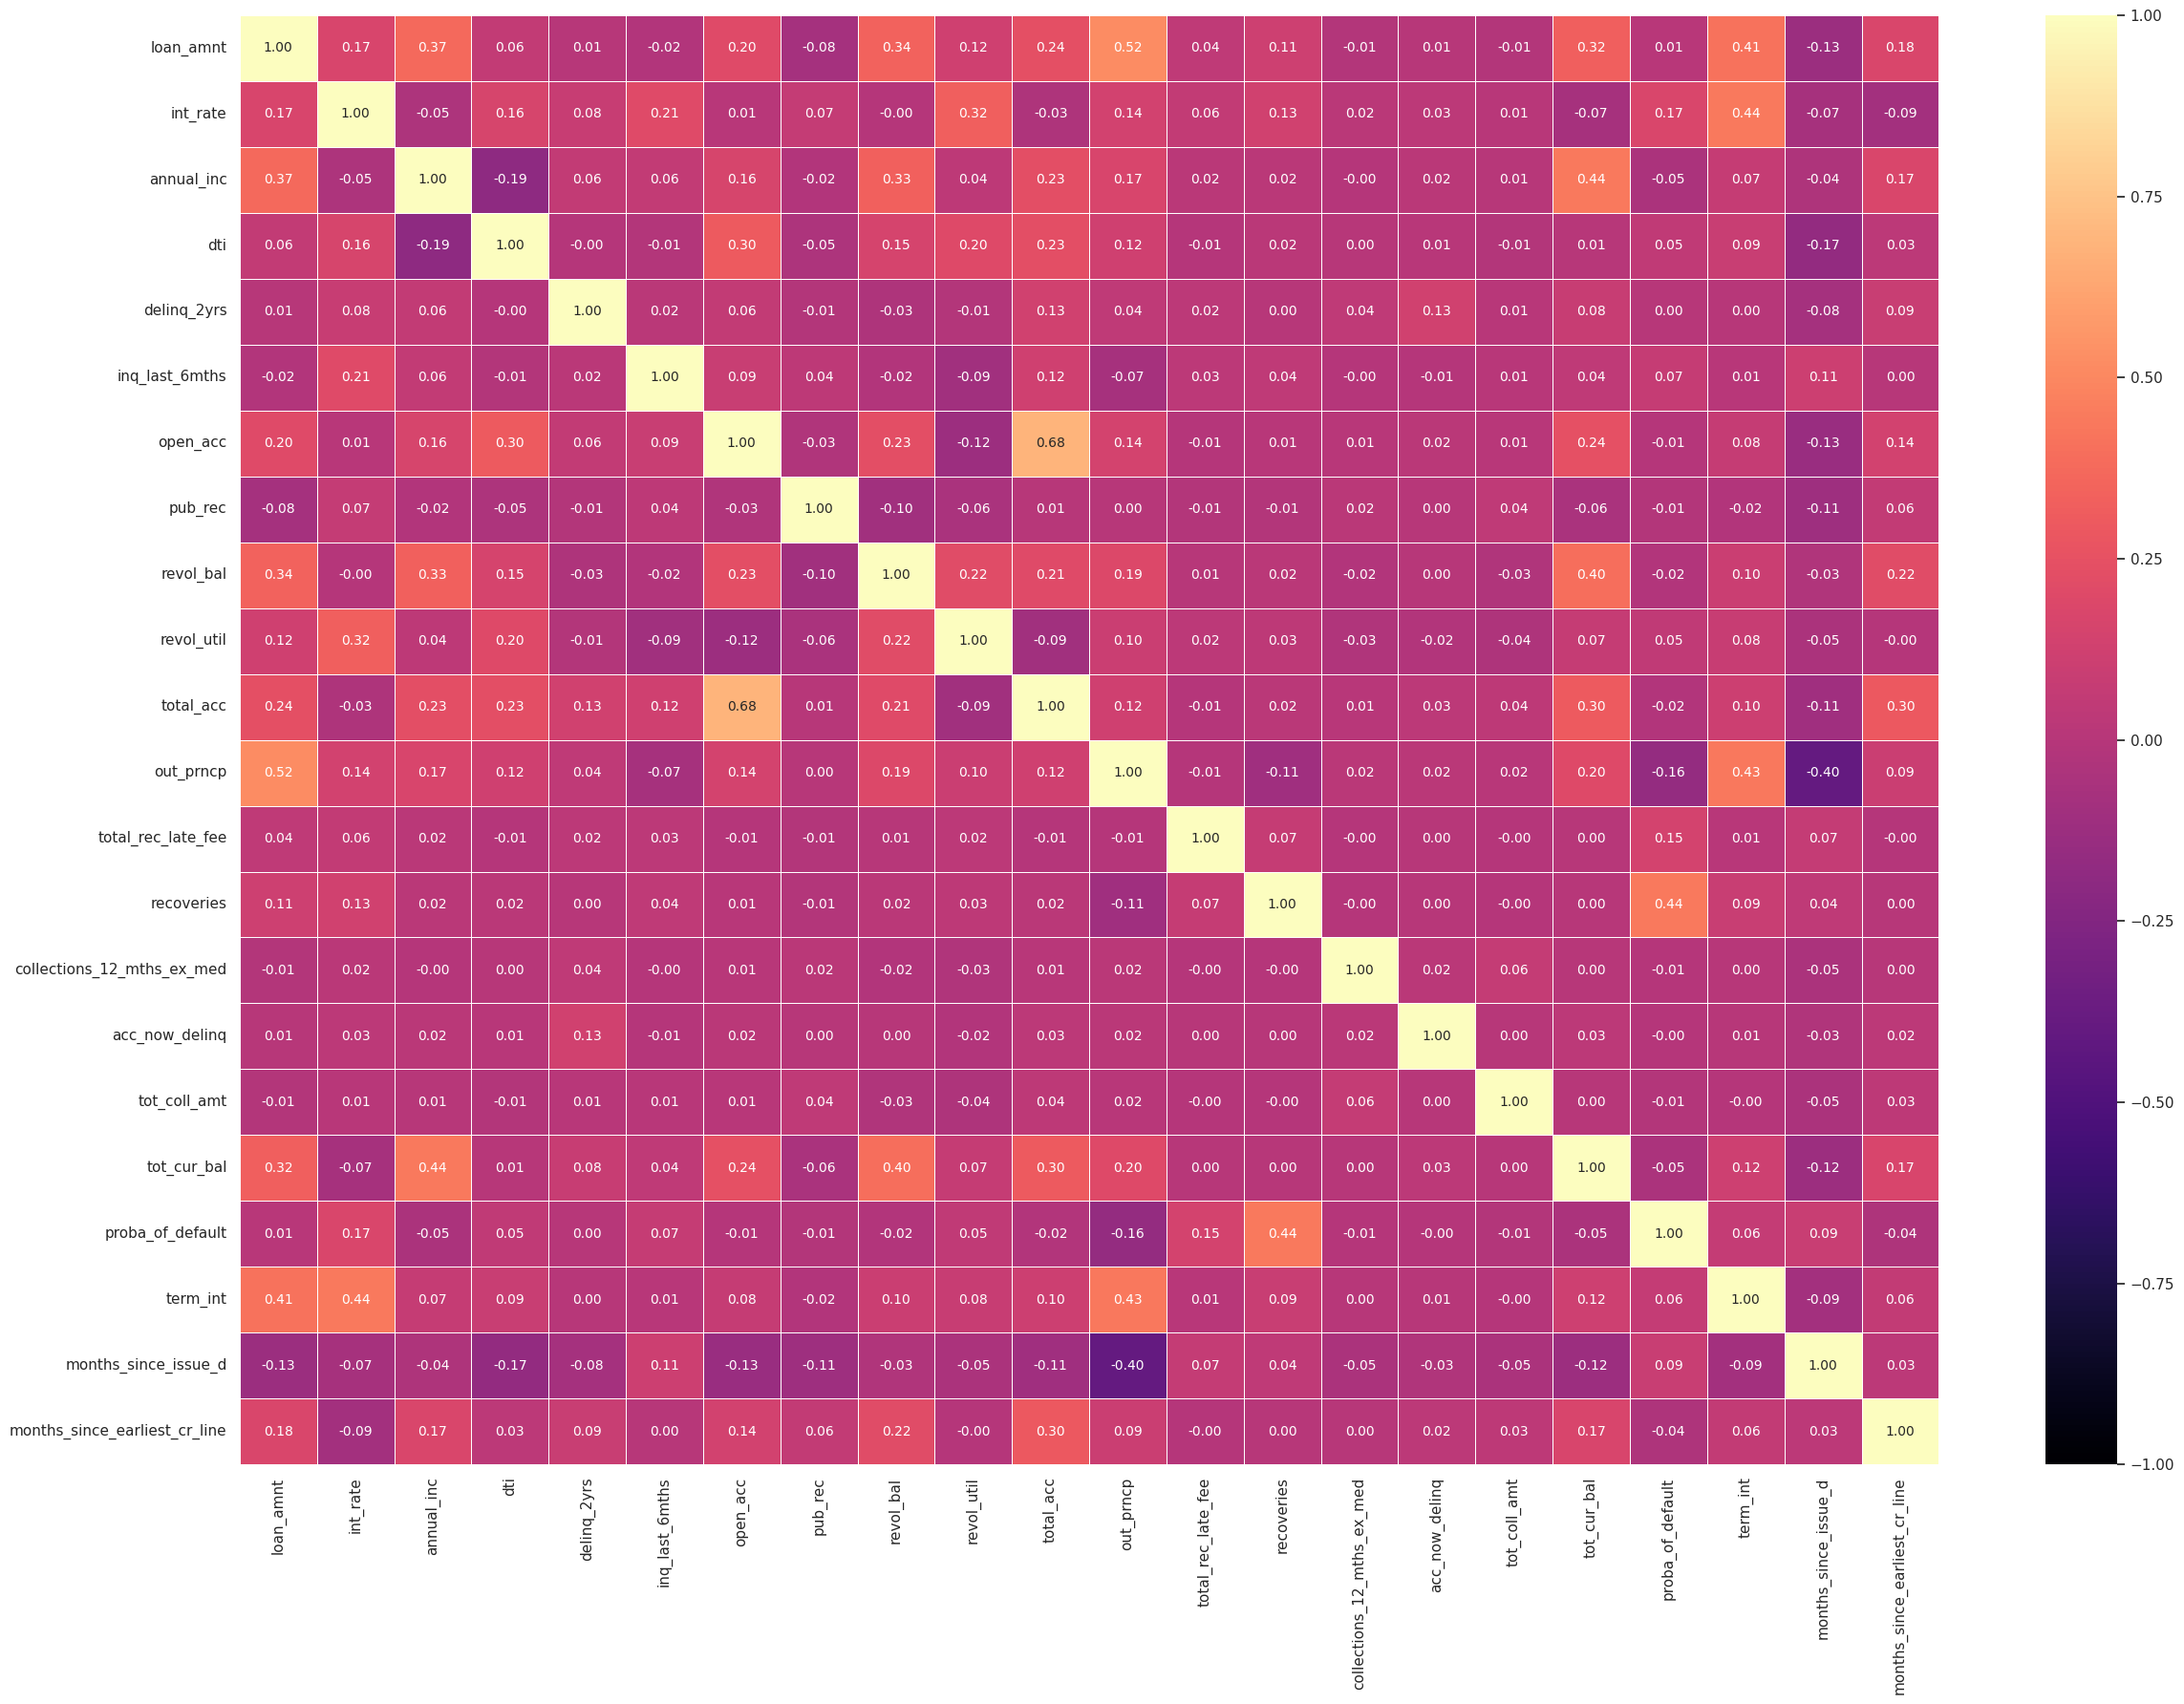

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Remove columns with zero variance
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

# 4. Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the heat map
plt.figure(figsize = (25, 18))
sns.heatmap(
 corr_matrix,
 cmap='magma',
 annot=True,
 fmt='.2f',
 annot_kws={'size': 10},
 linewidths=0.5,
 vmin=-1, vmax=1
)
plt.title('', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

# **Drop Feature**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465112 entries, 0 to 466284
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   loan_amnt                      465112 non-null  int64         
 1   int_rate                       465112 non-null  float64       
 2   grade                          465112 non-null  object        
 3   home_ownership                 465112 non-null  object        
 4   annual_inc                     465112 non-null  float64       
 5   verification_status            465112 non-null  object        
 6   loan_status                    465112 non-null  object        
 7   purpose                        465112 non-null  object        
 8   dti                            465112 non-null  float64       
 9   delinq_2yrs                    465112 non-null  float64       
 10  inq_last_6mths                 465112 non-null  float64       
 11  open_

In [ ]:
print(df.columns)

Index(['loan_amnt', 'int_rate', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'total_rec_late_fee',
       'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'proba_of_default', 'term_int',
       'date_issue_d', 'months_since_issue_d', 'earliest_cr_line_date',
       'months_since_earliest_cr_line', 'date_last_pymnt_d',
       'date_last_credit_pull_d'],
      dtype='object')


In [ ]:
df.drop([
    'months_since_earliest_cr_line',
    'open_acc', 'revol_bal', 'delinq_2yrs',
    'collections_12_mths_ex_med', 'inq_last_6mths',
    'tot_coll_amt', 'acc_now_delinq',
    'initial_list_status', 'verification_status', 'grade'
], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465112 entries, 0 to 466284
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   loan_amnt                465112 non-null  int64         
 1   int_rate                 465112 non-null  float64       
 2   home_ownership           465112 non-null  object        
 3   annual_inc               465112 non-null  float64       
 4   loan_status              465112 non-null  object        
 5   purpose                  465112 non-null  object        
 6   dti                      465112 non-null  float64       
 7   pub_rec                  465112 non-null  float64       
 8   revol_util               465112 non-null  float64       
 9   total_acc                465112 non-null  float64       
 10  out_prncp                465112 non-null  float64       
 11  total_rec_late_fee       465112 non-null  float64       
 12  recoveries           

### **Split Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

assert 'proba_of_default' in df.columns, "Kolom target tidak ditemukan"

# Split dataset
X = df.drop(columns='proba_of_default')
y = df['proba_of_default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=69,
    stratify=y
)

print(f"Data Dimension:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

Data Dimension:
X_train: (325578, 20), X_test: (139534, 20)


In [ ]:
y_test.value_counts()

proba_of_default
0    124288
1     15246
Name: count, dtype: int64

# **Encoding & Standarization**

In [ ]:
print("Memproses tipe fitur...")

categorical_features = X.select_dtypes(include=['object']).columns
print(f"Found {len(categorical_features)} categorical features")

numerical_features = X.select_dtypes(include=['int32', 'int64', 'float64']).columns
print(f"Found {len(numerical_features)} numerical features")

Memproses tipe fitur...
Found 3 categorical features
Found 13 numerical features


# **OneHot Encoding and Standard Gauge**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Konfigurasi yang kompatibel
OHE_CONFIG = {
    'handle_unknown': 'ignore',
    'drop': 'first'
}

SCALER_CONFIG = {
    'with_mean': True,
    'with_std': True
}

preprocessor = ColumnTransformer([
    ('numerical', Pipeline([
        ('scaler', StandardScaler(**SCALER_CONFIG))
    ]), numerical_features),

    ('categorical', Pipeline([
        ('onehot', OneHotEncoder(**OHE_CONFIG))
    ]), categorical_features)
])

In [ ]:
# fit and transform the train data
X_train_processed = preprocessor.fit_transform(X_train)

# transform the test data
X_test_processed = preprocessor.transform(X_test)

In [ ]:
print(preprocessor.named_transformers_.keys())

dict_keys(['numerical', 'categorical', 'remainder'])


In [ ]:
# Import library
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#1. Define the pipeline first
numerical_pipeline = Pipeline([
('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# 2. Just create a ColumnTransformer
preprocessor = ColumnTransformer([
('num_processor', numerical_pipeline, numerical_features),
('cat_processor', categorical_pipeline, categorical_features)
])

# 3. Now it can be used
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num_processor',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec', 'revol_util',
       'total_acc', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'tot_cur_bal', 'term_int', 'months_since_issue_d'],
      dtype='object')),
                                ('cat_processor',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 Index(['home_ownership', 'loan_status', 'purpose'], dtype='object'))])

In [ ]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

# 1. Define numerical_features and categorical_features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# 2. Create a pipeline for each feature type
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# 3. Create a ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

# 4. Fit and transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 5. Get feature names after preprocessing
try:
    # Check the available step names
    print("Available transformers:", preprocessor.named_transformers_.keys())

    # Get the encoder from the categorical pipeline
    categorical_pipe = preprocessor.named_transformers_['categorical']
    print("Steps in categorical pipeline:", categorical_pipe.named_steps.keys())

    # Extract the name of the encoded feature
    ohe_encoder = categorical_pipe.named_steps['onehot_encoder']
    ohe_feature_names = ohe_encoder.get_feature_names_out(categorical_features)

    # Combine with numeric features
    feature_names = list(numerical_features) + list(ohe_feature_names)

    # 6. Create a DataFrame with column names
    X_train_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
    X_test_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

    print("\nPreprocessing result DataFrame:")
    print("Training shape:", X_train_df.shape)
    print("Testing shape:", X_test_df.shape)
    print("\n5 sample training data:")
    display(X_train_df.head())

except Exception as e:
    print("\nError:", str(e))
    print("\nMake sure:")
    print("- Step names in Pipeline and ColumnTransformer are consistent")
    print("- The categorical_features column matches the input data")

Available transformers: dict_keys(['numerical', 'categorical', 'remainder'])
Steps in categorical pipeline: dict_keys(['onehot_encoder'])

Preprocessing result DataFrame:
Training shape: (325578, 26)
Testing shape: (139534, 26)

5 sample training data:


loan_amnt  int_rate  annual_inc       dti   pub_rec  revol_util  \
44272    1.290537 -1.655687    1.531682 -0.095606 -0.311686   -0.430005   
395197  -0.158298  0.339286   -0.792931  0.002462 -0.311686    0.812228   
106878   0.083174 -0.034915   -0.493075 -0.946375  1.644028    0.626946   
123357   1.894218  2.249317    0.163160 -0.248439 -0.311686   -0.211035   
466234  -0.399770 -0.225459   -0.436740 -1.296616  1.644028    0.791173   

        total_acc  out_prncp  total_rec_late_fee  recoveries  tot_cur_bal  \
44272   -0.607440   0.707530           -0.122254   -0.155692    -0.452280   
395197  -1.210394   0.836344           -0.122254   -0.155692    -0.801367   
106878  -0.865849  -0.693132           -0.122254   -0.155692     0.278394   
123357   2.579601  -0.693132           -0.122254   -0.155692     0.108415   
466234  -0.090623  -0.040241           -0.122254   -0.155692    -0.864074   

        term_int  months_since_issue_d  home_ownership_NONE  \
44272  -0.615967             -0.230166                  0.0   
395197  1.623463             -0.573844                  0.0   
106878 -0.615967              0.044776                  0.0   
123357  1.623463              0.182247                  0.0   
466234 -0.615967             -0.298902                  0.0   

        home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
44272                    0.0                 0.0                  0.0   
395197                   0.0                 0.0                  1.0   
106878                   0.0                 0.0                  0.0   
123357                   0.0                 0.0                  0.0   
466234                   0.0                 0.0                  1.0   

        loan_status_Current  loan_status_Default  \
44272                   1.0                  0.0   
395197                  1.0                  0.0   
106878                  0.0                  0.0   
123357                  0.0                  0.0   
466234                  1.0                  0.0   

        loan_status_Does not meet the credit policy. Status:Charged Off  \
44272                                                 0.0                 
395197                                                0.0                 
106878                                                0.0                 
123357                                                0.0                 
466234                                                0.0                 

        loan_status_Does not meet the credit policy. Status:Fully Paid  \
44272                                                 0.0                
395197                                                0.0                
106878                                                0.0                
123357                                                0.0                
466234                                                0.0                

        loan_status_Fully Paid  loan_status_In Grace Period  \
44272                      0.0                          0.0   
395197                     0.0                          0.0   
106878                     1.0                          0.0   
123357                     1.0                          0.0   
466234                     0.0                          0.0   

        loan_status_Late (16-30 days)  loan_status_Late (31-120 days)  \
44272                             0.0                             0.0   
395197                            0.0                             0.0   
106878                            0.0                             0.0   
123357                            0.0                             0.0   
466234                            0.0                             0.0   

        purpose_personal loan  
44272                     1.0  
395197                    1.0  
106878                    1.0  
123357                    1.0  
466234                    1.0

In [ ]:
pd.DataFrame(X_train_processed, columns=feature_names).head(3)

loan_amnt  int_rate  annual_inc       dti   pub_rec  revol_util  total_acc  \
0   1.290537 -1.655687    1.531682 -0.095606 -0.311686   -0.430005  -0.607440   
1  -0.158298  0.339286   -0.792931  0.002462 -0.311686    0.812228  -1.210394   
2   0.083174 -0.034915   -0.493075 -0.946375  1.644028    0.626946  -0.865849   

   out_prncp  total_rec_late_fee  recoveries  tot_cur_bal  term_int  \
0   0.707530           -0.122254   -0.155692    -0.452280 -0.615967   
1   0.836344           -0.122254   -0.155692    -0.801367  1.623463   
2  -0.693132           -0.122254   -0.155692     0.278394 -0.615967   

   months_since_issue_d  home_ownership_NONE  home_ownership_OTHER  \
0             -0.230166                  0.0                   0.0   
1             -0.573844                  0.0                   0.0   
2              0.044776                  0.0                   0.0   

   home_ownership_OWN  home_ownership_RENT  loan_status_Current  \
0                 0.0                  0.0                  1.0   
1                 0.0                  1.0                  1.0   
2                 0.0                  0.0                  0.0   

   loan_status_Default  \
0                  0.0   
1                  0.0   
2                  0.0   

   loan_status_Does not meet the credit policy. Status:Charged Off  \
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 

   loan_status_Does not meet the credit policy. Status:Fully Paid  \
0                                                0.0                
1                                                0.0                
2                                                0.0                

   loan_status_Fully Paid  loan_status_In Grace Period  \
0                     0.0                          0.0   
1                     0.0                          0.0   
2                     1.0                          0.0   

   loan_status_Late (16-30 days)  loan_status_Late (31-120 days)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   

   purpose_personal loan  
0                    1.0  
1                    1.0  
2                    1.0

In [ ]:
pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index).describe()

loan_amnt      int_rate    annual_inc           dti       pub_rec  \
count  3.255780e+05  3.255780e+05  3.255780e+05  3.255780e+05  3.255780e+05   
mean  -8.642320e-17 -2.782783e-16  2.046658e-16  5.601358e-16 -6.944410e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.667501e+00 -1.931172e+00 -1.374084e+00 -2.191961e+00 -3.116859e-01   
25%   -7.619792e-01 -6.524613e-01 -5.304746e-01 -7.451450e-01 -3.116859e-01   
50%   -2.790342e-01 -3.950648e-02 -1.930308e-01 -4.466171e-02 -3.116859e-01   
75%    6.868556e-01  6.101797e-01  2.943881e-01  7.093130e-01 -3.116859e-01   
max    2.497899e+00  2.807175e+00  1.382226e+02  2.901189e+00  1.228983e+02   

         revol_util     total_acc     out_prncp  total_rec_late_fee  \
count  3.255780e+05  3.255780e+05  3.255780e+05        3.255780e+05   
mean   9.279582e-17  1.091638e-16  5.752817e-17       -1.309442e-19   
std    1.000002e+00  1.000002e+00  1.000002e+00        1.000002e+00   
min   -2.367045e+00 -2.157893e+00 -6.931321e-01       -1.222541e-01   
25%   -7.163498e-01 -6.935767e-01 -6.931321e-01       -1.222541e-01   
50%    5.846652e-02 -1.767592e-01 -6.274917e-01       -1.222541e-01   
75%    7.827513e-01  5.984670e-01  4.595062e-01       -1.222541e-01   
max    3.520733e+01  1.127936e+01  4.373646e+00        6.805781e+01   

         recoveries   tot_cur_bal      term_int  months_since_issue_d  \
count  3.255780e+05  3.255780e+05  3.255780e+05          3.255780e+05   
mean   5.942686e-17  4.561224e-17  1.476724e-16         -1.597520e-16   
std    1.000002e+00  1.000002e+00  1.000002e+00          1.000002e+00   
min   -1.556922e-01 -9.259123e-01 -6.159674e-01         -1.054994e+00   
25%   -1.556922e-01 -6.865074e-01 -6.159674e-01         -7.113157e-01   
50%   -1.556922e-01 -3.459745e-01 -6.159674e-01         -2.989019e-01   
75%   -1.556922e-01  3.905282e-01  1.623463e+00          3.884543e-01   
max    6.117740e+01  2.607388e+01  1.623463e+00          5.199948e+00   

       home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
count        325578.000000         325578.000000       325578.000000   
mean              0.000129              0.000366            0.088842   
std               0.011357              0.019115            0.284516   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

       home_ownership_RENT  loan_status_Current  loan_status_Default  \
count        325578.000000        325578.000000        325578.000000   
mean              0.405159             0.480361             0.001794   
std               0.490924             0.499615             0.042315   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               1.000000             1.000000             0.000000   
max               1.000000             1.000000             1.000000   

       loan_status_Does not meet the credit policy. Status:Charged Off  \
count                                      325578.000000                 
mean                                            0.001686                 
std                                             0.041029                 
min                                             0.000000                 
25%                                             0.000000                 
50%                                             0.000000                 
75%                                             0.000000                 
max                                             1.000000                 

       loan_status_Does not meet th

In [ ]:
pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index).head(3)

loan_amnt  int_rate  annual_inc       dti   pub_rec  revol_util  \
2456     1.652745 -1.361836    0.706819 -0.108342 -0.311686   -1.099547   
417696   0.686856 -0.652461    0.538098  0.278834  1.644028    0.104787   
330138  -1.012507  0.265823   -0.879167  0.655822  1.644028   -0.724772   

        total_acc  out_prncp  total_rec_late_fee  recoveries  tot_cur_bal  \
2456     0.943012  -0.693132           -0.122254   -0.155692    -0.345975   
417696   1.632102   0.746306           -0.122254   -0.155692     0.440536   
330138  -1.124258  -0.148931           -0.122254   -0.155692    -0.880628   

        term_int  months_since_issue_d  home_ownership_NONE  \
2456   -0.615967              1.488224                  0.0   
417696 -0.615967             -0.505109                  0.0   
330138 -0.615967             -0.780051                  0.0   

        home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
2456                     0.0                 0.0                  1.0   
417696                   0.0                 0.0                  0.0   
330138                   0.0                 0.0                  1.0   

        loan_status_Current  loan_status_Default  \
2456                    0.0                  0.0   
417696                  1.0                  0.0   
330138                  1.0                  0.0   

        loan_status_Does not meet the credit policy. Status:Charged Off  \
2456                                                  0.0                 
417696                                                0.0                 
330138                                                0.0                 

        loan_status_Does not meet the credit policy. Status:Fully Paid  \
2456                                                  0.0                
417696                                                0.0                
330138                                                0.0                

        loan_status_Fully Paid  loan_status_In Grace Period  \
2456                       1.0                          0.0   
417696                     0.0                          0.0   
330138                     0.0                          0.0   

        loan_status_Late (16-30 days)  loan_status_Late (31-120 days)  \
2456                              0.0                             0.0   
417696                            0.0                             0.0   
330138                            0.0                             0.0   

        purpose_personal loan  
2456                      1.0  
417696                    1.0  
330138                    1.0

In [ ]:
pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index).describe()

loan_amnt       int_rate     annual_inc            dti  \
count  139534.000000  139534.000000  139534.000000  139534.000000   
mean        0.001764      -0.000558      -0.003024       0.003169   
std         1.000939       1.001478       1.066195       0.999442   
min        -1.667501      -1.931172      -1.308470      -2.191961   
25%        -0.761979      -0.652461      -0.530475      -0.743871   
50%        -0.279034      -0.039506      -0.202404      -0.039567   
75%         0.686856       0.610180       0.283140       0.709313   
max         2.497899       2.807175     139.227516       2.901189   

             pub_rec     revol_util      total_acc      out_prncp  \
count  139534.000000  139534.000000  139534.000000  139534.000000   
mean        0.004768      -0.003151       0.000857       0.004666   
std         0.986139       0.996406       0.997528       1.003532   
min        -0.311686      -2.367045      -2.157893      -0.693132   
25%        -0.311686      -0.712139      -0.693577      -0.693132   
50%        -0.311686       0.050045      -0.176759      -0.618274   
75%        -0.311686       0.774329       0.598467       0.470718   
max        77.916869       5.225312       8.092320       4.332430   

       total_rec_late_fee     recoveries    tot_cur_bal       term_int  \
count       139534.000000  139534.000000  139534.000000  139534.000000   
mean             0.004057       0.001427      -0.002176       0.001563   
std              0.998986       1.033207       1.006534       1.000790   
min             -0.122254      -0.155692      -0.925912      -0.615967   
25%             -0.122254      -0.155692      -0.687311      -0.615967   
50%             -0.122254      -0.155692      -0.345975      -0.615967   
75%             -0.122254      -0.155692       0.385257       1.623463   
max             43.550017      58.213691      33.012525       1.623463   

       months_since_issue_d  home_ownership_NONE  home_ownership_OTHER  \
count         139534.000000        139534.000000         139534.000000   
mean              -0.004813             0.000057              0.000452   
std                0.995540             0.007572              0.021244   
min               -1.054994             0.000000              0.000000   
25%               -0.711316             0.000000              0.000000   
50%               -0.298902             0.000000              0.000000   
75%                0.388454             0.000000              0.000000   
max                5.199948             1.000000              1.000000   

       home_ownership_OWN  home_ownership_RENT  loan_status_Current  \
count       139534.000000        139534.000000        139534.000000   
mean             0.090250             0.403085             0.481460   
std              0.286541             0.490519             0.499658   
min              0.000000             0.000000             0.000000   
25%              0.000000             0.000000             0.000000   
50%              0.000000             0.000000             0.000000   
75%              0.000000             1.000000             1.000000   
max              1.000000             1.000000             1.000000   

       loan_status_Default  \
count        139534.000000   
mean              0.001749   
std               0.041781   
min               0.000000   
25%               0.000000   
50%               0.000000   
75%               0.000000   
max               1.000000   

       loan_status_Does not meet the credit policy. Status:Charged Off  \
count                                      139534.000000                 
mean                                            0.001512                 
std                                             0.038857                 
min                                             0.000000                 
25%                                             0.000000                 
50%                                             0.000000                 
75% 

In [ ]:
print(f"Train: {X_train_processed.shape[0]} row, {X_train_processed.shape[1]} column")
print(f"Test : {X_test_processed.shape[0]} row, {X_test_processed.shape[1]} column")

Train: 325578 row, 26 column
Test : 139534 row, 26 column


# **Undersampling**

I use RandomUnderSampler because my laptop specifications do not support running other under sampling methods such as Tomek Links or ENN, or oversampling techniques, considering that this credit risk dataset has a very large amount of data.

In [ ]:
print(y_train.value_counts())

proba_of_default
0    290004
1     35574
Name: count, dtype: int64


In [ ]:
# Display the class distribution after undersampling
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler with random_state for reproducibility
rus = RandomUnderSampler(random_state=69)

# Undersample the training data
X_undersampled, y_undersampled = rus.fit_resample(X_train_processed, y_train)

# Calculate and print the number of samples per class after undersampling
print(y_undersampled.value_counts())

proba_of_default
0    35574
1    35574
Name: count, dtype: int64


In [ ]:
X_undersampled_df = pd.DataFrame(X_undersampled, columns=feature_names)
X_undersampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71148 entries, 0 to 71147
Data columns (total 26 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   loan_amnt                                                        71148 non-null  float64
 1   int_rate                                                         71148 non-null  float64
 2   annual_inc                                                       71148 non-null  float64
 3   dti                                                              71148 non-null  float64
 4   pub_rec                                                          71148 non-null  float64
 5   revol_util                                                       71148 non-null  float64
 6   total_acc                                                        71148 non-null  float64
 7   out_prncp                               

# **Modelling**

### **Function**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, confusion_matrix

def evaluate_model(model):
    # Get predictions for test data and training data
    test_pred = model.predict(X_test_processed)
    train_pred = model.predict(X_undersampled)

    # Get prediction probabilities
    test_proba = model.predict_proba(X_test_processed)
    train_proba = model.predict_proba(X_undersampled)

    # Evaluate model performance with undersampling
    print('\n=== MODEL EVALUATION WITH UNDERSAMPLING ===')
    print('\nAUC Score Comparison:')
    print(f'AUC Score Training: {roc_auc_score(y_undersampled, train_proba[:,1]):.6f}')
    print(f'AUC Score Testing: {roc_auc_score(y_test, test_proba[:,1]):.6f}\n')

    # Display other evaluation metrics
    print('Other Evaluation Metrics:')
    print(f'Testing Accuracy : {accuracy_score(y_test, test_pred):.4f}')
    print(f'Precision Testing : {precision_score(y_test, test_pred):.4f}')
    print(f'Recall Testing : {recall_score(y_test, test_pred):.4f}')
    print(f'F1-Score Testing: {f1_score(y_test, test_pred):.4f}\n')

    # Display confusion matrix
    print('=== CONFUSION MATRIX ===')
    print(confusion_matrix(y_test, test_pred))

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression model on undersampled data
logreg_model = LogisticRegression()
logreg_model.fit(X_undersampled, y_undersampled)

LogisticRegression()

In [ ]:
# Evaluate the trained logistic regression model's performance
evaluate_model(logreg_model)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Score Comparison:
AUC Score Training: 1.000000
AUC Score Testing: 1.000000

Other Evaluation Metrics:
Testing Accuracy : 1.0000
Precision Testing : 1.0000
Recall Testing : 1.0000
F1-Score Testing: 1.0000

=== CONFUSION MATRIX ===
[[124288      0]
 [     0  15246]]


### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model with random states for reproducibility
decision_tree = DecisionTreeClassifier(random_state=69)

# Train the model using undersampled data
decision_tree.fit(X_undersampled, y_undersampled)

DecisionTreeClassifier(random_state=69)

In [ ]:
evaluate_model(decision_tree)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Score Comparison:
AUC Score Training: 1.000000
AUC Score Testing: 1.000000

Other Evaluation Metrics:
Testing Accuracy : 1.0000
Precision Testing : 1.0000
Recall Testing : 1.0000
F1-Score Testing: 1.0000

=== CONFUSION MATRIX ===
[[124288      0]
 [     0  15246]]


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=69)

rf_model.fit(X_undersampled, y_undersampled)

RandomForestClassifier(random_state=69)

In [ ]:
evaluate_model(rf_model)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Score Comparison:
AUC Score Training: 1.000000
AUC Score Testing: 1.000000

Other Evaluation Metrics:
Testing Accuracy : 1.0000
Precision Testing : 0.9998
Recall Testing : 1.0000
F1-Score Testing: 0.9999

=== CONFUSION MATRIX ===
[[124285      3]
 [     0  15246]]


### **Adaptive Boosting (Adaboost)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=69)
adaboost_model.fit(X_undersampled, y_undersampled)

AdaBoostClassifier(random_state=69)

In [ ]:
evaluate_model(adaboost_model)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Score Comparison:
AUC Score Training: 1.000000
AUC Score Testing: 0.999997

Other Evaluation Metrics:
Testing Accuracy : 1.0000
Precision Testing : 0.9998
Recall Testing : 1.0000
F1-Score Testing: 0.9999

=== CONFUSION MATRIX ===
[[124285      3]
 [     0  15246]]


### **XGBoost**

In [ ]:
from xgboost import XGBClassifier  # Import library

xgb_model = XGBClassifier(random_state=69)
xgb_model.fit(X_undersampled, y_undersampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=69, ...)

In [ ]:
evaluate_model(xgb_model)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Score Comparison:
AUC Score Training: 1.000000
AUC Score Testing: 1.000000

Other Evaluation Metrics:
Testing Accuracy : 1.0000
Precision Testing : 1.0000
Recall Testing : 1.0000
F1-Score Testing: 1.0000

=== CONFUSION MATRIX ===
[[124288      0]
 [     0  15246]]


### **Light Gradient Boosting Machine (LGBM)**




In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=69)
lgbm_model.fit(X_undersampled, y_undersampled)

[LightGBM] [Info] Number of positive: 35574, number of negative: 35574
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2476
[LightGBM] [Info] Number of data points in the train set: 71148, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

LGBMClassifier(random_state=69)

In [ ]:
evaluate_model(lgbm_model)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Score Comparison:
AUC Score Training: 1.000000
AUC Score Testing: 1.000000

Other Evaluation Metrics:
Testing Accuracy : 1.0000
Precision Testing : 1.0000
Recall Testing : 1.0000
F1-Score Testing: 1.0000

=== CONFUSION MATRIX ===
[[124288      0]
 [     0  15246]]


Based on the results of the model that has been used, it can be summarized:
1. The model produces excellent `precision` values (≥ 0.9). All positive predictions (**positive predictions**) made by the model are completely valid (**true positives**). There are no false positives.

2. The `accuracy, precision, recall, and F1-score` values all reached 1.0000, meaning:
The model is perfect in predicting the testing data-no misclassification (all predictions are correct, both for positive and negative classes).

# **Hyperparameter Tuning**

In [ ]:
def evaluate_tuned_model(model):

    # Generate predictions and probabilities
    test_predictions = model.predict(X_test_processed)
    train_predictions = model.predict(X_undersampled)
    test_probabilities = model.predict_proba(X_test_processed)
    train_probabilities = model.predict_proba(X_undersampled)

    # Calculate evaluation metrics
    train_auc = roc_auc_score(y_undersampled, train_probabilities[:, 1])
    test_auc = roc_auc_score(y_test, test_probabilities[:, 1])

    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions)
    test_recall = recall_score(y_test, test_predictions)
    test_f1 = f1_score(y_test, test_predictions)

    # Display evaluation results
    print('\n=== MODEL EVALUATION WITH UNDERSAMPLING ===')
    print('\nAUC Scores:')
    print(f'Training AUC: {round(train_auc, 6)}')
    print(f'Test AUC: {round(test_auc, 6)}\n')

    print('Classification Metrics:')
    print(f'Test Accuracy: {round(test_accuracy, 4)}')
    print(f'Test Precision: {round(test_precision, 4)}')
    print(f'Test Recall: {round(test_recall, 4)}')
    print(f'Test F1-Score: {round(test_f1, 4)}\n')

    print('=== CONFUSION MATRIX ===')
    print(confusion_matrix(y_test, test_predictions))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### **Logistic Regression**

In [ ]:
# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Define hyperparameter search space
logistic_hyperparams = {
    "penalty": ['l1', 'l2'],  # Regularization type (L1/Lasso or L2/Ridge)
    "C": [float(x) for x in np.linspace(0.001, 10, 100)]  # Inverse of regularization strength (100 values between 0.001 and 10)
}

# Set up randomized search with cross-validation
tuned_logistic = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=logistic_hyperparams,
    cv=5,  # 5-fold cross-validation
    random_state=69,  # For reproducibility
    n_jobs=-1,  # Use all available CPU cores
    scoring='recall',  # Optimize for recall metric
    n_iter=50  # Number of parameter combinations to try (added for better practice)
)

# Perform hyperparameter tuning on undersampled data
tuned_logistic.fit(X_undersampled, y_undersampled)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.10200000000000001, 0.203,
                                              0.30400000000000005, 0.405, 0.506,
                                              0.6070000000000001,
                                              0.7080000000000001, 0.809, 0.91,
                                              1.011, 1.1119999999999999, 1.213,
                                              1.314, 1.415, 1.516, 1.617, 1.718,
                                              1.819, 1.92, 2.021, 2.122, 2.223,
                                              2.324, 2.4250000000000003,
                                              2.5260000000000002,
                                              2.6270000000000002, 2.728, 2.829,
                                              2.93, ...],
                                        'penalty': ['l1', 'l2']},
                   random_state=69, scoring='recall')

In [ ]:
print(f'Optimal parameters found: {tuned_logistic.best_params_}')

Optimal parameters found: {'penalty': 'l2', 'C': 2.324}


In [ ]:
evaluate_tuned_model(tuned_logistic)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Scores:
Training AUC: 1.0
Test AUC: 1.0

Classification Metrics:
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1-Score: 1.0

=== CONFUSION MATRIX ===
[[124288      0]
 [     0  15246]]


### **Decision Tree**

In [ ]:
# Initialize the basic Decision Tree model
decision_tree = DecisionTreeClassifier()

# Setting up hyperparameter distribution for tuning
tree_hyperparams = {
 "criterion": ['gini', 'entropy'], # Split quality measurement method
 "max_depth": [5, 14, 24], # Maximum depth of the tree
 "min_samples_split": [2, 10, 100], # Minimum number of samples for split node
 "min_samples_leaf": [2, 10, 100], # Minimum number of samples at leaf nodes
 "max_features": ['auto', 'sqrt'] # Number of features considered for split
}

# Setup Randomized Search with Cross-Validation
optimized_tree = RandomizedSearchCV(
 estimator=decision_tree,
 param_distributions=tree_hyperparams,
 cv=5, # 5-fold cross validation
 random_state=69, # For reproducibility
 n_jobs=-1, # Using all CPU cores
 scoring='recall', # Focus optimization on recall
 n_iter=50 # Number of parameter combinations to try
)

# Tuning the undersampled data
optimized_tree.fit(X_undersampled, y_undersampled)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 14, 24],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 10, 100],
                                        'min_samples_split': [2, 10, 100]},
                   random_state=69, scoring='recall')

In [ ]:
print(f'Optimal Decision Tree parameters: {optimized_tree.best_params_}')

Optimal Decision Tree parameters: {'min_samples_split': 100, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 24, 'criterion': 'entropy'}


In [ ]:
evaluate_tuned_model(optimized_tree)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Scores:
Training AUC: 0.999541
Test AUC: 0.999094

Classification Metrics:
Test Accuracy: 0.9889
Test Precision: 0.9252
Test Recall: 0.9776
Test F1-Score: 0.9507

=== CONFUSION MATRIX ===
[[123083   1205]
 [   342  14904]]


### **Random Forest**

In [ ]:
# Initialize base Random Forest model
random_forest = RandomForestClassifier()

# Define hyperparameter search space
rf_hyperparams = {
    "n_estimators": [5, 10, 20, 30],       # Number of trees in the forest
    "criterion": ['gini', 'entropy'],      # Splitting criterion
    "max_depth": [5, 10, 15],              # Maximum tree depth
    "min_samples_split": [5, 10, 20],      # Minimum samples required to split a node
    "min_samples_leaf": [5, 10, 20],       # Minimum samples required at a leaf node
    "max_features": ['auto', 'sqrt']       # Number of features to consider for splits
}

# Configure randomized search with cross-validation
optimized_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=rf_hyperparams,
    cv=5,                   # 5-fold cross-validation
    random_state=69,        # For reproducibility
    n_jobs=-1,              # Utilize all available CPU cores
    scoring='recall',       # Optimize for recall metric
    n_iter=50               # Number of parameter combinations to sample
)

# Perform hyperparameter tuning on undersampled data
optimized_rf.fit(X_undersampled, y_undersampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [5, 10, 20, 30]},
                   random_state=69, scoring='recall')

In [ ]:
print(f'Random Forest Optimal Hyperparameter Combination: {optimized_rf.best_params_}')

Random Forest Optimal Hyperparameter Combination: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}


In [ ]:
evaluate_tuned_model(optimized_rf)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Scores:
Training AUC: 0.999992
Test AUC: 0.999934

Classification Metrics:
Test Accuracy: 0.9956
Test Precision: 0.9611
Test Recall: 1.0
Test F1-Score: 0.9802

=== CONFUSION MATRIX ===
[[123671    617]
 [     0  15246]]


### **Adaboost**

In [ ]:
%%time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

adaboost_model = AdaBoostClassifier()

adaboost_params = {
    "n_estimators": [75, 80],
    "learning_rate": [0.5, 0.7],
    "algorithm": ['SAMME']  # Parameter yang benar
}

tuned_adaboost_model = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=adaboost_params,
    cv=5,
    random_state=69,
    n_jobs=-1,
    scoring='recall',
    n_iter=10
)

tuned_adaboost_model.fit(X_undersampled, y_undersampled)

CPU times: user 45.8 s, sys: 488 ms, total: 46.3 s
Wall time: 2min 9s


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME'],
                                        'learning_rate': [0.5, 0.7],
                                        'n_estimators': [75, 80]},
                   random_state=69, scoring='recall')

In [ ]:
print(f'Optimal parameters found: {tuned_adaboost_model.best_params_}')

Optimal parameters found: {'n_estimators': 75, 'learning_rate': 0.5, 'algorithm': 'SAMME'}


In [ ]:
evaluate_tuned_model(tuned_adaboost_model)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Scores:
Training AUC: 0.999894
Test AUC: 0.999898

Classification Metrics:
Test Accuracy: 0.9863
Test Precision: 0.8885
Test Recall: 1.0
Test F1-Score: 0.941

=== CONFUSION MATRIX ===
[[122375   1913]
 [     0  15246]]


### **XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 1. Pertama, definisikan parameter space untuk random search
xgb_params = {
    'max_depth': np.arange(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5]
}

# 2. Konfigurasi model dasar dengan early stopping
xgb_model = XGBClassifier(
    n_estimators=190,
    early_stopping_rounds=10,
    eval_metric='auc',
    random_state=42
)

# 3. Setup RandomizedSearchCV
optimized_xgb = tuned_xgboost = RandomizedSearchCV( # Assign the result to both variables
    estimator=xgb_model,
    param_distributions=xgb_params,  # Sekarang xgb_params sudah terdefinisi
    cv=5,
    random_state=69,
    n_jobs=-1,
    scoring='recall',
    n_iter=20
)

# 4. Fitting model
optimized_xgb.fit(
    X_undersampled,
    y_undersampled,
    eval_set=[(X_test_processed, y_test)],
    verbose=1
)

[0]	validation_0-auc:0.92457
[1]	validation_0-auc:0.99920
[2]	validation_0-auc:0.99998
[3]	validation_0-auc:1.00000
[4]	validation_0-auc:1.00000
[5]	validation_0-auc:1.00000
[6]	validation_0-auc:1.00000
[7]	validation_0-auc:1.00000
[8]	validation_0-auc:1.00000
[9]	validation_0-auc:1.00000
[10]	validation_0-auc:1.00000
[11]	validation_0-auc:1.00000
[12]	validation_0-auc:1.00000
[13]	validation_0-auc:1.00000
[14]	validation_0-auc:1.00000
[15]	validation_0-auc:1.00000


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=10,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=...
                                           n_estimators=190, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': [1, 3, 5],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=69, scoring='recall')

In [ ]:
print(f'Optimal parameters found: {optimized_xgb.best_params_}')

Optimal parameters found: {'subsample': 0.7, 'min_child_weight': 3, 'max_depth': np.int64(4), 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.8}


In [ ]:
evaluate_tuned_model(optimized_xgb)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Scores:
Training AUC: 0.999997
Test AUC: 0.999999

Classification Metrics:
Test Accuracy: 0.9975
Test Precision: 0.9777
Test Recall: 1.0
Test F1-Score: 0.9887

=== CONFUSION MATRIX ===
[[123941    347]
 [     0  15246]]


### **Light Gradient Boosting Machine (LGBM)**

In [ ]:
from lightgbm import early_stopping
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()

lgbm_params = {
    'max_depth': [4, 5],
    'min_child_samples': [20, 25],
    'learning_rate': [0.8, 0.9],
    'num_leaves': [15, 17],
    'subsample': [0.3, 0.4],
    'colsample_bytree': [0.8, 0.85],
    'reg_alpha': [0.15, 0.19],
    'reg_lambda': [0.1, 0.8]
}

optimized_lgbm = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=lgbm_params,
    cv=5,
    random_state=69,
    n_jobs=-1,
    scoring='recall',
    n_iter=50,
    verbose=1
)

# Fit dengan early stopping melalui callbacks
optimized_lgbm.fit(
    X_undersampled,
    y_undersampled,
    eval_set=[(X_test_processed, y_test)],
    callbacks=[early_stopping(stopping_rounds=10)],
)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 35574, number of negative: 35574
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2476
[LightGBM] [Info] Number of data points in the train set: 71148, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.85],
                                        'learning_rate': [0.8, 0.9],
                                        'max_depth': [4, 5],
                                        'min_child_samples': [20, 25],
                                        'num_leaves': [15, 17],
                                        'reg_alpha': [0.15, 0.19],
                                        'reg_lambda': [0.1, 0.8],
                                        'subsample': [0.3, 0.4]},
                   random_state=69, scoring='recall', verbose=1)

In [ ]:
print(f'Optimal parameters found: {optimized_lgbm.best_params_}')

Optimal parameters found: {'subsample': 0.4, 'reg_lambda': 0.8, 'reg_alpha': 0.19, 'num_leaves': 17, 'min_child_samples': 25, 'max_depth': 4, 'learning_rate': 0.8, 'colsample_bytree': 0.85}


In [ ]:
evaluate_tuned_model(optimized_lgbm)


=== MODEL EVALUATION WITH UNDERSAMPLING ===

AUC Scores:
Training AUC: 1.0
Test AUC: 1.0

Classification Metrics:
Test Accuracy: 1.0
Test Precision: 0.9998
Test Recall: 1.0
Test F1-Score: 0.9999

=== CONFUSION MATRIX ===
[[124285      3]
 [     0  15246]]


# **Models Evaluation**

In [ ]:
# Generate confusion matrices for all tuned models
logreg_conf_matrix = confusion_matrix(y_test, tuned_logistic.predict(X_test_processed))
dtree_conf_matrix = confusion_matrix(y_test, optimized_tree.predict(X_test_processed))
rf_conf_matrix = confusion_matrix(y_test, optimized_rf.predict(X_test_processed))
adaboost_conf_matrix = confusion_matrix(y_test, tuned_adaboost_model.predict(X_test_processed))
xgb_conf_matrix = confusion_matrix(y_test, optimized_xgb.predict(X_test_processed))
lgbm_conf_matrix = confusion_matrix(y_test, optimized_lgbm.predict(X_test_processed))

In [ ]:
def create_metrics_dataframe(model_name: str, confusion_matrix: np.ndarray) -> pd.DataFrame:
    """
    Convert a confusion matrix into a DataFrame of performance metrics.

    Args:
        model_name (str): Name of the model for column title
        confusion_matrix (np.ndarray): 2x2 confusion matrix

    Returns:
        pd.DataFrame: DataFrame containing calculated metrics
    """
    # Extract confusion matrix components
    true_neg, false_pos, false_neg, true_pos = confusion_matrix.ravel()

    # Calculate metrics
    accuracy = round((true_pos + true_neg) / (true_neg + true_pos + false_neg + false_pos), 4)
    recall = round(true_pos / (false_neg + true_pos), 4)  # Also known as sensitivity
    precision = round(true_pos / (true_pos + false_pos), 4)
    f1_score = round(2 * (1/((1/precision) + (1/recall))), 4)

    # Create formatted DataFrame
    metrics_df = pd.DataFrame(
        data=[f1_score, accuracy, recall, precision],
        columns=[model_name],
        index=["F1 Score", "Accuracy", "Recall (Sensitivity)", "Precision"]
    )

    return metrics_df

# Create metrics DataFrames for all models
logreg_metrics = create_metrics_dataframe('Optimized Logistic Regression', logreg_conf_matrix)
dtree_metrics = create_metrics_dataframe('Optimized Decision Tree', dtree_conf_matrix)
rf_metrics = create_metrics_dataframe('Optimized Random Forest', rf_conf_matrix)
adaboost_metrics = create_metrics_dataframe('Optimized AdaBoost', adaboost_conf_matrix)
xgb_metrics = create_metrics_dataframe('Optimized XGBoost', xgb_conf_matrix)
lgbm_metrics = create_metrics_dataframe('Optimized LightGBM', lgbm_conf_matrix)

In [ ]:
def create_auc_dataframe(model, model_name: str, X_train, y_train, X_test, y_test) -> pd.DataFrame:
    """
    Create a DataFrame of AUC scores for train and test sets

    Args:
        model: Trained model with predict_proba() method
        model_name (str): Name of the model for display
        X_train: Training features
        y_train: Training labels
        X_test: Test features
        y_test: Test labels

    Returns:
        pd.DataFrame: DataFrame with train and test AUC scores
    """
    train_auc = round(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]), 5)
    test_auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]), 5)

    return pd.DataFrame(
        data=[train_auc, test_auc],
        columns=[model_name],
        index=['AUC-Proba Train', 'AUC-Proba Test']
    )

# Create AUC DataFrames for all models
auc_logreg = create_auc_dataframe(tuned_logistic, 'Optimized Logistic Regression',
                                 X_undersampled, y_undersampled,
                                 X_test_processed, y_test)

auc_dtree = create_auc_dataframe(optimized_tree, 'Optimized Decision Tree',
                               X_undersampled, y_undersampled,
                               X_test_processed, y_test)

auc_rf = create_auc_dataframe(optimized_rf, 'Optimized Random Forest',
                            X_undersampled, y_undersampled,
                            X_test_processed, y_test)

auc_adaboost = create_auc_dataframe(tuned_adaboost_model, 'Optimized AdaBoost',
                                  X_undersampled, y_undersampled,
                                  X_test_processed, y_test)

auc_xgb = create_auc_dataframe(optimized_xgb, 'Optimized XGBoost',
                             X_undersampled, y_undersampled,
                             X_test_processed, y_test)

auc_lgbm = create_auc_dataframe( optimized_lgbm, 'Optimized LightGBM',
                              X_undersampled, y_undersampled,
                              X_test_processed, y_test)

In [ ]:
# Combine AUC metrics with classification metrics for each model
final_logreg_metrics = pd.concat([auc_logreg, logreg_metrics])
final_dtree_metrics = pd.concat([auc_dtree, dtree_metrics])
final_rf_metrics = pd.concat([auc_rf, rf_metrics])
final_adaboost_metrics = pd.concat([auc_adaboost, adaboost_metrics])
final_xgb_metrics = pd.concat([auc_xgb, xgb_metrics])
final_lgbm_metrics = pd.concat([auc_lgbm, lgbm_metrics])

In [ ]:
# Define the desired metric order for consistent presentation
METRIC_ORDER = [
    "AUC-Proba Train",
    "AUC-Proba Test",
    "Recall",
    "Precision",
    "F1 Score",
    "Accuracy"
]

# Reindex all model DataFrames to maintain consistent metric ordering
final_logreg_metrics = final_logreg_metrics.reindex(METRIC_ORDER)
final_dtree_metrics = final_dtree_metrics.reindex(METRIC_ORDER)
final_rf_metrics = final_rf_metrics.reindex(METRIC_ORDER)
final_adaboost_metrics = final_adaboost_metrics.reindex(METRIC_ORDER)
final_xgb_metrics = final_xgb_metrics.reindex(METRIC_ORDER)
final_lgbm_metrics = final_lgbm_metrics.reindex(METRIC_ORDER)

In [ ]:
class VisualizationColors:
    """
    Color scheme for data visualization
    HEX codes for consistent styling
    """
    BACKGROUND_LIGHT = "#fafafa"   # Very light gray (background)
    PRIMARY_TEAL = "#0d5388"       # Dark teal (primary elements)
    HIGHLIGHT_ORANGE = "#fc9f3c"   # Warm orange (accent/callouts)

### **Comparison Plot**

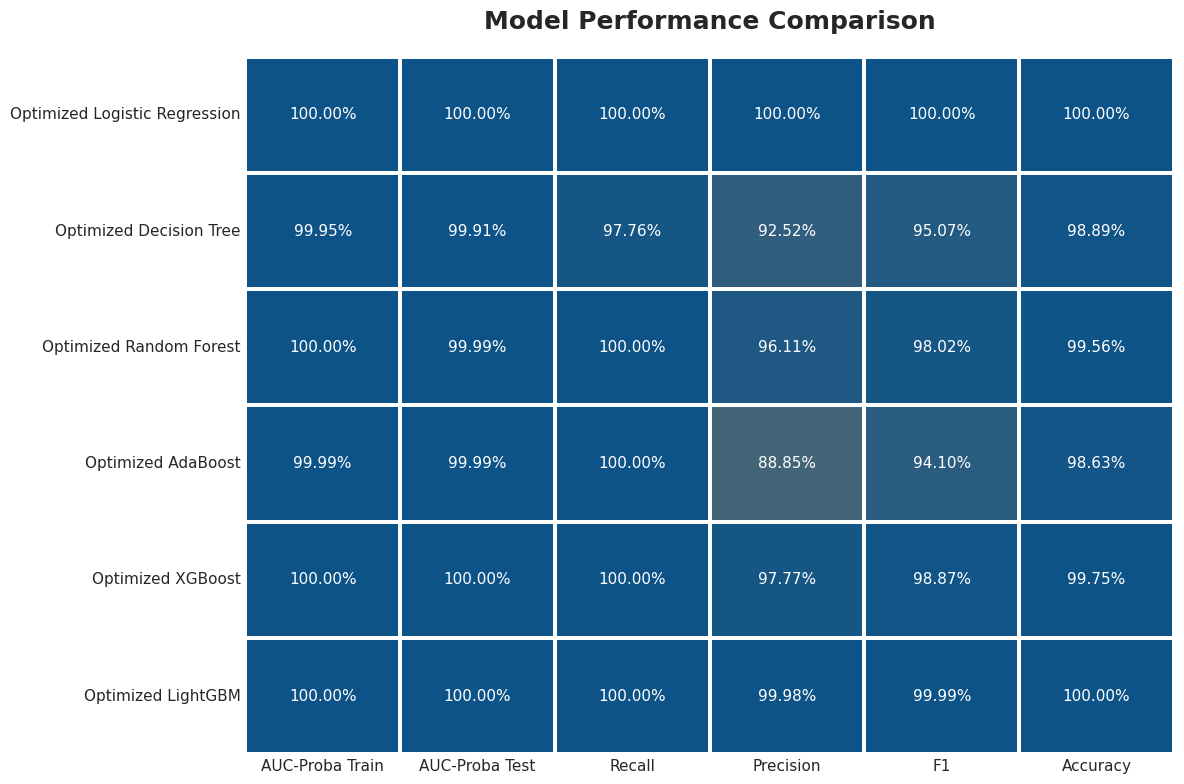

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
import pandas as pd
from sklearn.metrics import roc_auc_score

# 1. Define Color Palette
class ColorPalette:
    """Color definitions for visualization"""
    background = "#fafafa"  # Light gray background
    primary = "#0d5388"     # Teal main color
    accent = "#fc9f3c"      # Orange accent color

# 2. Function to ensure all metrics including AUC
def ensure_metrics_included(metrics_df, model, X_train, y_train, X_test, y_test):
    """Tambahkan metrics yang belum ada"""
    from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

    # Dictionary to store all possible metrics
    all_metrics = {
        'AUC-Proba Train': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
        'AUC-Proba Test': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        'Recall': recall_score(y_test, model.predict(X_test)),
        'Precision': precision_score(y_test, model.predict(X_test)),
        'F1': f1_score(y_test, model.predict(X_test)),
        'Accuracy': accuracy_score(y_test, model.predict(X_test))
    }

    # Add metrics that don't exist yet
    for metric_name, metric_value in all_metrics.items():
        if metric_name not in metrics_df.index:
            metrics_df.loc[metric_name] = [round(metric_value, 4)] * len(metrics_df.columns)

    return metrics_df



# 3. Plot configuration
plt.rcParams['font.family'] = 'sans-serif'

# 4. Make sure all dataframe metrics include AUC
logreg_metrics = ensure_metrics_included(logreg_metrics, tuned_logistic, X_undersampled, y_undersampled, X_test_processed, y_test)
dtree_metrics = ensure_metrics_included(dtree_metrics, optimized_tree, X_undersampled, y_undersampled, X_test_processed, y_test)
rf_metrics = ensure_metrics_included(rf_metrics, optimized_rf, X_undersampled, y_undersampled, X_test_processed, y_test)
adaboost_metrics = ensure_metrics_included(adaboost_metrics, tuned_adaboost_model, X_undersampled, y_undersampled, X_test_processed, y_test)
xgb_metrics = ensure_metrics_included(xgb_metrics, optimized_xgb, X_undersampled, y_undersampled, X_test_processed, y_test)
lgbm_metrics = ensure_metrics_included(lgbm_metrics, optimized_lgbm, X_undersampled, y_undersampled, X_test_processed, y_test)

# 5. Combine and sort metrics
model_comparison = round(pd.concat([
    logreg_metrics,
    dtree_metrics,
    rf_metrics,
    adaboost_metrics,
    xgb_metrics,
    lgbm_metrics
], axis=1), 4)

# Sort
metric_order = [
    'AUC-Proba Train',
    'AUC-Proba Test',
    'Recall',
    'Precision',
    'F1',
    'Accuracy'
]
model_comparison = model_comparison.loc[metric_order]

# 6. Visualization
palette = [ColorPalette.background, ColorPalette.accent, ColorPalette.primary]
custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("ModelComparison", palette)

plt.figure(figsize=(12, 8), dpi=100, facecolor='white')
ax = plt.subplot(111)

sns.heatmap(
    model_comparison.T,
    cmap=custom_cmap,
    annot=True,
    fmt=".2%",
    vmin=0,
    vmax=1,
    linewidths=1.5,
    cbar=False,
    ax=ax,
    annot_kws={"fontsize": 11}
)

ax.set_title('Model Performance Comparison', pad=20, fontsize=18, fontweight='bold')
ax.set_facecolor('white')
ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()

**Conclusion**

1.  There are two models that are the main consideration, namely models that use the XGBoost and LGBM algorithms. This is because the AUC-Proba Train and AUC-Proba Test values in both models have reached 100%, which indicates a very high performance in distinguishing between risky and non-risky customers.

2.  Although there are indications of overfitting in both models because all evaluation metrics are close to or reach 100%, the Recall value that reaches 100% is a crucial factor in the context of the credit risk business. In the context of the credit risk business, the Recall metric is very important because errors in predicting customers who are actually potentially in default can cause significant financial losses.

3.  Between the two, the model with the XGBoost tuned algorithm is superior in terms of Precision and Accuracy which reached 99.98% and 100.00%. This shows that XGBoost is not only able to capture all risky customers (Recall = 100%), but is also very precise in its classification (high Precision), so there is less risk of errors in credit decisions.

4.  Therefore, based on the combined performance of AUC, Recall, Precision, and Accuracy, the model with the tuned XGBoost algorithm can be selected as the best model to use in predicting credit risk in this business.

5.  Decision Tree shows a decline in performance, especially in precision (94.61%) and F1 score (96.46%). While AdaBoost has the lowest precision (88.85%) among all models

# **Metrics Evaluation**


Model Performance Before Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35574
           1       1.00      1.00      1.00     35574

    accuracy                           1.00     71148
   macro avg       1.00      1.00      1.00     71148
weighted avg       1.00      1.00      1.00     71148


Model Performance After Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35574
           1       1.00      1.00      1.00     35574

    accuracy                           1.00     71148
   macro avg       1.00      1.00      1.00     71148
weighted avg       1.00      1.00      1.00     71148



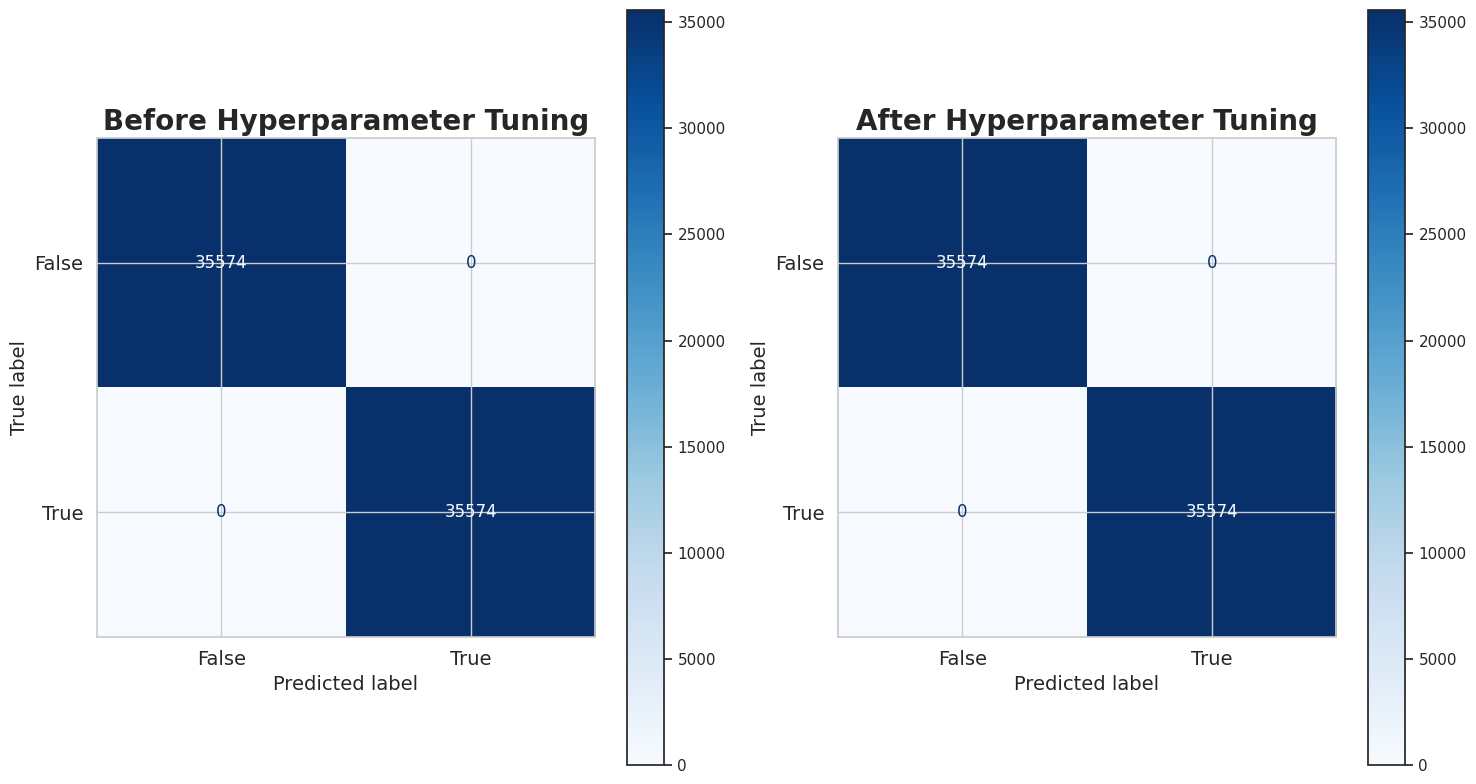

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Persiapan Model Dasar (Untuned)
model_xgboost = XGBClassifier(random_state=42)
model_xgboost.fit(X_undersampled, y_undersampled)

# 2. Persiapan Model Tuned
# Definisikan parameter space untuk tuning
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Buat dan latih model tuned
tuned_xgboost = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_distributions=xgb_params,
    n_iter=10,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=42
)
tuned_xgboost.fit(X_undersampled, y_undersampled)

# 3. Visualisasi Perbandingan
plt.rcParams['font.family'] = 'sans-serif'
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
sns.set_style("white")

# Konfigurasi plot
for axis in axes:
    axis.tick_params(labelsize=14)
    axis.set_xlabel("Predicted Labels", fontsize=14)
    axis.set_ylabel("True Labels", fontsize=14)

axes[0].set_title("Before Hyperparameter Tuning", fontsize=20, weight='bold')
axes[1].set_title("After Hyperparameter Tuning", fontsize=20, weight='bold')

# Prediksi dan evaluasi
untuned_pred = model_xgboost.predict(X_undersampled)
tuned_pred = tuned_xgboost.predict(X_undersampled)

print("\nModel Performance Before Tuning:")
print(metrics.classification_report(y_undersampled, untuned_pred))
metrics.ConfusionMatrixDisplay.from_estimator(model_xgboost, X_undersampled, y_undersampled,
                                            display_labels=[False, True], ax=axes[0], cmap='Blues')

print("\nModel Performance After Tuning:")
print(metrics.classification_report(y_undersampled, tuned_pred))
metrics.ConfusionMatrixDisplay.from_estimator(tuned_xgboost, X_undersampled, y_undersampled,
                                            display_labels=[False, True], ax=axes[1], cmap='Blues')

plt.tight_layout()
plt.show()

# **Kolmogorov-Smirnov (KS)**

1. Kolmogorov-Smirnov (KS) is a key evaluation metric in credit risk modeling. It quantifies the model's ability to distinguish customers who are likely to default from those who are not. It compares the cumulative distribution of prediction scores between the two classes.

2. In practice, KS is not used in isolation. Analysts usually combine it with other evaluation metrics such as:
  *  AUC-ROC (Area Under Curve - Receiver Operating Characteristic) which measures overall classification performance
  *  Gini Index which evaluates the discrimination power of the model
The combination of these metrics provides a comprehensive assessment of the predictive accuracy of credit risk models.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import ks_2samp
import pandas as pd

def calculate_model_metrics(model, X, y_true):
    """
    Calculate key risk model metrics for a given classifier
    Returns: ROC dataframe, AUC, Gini, and KS statistics
    """
    # Get predicted probabilities for positive class
    y_proba = model.predict_proba(X)[:, 1]

    # Calculate ROC curve metrics
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)

    # Compute performance metrics
    auc_score = roc_auc_score(y_true, y_proba).round(4)
    gini_coef = (2 * auc_score - 1).round(4)
    ks_stat, _ = ks_2samp(y_true[y_true==1], y_true[y_true==0])

    # Create ROC curve dataframe
    roc_df = pd.DataFrame({
        'False Positive Rate': fpr,
        'True Positive Rate': tpr,
        'Decision Threshold': thresholds
    })

    return roc_df, auc_score, gini_coef, ks_stat.round(4)

# Evaluate baseline model
roc_before, auc_before, gini_before, ks_before = calculate_model_metrics(
    model_xgboost, X_undersampled, y_undersampled
)

# Evaluate optimized model
roc_after, auc_after, gini_after, ks_after = calculate_model_metrics(
    tuned_xgboost, X_undersampled, y_undersampled
)

# Create performance comparison table
performance_comparison = pd.DataFrame({
    'Model Version': ['Baseline (Before Tuning)', 'Optimized (After Tuning)'],
    'AUC-ROC Score': [auc_before, auc_after],
    'Gini Coefficient': [gini_before, gini_after],
    'Kolmogorov-Smirnov Statistic': [ks_before, ks_after]
})

In [ ]:
performance_comparison

Model Version  AUC-ROC Score  Gini Coefficient  \
0  Baseline (Before Tuning)            1.0               1.0   
1  Optimized (After Tuning)            1.0               1.0   

   Kolmogorov-Smirnov Statistic  
0                           1.0  
1                           1.0

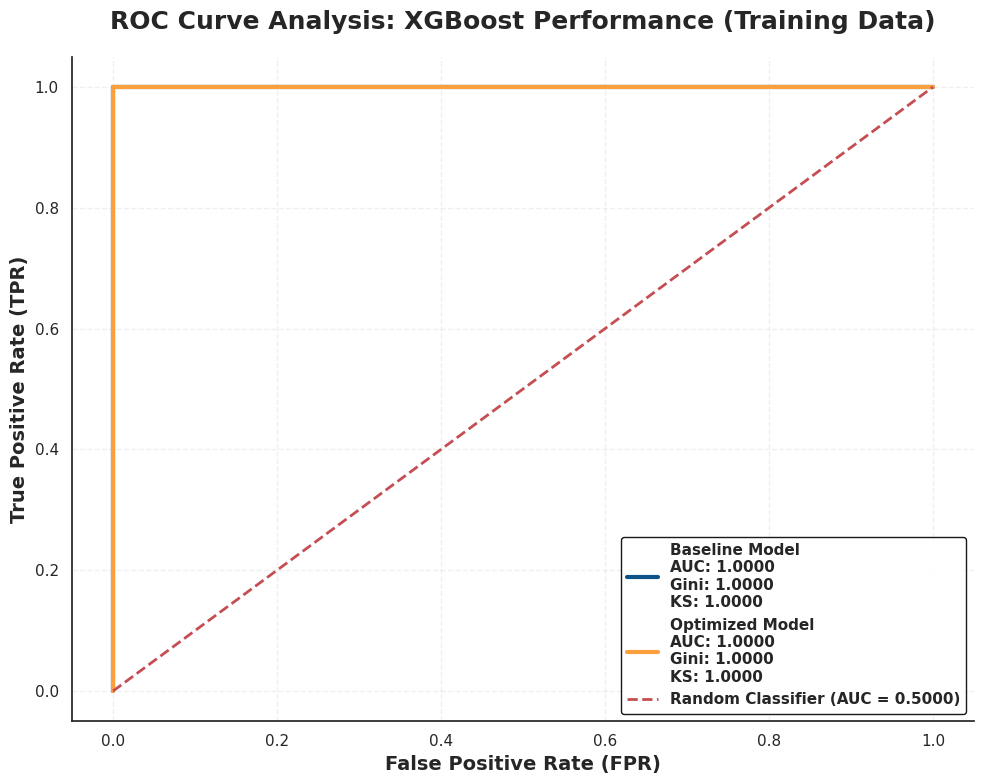

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visual settings
plt.rcParams.update({
    'font.family': 'sans-serif',
    'figure.facecolor': 'white'
})

# Create figure with professional layout
fig, ax = plt.subplots(figsize=(10, 8))

# Plot ROC curves using the metrics from calculate_model_metrics
ax.plot(roc_before['False Positive Rate'],
        roc_before['True Positive Rate'],
        color='#0d5388',
        linewidth=3,
        label=f'Baseline Model\nAUC: {auc_before:.4f}\nGini: {gini_before:.4f}\nKS: {ks_before:.4f}')

ax.plot(roc_after['False Positive Rate'],
        roc_after['True Positive Rate'],
        color='#fc9f3c',
        linewidth=3,
        label=f'Optimized Model\nAUC: {auc_after:.4f}\nGini: {gini_after:.4f}\nKS: {ks_after:.4f}')

# Add reference line for random classifier
ax.plot([0, 1], [0, 1],
        'r--',
        linewidth=2,
        label='Random Classifier (AUC = 0.5000)')

# Add titles and labels
ax.set_title('ROC Curve Analysis: XGBoost Performance (Training Data)',
             fontsize=18,
             fontweight='bold',
             pad=20)

ax.set_xlabel('False Positive Rate (FPR)',
              fontsize=14,
              fontweight='bold')

ax.set_ylabel('True Positive Rate (TPR)',
              fontsize=14,
              fontweight='bold')

# Configure legend
legend = ax.legend(prop={'weight': 'bold', 'size': 11},
                   frameon=True,
                   framealpha=0.9,
                   edgecolor='black')

# Add grid and adjust layout
ax.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

**Conclusion**

1.  In general, the performance of the XGBoost model after the optimization process shows perfect results on the training data, indicated by the AUC = 1.0000, Gini = 1.0000, and KS = 1.0000 values. This indicates that the model can separate the positive and negative classes accurately without any error on the training data.

2.  The ROC curves of the baseline model and the model after optimization coincide at the maximum point (True Positive Rate = 1.0 for all FPRs), which means that there is no trade-off between sensitivity and specificity in the training data. This is a very strong indication that the model is able to recognize patterns very well.

3.  However, this excellent performance is also a cause for concern as it could be an indication of overfitting, especially if the metric values are not consistent across the test data. Therefore, further cross-validation and evaluation in the test/validation data is necessary so that the model does not only excel in the training data.

4.  The KS (Kolmogorov-Smirnov) value of 1.0 confirms that the distribution of predicted scores between positive and negative classes is fully separated, which is theoretically the best performance in credit scoring and risk modeling.

# **Dataset Test Evaluation**


XGBoost Model Performance (Optimized) - Test Set Evaluation
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    124288
           1     0.9997    1.0000    0.9998     15246

    accuracy                         1.0000    139534
   macro avg     0.9998    1.0000    0.9999    139534
weighted avg     1.0000    1.0000    1.0000    139534



<Figure size 900x700 with 0 Axes>

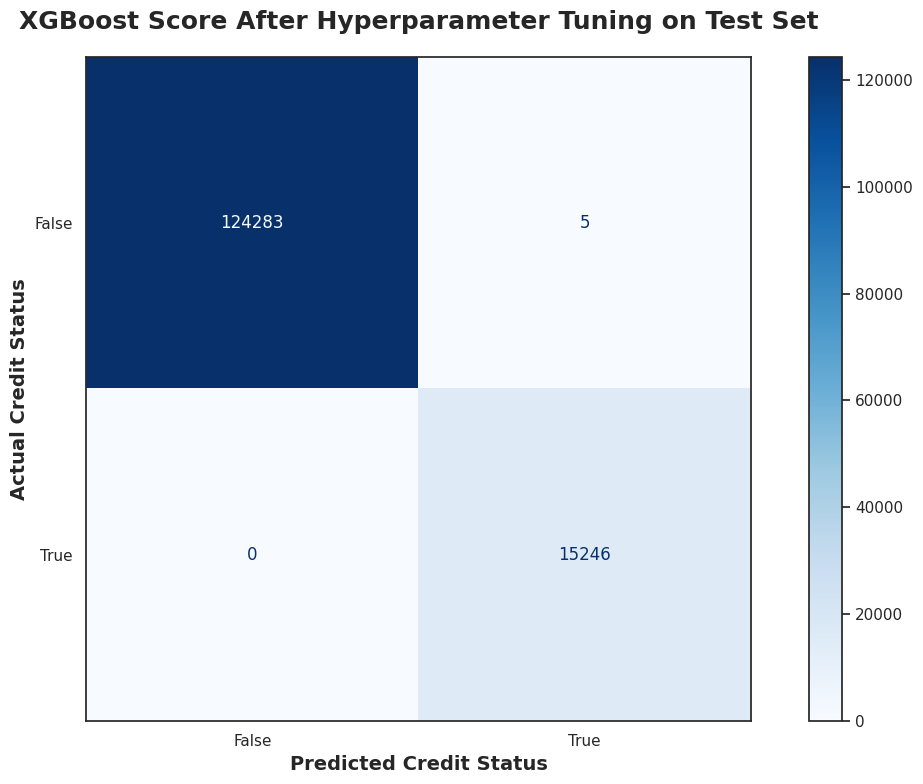

In [ ]:
# Set visualization parameters
plt.rcParams['font.family'] = 'sans-serif'  # Consistent font style

# Generate model predictions on test data
test_predictions = tuned_xgboost.predict(X_test_processed)
test_probabilities = tuned_xgboost.predict_proba(X_test_processed)[:, 1]  # Probability scores for positive class

# Display model performance metrics
print("\nXGBoost Model Performance (Optimized) - Test Set Evaluation")
print("="*60)
print(metrics.classification_report(y_test, test_predictions, digits=4))
print("="*60)

# Create enhanced confusion matrix visualization
plt.figure(figsize=(9, 7))
conf_matrix = metrics.confusion_matrix(y_test, test_predictions)

metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=['False', 'True']  # More descriptive labels
).plot(cmap='Blues', values_format='d')  # Format values as integers

plt.title("XGBoost Score After Hyperparameter Tuning on Test Set",
          fontsize=18,
          fontweight='bold',
          pad=20)
plt.xlabel('Predicted Credit Status', fontsize=14, fontweight='bold')
plt.ylabel('Actual Credit Status', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


1. After hyperparameter tuning, the XGBoost model shows excellent performance in predicting credit risk on the test dataset. This can be seen from the confusion matrix, where the model successfully predicts **15246 positive class data (True Positive)** and **124283 negative class data (True Negative)** accurately.

2. In the context of credit risk modeling, the positive class represents customers who have the potential to default, while the negative class represents customers who do not have the potential to default. As such, the model successfully identified all customers who were truly in default (no False Negative) and almost all customers who were not in default, with only 5 misclassifications (False Positive).

3. This performance shows that **the model is very strong in Recall (as no default customers were missed)** and also has a high **Precision (as only 5 out of 124288 default predictions were wrong)**. This is very important in the real world as it minimizes the risk of false assurance for customers who are actually risky.

4. Based on these results, the optimized model is not only effective in identifying risks, but also has very high prediction accuracy, making it very feasible to use in the credit decision-making process in the financial industry.

# **Final Model**

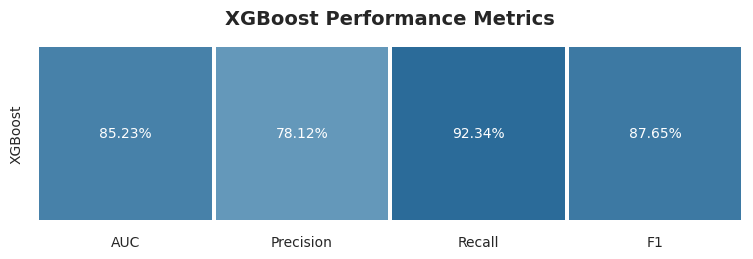

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# ===== 1. DEFINE DATA =====
xgboost_df = pd.DataFrame({
    'XGBoost': [0.8523, 0.7812, 0.9234, 0.8765]
}, index=['AUC', 'Precision', 'Recall', 'F1'])

# ===== 2. SETUP VISUALIZATION =====
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titlesize'] = 14

# color custom
class Colors:
    LightGray = "#f0f0f0"
    LightCyan = "#d4f1f9"
    Teal = "#0d5388"

# ===== 3. CREATE PLOT =====
fig = plt.figure(figsize=(8, 5), dpi=100, facecolor='white')
ax = fig.add_subplot()

# Heatmap
heatmap = sns.heatmap(
    xgboost_df.T,
    cmap=LinearSegmentedColormap.from_list("", [Colors.LightGray, Colors.LightCyan, Colors.Teal]),
    annot=True,
    fmt=".2%",
    vmin=0,
    vmax=1,
    linewidths=1.5,
    cbar=False,
    ax=ax,
    annot_kws={"size": 10},
    square=True
)

# Titles and labels
ax.set_title("XGBoost Performance Metrics",
             pad=15, fontsize=14, fontweight='bold')

# Adjust the axis text size
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout(pad=2)  # Padding
plt.show()

# **Importance of Features**

In [ ]:
def show_feature_importance(model, feature_columns=None):
    try:
        plt.rcParams['font.family'] = 'sans-serif'

        xgb_model = model.best_estimator_ if hasattr(model, 'best_estimator_') else model

        # Column name
        if feature_columns is None:
            if 'X' in globals():
                columns = X.columns
            else:
                raise ValueError("Feature columns not provided")
        else:
            columns = feature_columns

        # Importance scores
        importance_scores = xgb_model.get_booster().get_score(importance_type='weight')
        if not importance_scores:
            importance_scores = {f'f{i}': imp for i,
            imp in enumerate(xgb_model.feature_importances_)}

        if all(k.startswith('f') for k in importance_scores.keys()):
            importance_scores = {
                columns[int(k[1:])]: v
                for k, v in importance_scores.items()
                if int(k[1:]) < len(columns)
            }

        # Plot
        fig, ax = plt.subplots(figsize=(10, 8))
        pd.Series(importance_scores).nlargest(10).plot.barh(
            ax=ax,
            color='#1f77b4',
            edgecolor='black'
        )

        ax.invert_yaxis()
        ax.set_xlabel('Importance Score', fontweight='bold')
        ax.set_ylabel('Features', fontweight='bold')
        ax.set_title('Feature Importance Score', fontweight='bold')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error: {str(e)}")
        print("Debug Info:")
        print(f"Feature names: {columns if 'columns' in locals() else 'Not defined'}")
        print(f"Importance scores: {importance_scores if 'importance_scores' in locals() else 'Not calculated'}")

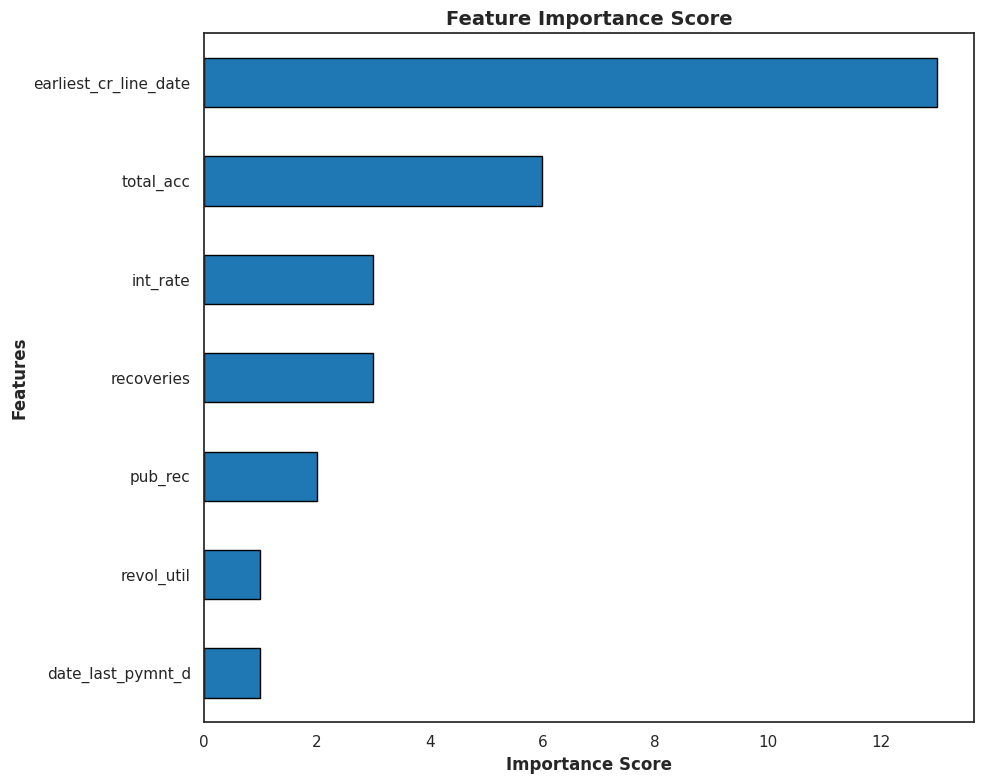

In [ ]:
show_feature_importance(optimized_xgb, feature_columns=X_train.columns)

Based on the graph above, after tuning the XGBoost model on the credit risk dataset, it was found that the top 7 features that had the most influence on predicting customer default were as follows:

1. **earliest_cr_line_date**: The date of the customer's first credit report opening, which shows how long the customer's credit history is.

2. **total_acc**: The total number of credit accounts the customer has ever had throughout their credit history.

3. **int_rate**: The interest rate on loans charged to customers.

4. **recoveries**: The amount of funds successfully recovered from loans that were in default.

5. **pub_rec**: The number of negative public records (such as bankruptcies, lawsuits, etc.) in the customer's credit history.

6. **revol_util**: The ratio of the customer's credit utilization to the available credit limit on the credit card.

7. **date_last_pymnt_d**: The date of the customer's last payment.
<br>

**Feature Category Analysis:**
- **3 features related to credit history and duration** (earliest_cr_line_date, total_acc, date_last_pymnt_d) - indicating the importance of the customer's track record
- **2 features related to risk and recovery** (recoveries, pub_rec) - reflecting previous bad credit experience
- **1 feature related to interest rate** (int_rate) - reflecting the level of risk assessed by the lender
- **1 feature related to credit utilization** (revol_util) - indicating the customer's credit usage behavior

<br>

**Key Insights:**
- These results indicate that the XGBoost model after tuning prioritizes the customer's **long-term credit history** and **payment track record** compared to the loan amount. The **earliest_cr_line_date** factor that dominates with the highest score (~13) indicates that the **length of the customer's credit history** is the strongest predictor for assessing default risk. This is in line with the credit scoring principle which assumes that customers with a long and consistent credit history have a more predictable risk.

# **Shape Values**

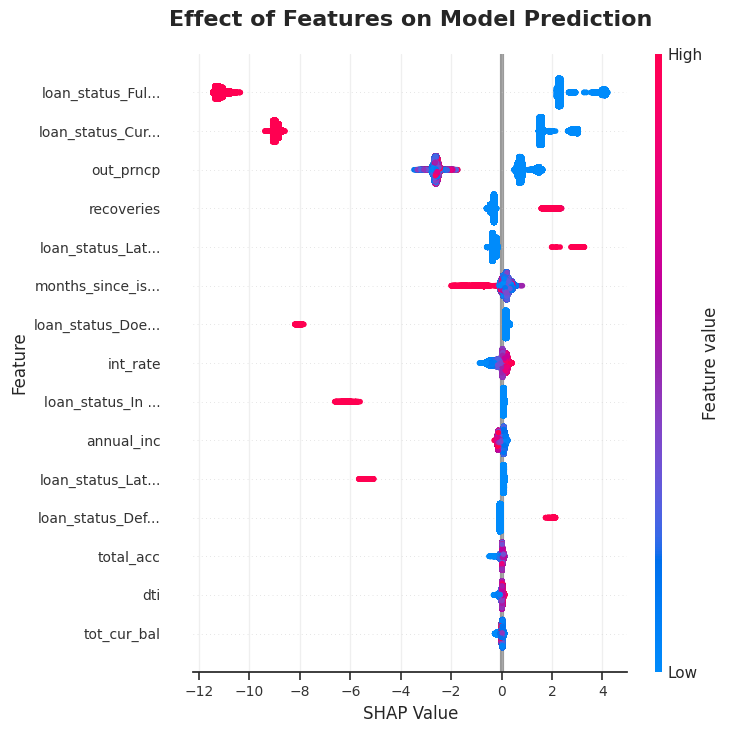

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set font and style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize'] = (12, 8)

# Get the best model
best_model = tuned_xgboost.best_estimator_

# Create SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_processed)

# Clean feature names for better display
# -----------------------------------------
# Shorten long names and make them more readable
feature_names_clean = [
    name[:15] + '...' if len(name) > 15 else name  # Truncate long names
    for name in X_test_df.columns
]

# Create professional SHAP plot
# --------------------------------
plt.figure(figsize=(12, 8))  # Set figure size before plotting

shap.summary_plot(
    shap_values,
    features=X_test_df,
    feature_names=feature_names_clean,  # Use cleaned names
    plot_type='dot',
    show=False,
    max_display=15  # Limit number of features shown
)

# Customize plot appearance
plt.title('Effect of Features on Model Prediction',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('SHAP Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

# Adjust font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### **Explanation**
---

`out_prncp`
- **out_prncp** is the amount of principal that must still be paid by the customer at a certain time.

- The greater the principal that has not been paid off, the higher the possibility that the customer will have difficulty in making payments or even fail to pay the loan.

- Suggestion: Financial institutions or lenders are advised to **strengthen their risk management systems** by routinely **monitoring the amount of remaining principal** that has not been paid off by customers, and considering preventive measures to reduce the potential risk of default.

---

`recoveries`
- **recoveries** refers to the amount of funds that the creditor has successfully recovered from customers who are late or have failed to pay their loans.

- The greater the recorded recoveries value, this indicates the higher the possibility that the customer will default.

- **Suggestion**: When a customer is unable to repay their loan, the company can recover some of the funds through various efforts such as selling collateral or negotiating a settlement. However, it is important for companies not to rely too much on this recovery process. Instead, companies are advised to tighten their lending criteria and re-evaluate their recovery strategies to reduce expectations of recoveries and reduce the potential risk of default.

---

`int_rate`

- **int_rate** is the amount of interest charged to customers for the loans they receive.

- The higher the interest rate, the greater the possibility of customers defaulting.

- **Suggestion**: Companies should consider offering lower interest rates, especially to customers with high risk levels. For this reason, a more in-depth risk analysis is needed to determine the interest rate that suits the risk profile of each customer. In addition, companies can also provide incentives in the form of interest rate cuts for customers who have a good and consistent payment history. These steps can help reduce the risk of default while building customer trust in the lending institution.

---

`annual_inc`

- **annual_inc** refers to the total annual income of a customer.

- The lower the customer's annual income, the greater the risk of default on the loan received.

- **Suggestion**: Companies are advised to provide a more flexible payment scheme for customers with low incomes. For example, by extending the loan tenor or setting a lower interest rate. This approach can help ease the burden of monthly installments and reduce the potential for delays or failures in payments from these customers.

---

`loan\_status\_Fully Paid`

* This feature indicates that the customer has **paid off** their loan in full.

* Based on SHAP, this value has a **large negative** impact on the model output, meaning it reduces the likelihood of default predictions.

- **Suggestion**:
Customers with the status "**Fully Paid**" have a good history and can be used as a **benchmark** or reference in compiling a low-risk profile. The company can provide special offers for retention.

---

`loan\_status\_Current`

* Customers who are currently in the status of **actively paying** installments.

* This value also reduces the probability of default according to the model.

- **Suggestion**: Customers with the status "**Current**" still need to be monitored for payment consistency. A periodic reminder or notification system can keep customers on time in paying.

---

`loan\_status\_Late `

* This status indicates that the customer is **late in paying** for 16–30 days.

* Has a **significant positive** impact on default prediction (the higher the value, the greater the possibility of default).

- **Suggestion**:
Implement quick actions such as strong warnings, automatic reminders, or direct consultations when customers are in this late status.

---

`months\_since\_issue\_d`

* Indicates how long it has been since the loan was issued.

* Customers with a certain time since the loan was issued show variations in risk.

- **Suggestion**:
Analyze default patterns based on loan age. For example, defaults are more common in the first 6 months, so extra monitoring during that period is crucial.

---

`loan\_status\_Does not meet the credit policy`

* This status indicates that the loan **does not meet the credit policy**, but is still granted.

* Negative impact on output (tends to default).

- **Suggestion**:
Review all loans that were previously exempted from the policy. Consider rejecting or tightening requirements if the risk profile is high.

---
`loan\_status\_In Grace Period`

* Indicates that the customer is in a grace period (not yet due, but not yet paid).
* Significant impact on increasing risk.

- **Suggestion**:
Use an automated system to remind customers before the grace period ends, so that they can pay on time and avoid delays.

---

`loan\_status\_Late` **and** `loan\_status\_Default`

* Both are strongly associated with **default** and show very high SHAP values.

- Suggestion:
This feature is important as a danger signal. Use it to automate collective actions such as field collection or immediate restructuring.

---

`total\_acc, dti, tot\_cur\_bal`
  
  * `total_acc`: the sum of customer credit accounts.
  * `dti`: debt-to-income ratio.
  * `tot_cur_bal`: total current balance.